In [ ]:
a =0

In [1]:
! nvidia-smi

Tue Apr 12 19:29:19 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 346.46     Driver Version: 346.46         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro 2000         Off  | 0000:0F:00.0     Off |                  N/A |
| 34%   62C    P8    N/A /  N/A |    189MiB /  1023MiB |     16%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla C2075         Off  | 0000:42:00.0     Off |                    0 |
| 45%   88C    P0     0W / 225W |     10MiB /  5375MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
from CUDATools import *

Available Devices:
  Device 0: Tesla C2075
  Device 1: Quadro 2000
Select device number: 0
Using device 0: Tesla C2075


In [3]:
%pylab inline
#from pycuda import gpuarray, autoinit
from pyfft.cuda import Plan as plan1
from skcuda.fft import Plan as plan2
from skcuda.fft import fft as skfft
from reikna.fft import FFT


Populating the interactive namespace from numpy and matplotlib


In [4]:
!nvidia-smi

Tue Apr 12 19:29:22 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 346.46     Driver Version: 346.46         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro 2000         Off  | 0000:0F:00.0     Off |                  N/A |
| 33%   61C    P8    N/A /  N/A |    190MiB /  1023MiB |     16%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla C2075         Off  | 0000:42:00.0     Off |                    0 |
| 45%   88C    P0     0W / 225W |    107MiB /  5375MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [5]:
from reikna.cluda import cuda_api
api = cuda_api()
thr = api.Thread(ctx)
print thr._context
print ctx

In [6]:
! nvidia-smi

Tue Apr 12 19:29:24 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 346.46     Driver Version: 346.46         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro 2000         Off  | 0000:0F:00.0     Off |                  N/A |
| 34%   62C    P8    N/A /  N/A |    190MiB /  1023MiB |     16%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla C2075         Off  | 0000:42:00.0     Off |                    0 |
| 45%   88C    P0     0W / 225W |    107MiB /  5375MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

### 1,2,3 Dimension

In [7]:
prec = 16 # bytes
npPrec = [np.float32,np.float64]
npCPrec = [np.complex64,np.complex128]
N3D = [2**i for i in range(5,10)]
sizeN3D = [2**(3*i)*prec/2.0**30 for i in range(5,10)]

N2D = [2**i for i in range(10,14)]
sizeN2D = [2**(2*i)*prec/2.0**30 for i in range(10,14)]

N1D = [2**i for i in range(20,28)]
sizeN1D = [2**(i)*prec/2.0**30 for i in range(20,28)]

print '## 1D \n',N1D ,'\n', sizeN1D
print '## 2D \n',N2D ,'\n', sizeN2D
print '## 3D  \n',N3D ,'\n', sizeN3D

## 1D 
[1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728] 
[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
## 2D 
[1024, 2048, 4096, 8192] 
[0.015625, 0.0625, 0.25, 1.0]
## 3D  
[32, 64, 128, 256, 512] 
[0.00048828125, 0.00390625, 0.03125, 0.25, 2.0]


In [8]:
from pycuda import curandom
randomGPU = curandom.XORWOWRandomNumberGenerator()

In [29]:
# real = random.gen_uniform(N1D[0],npPrec[0])
real = sin(linspace(0,2*pi,N1D[0]))

In [30]:
real_gpu = gpuarray.to_gpu(real.astype(npCPrec[0]))
real2_gpu = gpuarray.to_gpu(real.astype(npCPrec[0]))


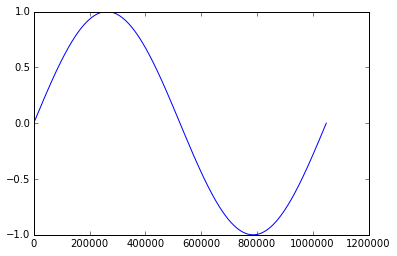

In [31]:
plot(real2_gpu.get().real)

In [32]:
myFFTPlan = plan1(N1D[0],dtype=npCPrec[0])

In [33]:
myFFTPlan.execute(real_gpu)

In [35]:
#fftplan2 = plan2(N1D[0],npCPrec[0],npCPrec[0])
fftplan2 = plan2(N1D[0],npCPrec[0],npCPrec[0])

In [47]:
fftPlan3 = FFT(real_gpu)

In [48]:
reikFFT = fftPlan3.compile(thr)

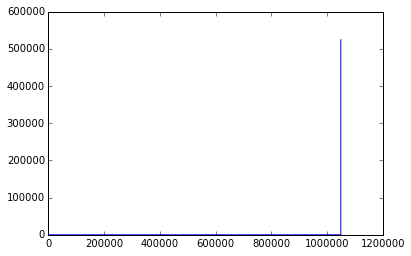

In [38]:
plot(abs(real_gpu.get()))

In [39]:
fftreal = fft.fft(real)

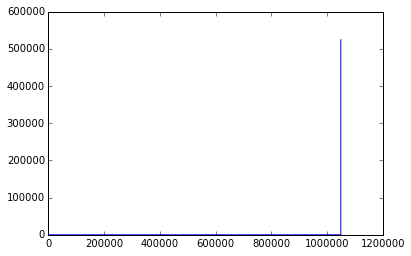

In [40]:
plot(abs(fftreal))

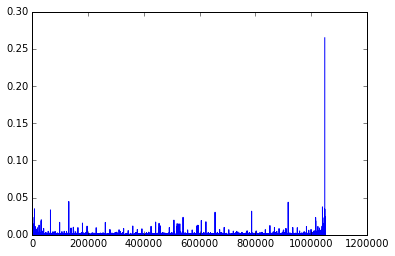

In [41]:
plot(abs(fftreal-real_gpu.get()))

In [43]:
skfft(real2_gpu, real_gpu, fftplan2)
#skfft(real2_gpu, fftplan2)

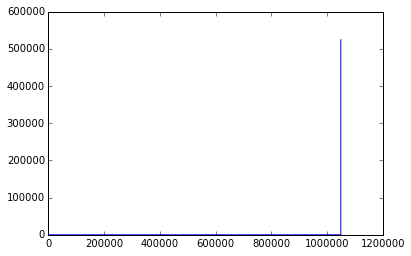

In [44]:
plot(abs(real_gpu.get()))

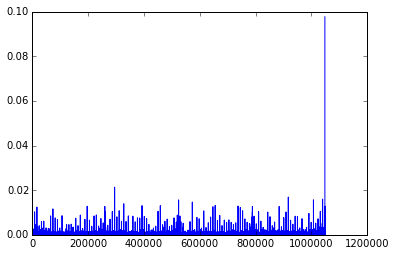

In [45]:
plot(abs(fftreal-real_gpu.get()))

In [50]:
reikFFT(real_gpu, real2_gpu )
#reikFFT(real2_gpu )

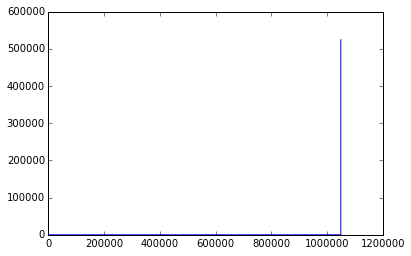

In [51]:
plot(abs(real_gpu.get()))

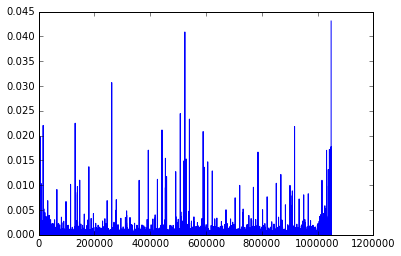

In [16]:
plot(abs(fftreal-real_gpu.get()))

In [17]:
real_gpu.gpudata.free()

In [18]:
real2_gpu.gpudata.free()

In [19]:
getFreeMemory()

Free Global Memory: 2859.382812 Mbytes


2859.3828125

In [7]:
! nvidia-smi

Tue Apr 12 13:50:07 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 346.46     Driver Version: 346.46         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 780     Off  | 0000:01:00.0     N/A |                  N/A |
| 35%   67C    P0    N/A /  N/A |     72MiB /  3071MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

    Now in 'A_GPU' it is stored its trandsform. I mean we ocverwrite the original array with the FFT, if you put two arguments this overwrite is avoided.

### 3 Dimensions and Performance

In [9]:
from time import time
import pycuda.driver as drv
from pycuda import gpuarray
start = drv.Event()
end = drv.Event()

In [10]:
#dimensions = [64,128,256]
dimensions = [512]
prec = complex128

In [11]:
timeCPU = []
timeGPU1 = []
timeGPU2 = []
timeGPU3 = []
timeCPY = []

In [12]:
samples = 10

In [13]:
for d in dimensions:
    A_CPU = random.random((d,d,d)).astype(prec)
    start.record()
    A_GPU = gpuarray.to_gpu(A_CPU)
    B_GPU = gpuarray.to_gpu(A_CPU)
    end.record()
    end.synchronize()
    timeCPY.append(start.time_till(end)*1e-3)
    
    
    #t = time()
    #for i in range(samples): FFT_A_CPU = fft.fft(A_CPU)
    #timeCPU.append(time()-t)
    
    myFFTPlan = plan1((d,d,d),prec)
    #myFFTPlan2  = plan2((d,d,d),prec,prec)
    #myFFTPlan3 = FFT(A_GPU)
    #reikfft = myFFTPlan3.compile(thr)
    
    start.record()
    for i in range(samples): myFFTPlan.execute(A_GPU, B_GPU)
    end.record()
    end.synchronize()
    secs = start.time_till(end)*1e-3
    timeGPU1.append(secs)
    
    #start.record()
    #for i in range(samples): skfft(A_GPU, B_GPU,myFFTPlan2)
    #end.record()
    #end.synchronize()
    #secs = start.time_till(end)*1e-3
    #timeGPU2.append(secs)
    
    #start.record()
    #for i in range(samples): reikfft(A_GPU, B_GPU)
    #end.record()
    #end.synchronize()
    #secs = start.time_till(end)*1e-3
    #timeGPU3.append(secs)
    
    A_GPU.gpudata.free()
    B_GPU.gpudata.free()
    del myFFTPlan,myFFTPlan2, myFFTPlan3,reikfft

MemoryError: cuMemAlloc failed: out of memory

In [ ]:
!nvidia-smi

## reikna

In [ ]:
! nvidia-smi

In [13]:
A_CPU = random.random((512,512,512)).astype(prec)

In [14]:
myFFTPlan = plan1(A_CPU.shape,prec)

In [15]:
A_GPU = gpuarray.to_gpu(A_CPU)

myFFTPlan3 = FFT(A_GPU)
reikfft = myFFTPlan3.compile(thr)

B_GPU = gpuarray.to_gpu(A_CPU)

In [16]:
start.record()
for i in range(samples): myFFTPlan.execute(A_GPU)
end.record()
end.synchronize()
start.time_till(end)*1e-3
timeGPU1.append(start.time_till(end)*1e-3)

In [18]:
t = time()
for i in range(samples): FFT_A_CPU = fft.fft(A_CPU)
timeCPU.append(time()-t)

KeyboardInterrupt: 

In [20]:
timeCPU.append(5202.7731320858)

timeCPU = [4.00489616394043,
 47.76098108291626,
 364.4098560810089,
 5202.7731320858]

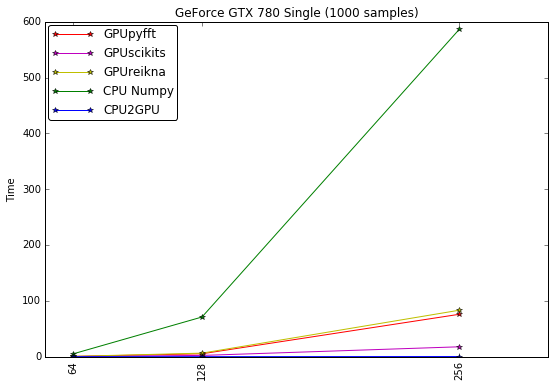

In [13]:
figure(0,figsize=(9,6),dpi=250)
plot(dimensions,timeGPU1,'r*-',label='GPUpyfft')
plot(dimensions,timeGPU2,'m*-',label='GPUscikits')
plot(dimensions,timeGPU3,'y*-',label='GPUreikna')

plot(dimensions,timeCPU,'g*-',label='CPU Numpy')
plot(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks(dimensions, dimensions, rotation='vertical')
ylabel('Time')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)

(60, 262)

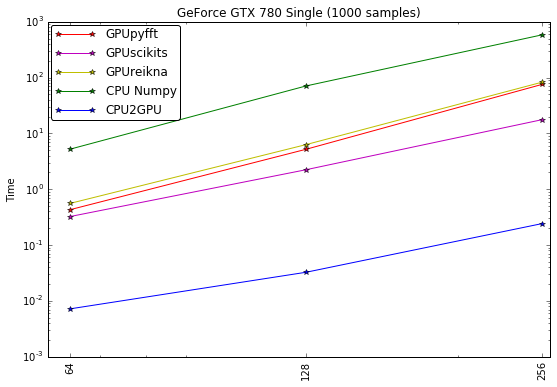

In [14]:
figure(0,figsize=(9,6),dpi=250)
loglog(dimensions,timeGPU1,'r*-',label='GPUpyfft')
loglog(dimensions,timeGPU2,'m*-',label='GPUscikits')
loglog(dimensions,timeGPU3,'y*-',label='GPUreikna')

loglog(dimensions,timeCPU,'g*-',label='CPU Numpy')
loglog(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks(dimensions, dimensions, rotation='vertical')
ylabel('Time')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)
xlim([60,262])

(60, 262)

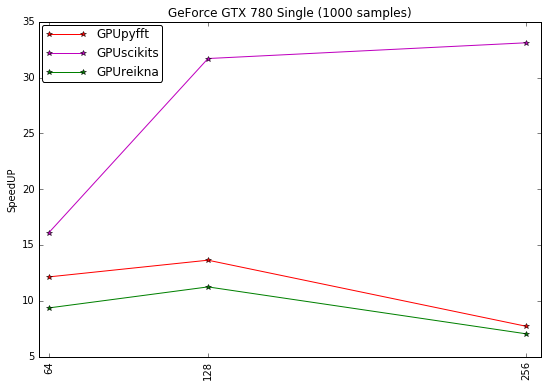

In [15]:
figure(0,figsize=(9,6),dpi=250)
plot(dimensions,array(timeCPU)/array(timeGPU1),'r*-',label='GPUpyfft')
plot(dimensions,array(timeCPU)/array(timeGPU2),'m*-',label='GPUscikits')
plot(dimensions,array(timeCPU)/array(timeGPU3),'g*-',label='GPUreikna')
#plot([64,128,256,512],timeCPU,'g*-',label='CPU')
#plot(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('SpeedUP')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)
xlim([60,262])

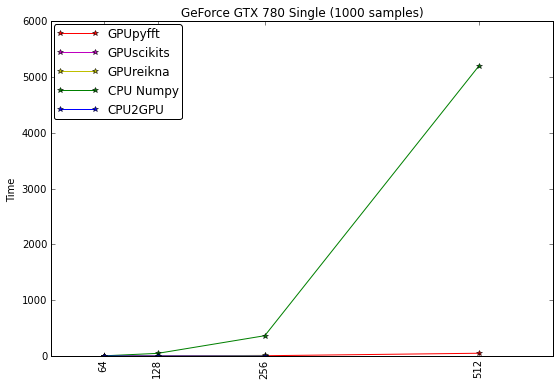

In [26]:
figure(0,figsize=(9,6),dpi=250)
plot([64,128,256,512],timeGPU1,'r*-',label='GPUpyfft')
plot(dimensions,timeGPU2,'m*-',label='GPUscikits')
plot(dimensions,timeGPU3,'y*-',label='GPUreikna')
plot([64,128,256,512],timeCPU,'g*-',label='CPU Numpy')
plot(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('Time')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)
#xlim([60,262])

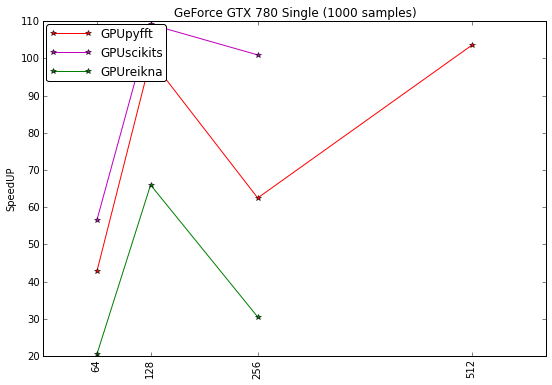

In [23]:
figure(0,figsize=(9,6),dpi=250)
plot([64,128,256,512],array(timeCPU)/array(timeGPU1),'r*-',label='GPUpyfft')
plot(dimensions,array(timeCPU[0:3])/array(timeGPU2),'m*-',label='GPUscikits')
plot(dimensions,array(timeCPU[0:3])/array(timeGPU3),'g*-',label='GPUreikna')
#plot([64,128,256,512],timeCPU,'g*-',label='CPU')
#plot(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('SpeedUP')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)

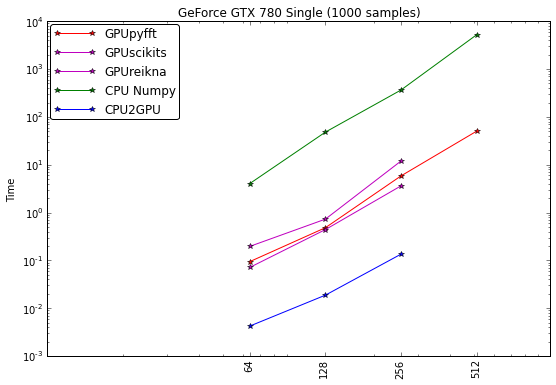

In [24]:
figure(0,figsize=(9,6),dpi=250)
loglog([64,128,256,512],timeGPU1,'r*-',label='GPUpyfft')
loglog(dimensions,timeGPU2,'m*-',label='GPUscikits')
loglog(dimensions,timeGPU3,'m*-',label='GPUreikna')
loglog([64,128,256,512],timeCPU,'g*-',label='CPU Numpy')
loglog(dimensions,2*array(timeCPY),'b*-',label='CPU2GPU')
plt.xticks([64,128,256,512], [64,128,256,512], rotation='vertical')
ylabel('Time')
title('GeForce GTX 780 Single (1000 samples)')
plt.legend(loc=2,labelspacing=0.5,fancybox=True, handlelength=3.5, borderaxespad=0.25, borderpad=0.25)

# Results


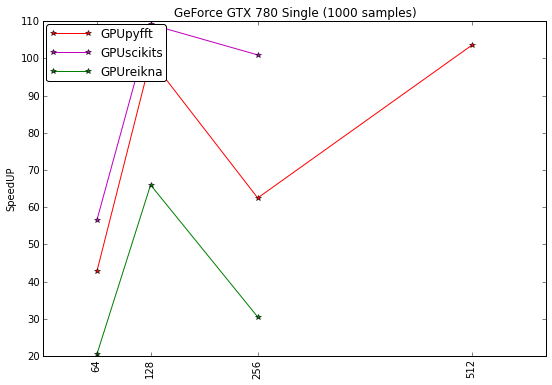
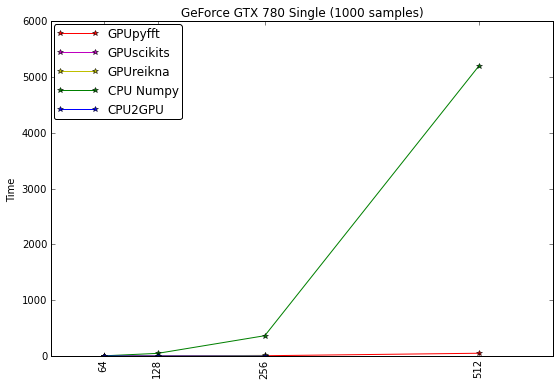
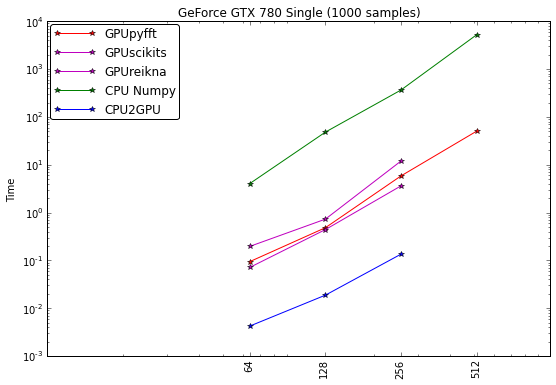

In [28]:
%%HTML
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAigAAAGBCAYAAABM9ko+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3X18zeX/wPHXNbOZGbbJveU+N4lCmJQQUbpBIrmpb0nyLSmxSqOUktS3G939RCFKSjfIFJNy1w1Jyv1tmJttNja7O9fvj+uzdcxuztjZZ+ec9/PxOI+dm8/nnPf5nLNz3ue63td1Ka01QgghhBCliZ/dAQghhBBC5CYJihBCCCFKHUlQhBBCCFHqSIIihBBCiFJHEhQhhBBClDqSoAghhBCi1JEERQhhO6VUlFLq/WK6r31Kqa4XuG+gUupPpVS14ojF2yilHEqp+hd5HxuUUs2KKybhvSRBER5NKTXA+sA7rZSKU0qtV0o96OK+na0P3GSn05fujrmQmAKUUs8opf62ntMhpdRSpdQNSqm7nOJMyRV7klIq2Ppyvsvp/kKUUgeUUn3yebw/cz3/DKXUV063X6OU+lkpdUoptVspdX+u/R9VSh2xbp+plAoo4LndqpTabG17XCn1vVKqLoDWeorW+v789i0ibZ0uxHBgtdY6DkApdb1SapVSKlEptTf3xkqputbtZ5RSf+VOjKzXbL/1Wn6hlAp1ui1QKfWBdTyOKKUevcCYPc004Fm7gxAeQGstJzl55Al4DDgK9AGCretaAXOBABf27wwcLIY4/IrxOX0F/Ay0BfytUw/gtVzbXZdX7EB34BhQxbr8NvBZER5/D3C3db4McBy437rcBkgGrrAu97COf1OgMrAKmJLP/TYEEoHrrcsVrNetjhveF3uBLhe471agg9PltsAg4H5gbx7br8N84QZazyfB6dg3B5KAa4BgYB4w32nfKcBqoBLQBDgC9Cju41HMx9YB1L/I+ygHnASq2f185FS6T7YHICc5XcjJ+lA/DdxeyHaB1hfIfuvL9G2gnHVbvgmK9aUba33hbAV6O90227qfpVYMXYA6wOdWcnACeMNp+3uBbUA88C0Qkc9jdgNSgJouPP+CYp8FfGxtcwKo6uIxvc76Qg2yLte0vpDKOW2zEbjTOv8xMNnptuuBI/ncdz9gUwGPPRGYY52vaz3uEOt1Ow486bRtEPChdTy3AU84HwucEhRAAeOBXdax+AQIzSeGCOv4n5dwWq/N3lzXNQbOYiXH1nWrgQes8y8Ac51uqw+k8W8y/Q/Qzen2STglMLkeqwrwjfV+PAn84HRb9vNLAv4EbnO6bRjwEzDd2ncXEAncAxwA4oAhud7b7wAx1v3FOr9fcUpQKPh/67x4AeV0PzHOjysnOeV1ki4e4ak6YD4gC+uSeRHz672l9bcW8ExBOyilygJfY5KJS4D/AvOUUo2dNhsIPKe1rgCsx3wY7wUutR5jgXVftwJRwO2YD+01wPx8HrobsF5rfbiQ51SYRzHJwkLgMa31MRf3G4ppbUkFsOLYAtyrlCqjlIrEPL8fre2bAb877b8FqObcjeHkV6CJUmq61bVWIdfteXXJdMQkAV2BZ5RSl1nXR2OSiXrADcDd+ewP8DBwC3AtUAPzhflWPtu2APZorR353J5bc2v7M07X/W5dn317zvHRWu/BJCiNrWNUg/OPX3Py9hhwEPMeqop5T2XbBVyjta6ISXLm5qqhudp6nDDMe+9T4CqgAebYvamUKu+0/V2YLpgqwGZMy09eCvrfOi9erbXza/SXtZ8Q+ZIERXiqKsAJ5y8TpdRapVSCVZ9xjVJKYZrmx2itE7XWpzHN6gOc7qemtU/2qR/QHvMr90WtdabWehUmARnotN9irfU663xLzJfNWK11qtY6TWv9k3XbCEy3x3Yr1ilAK6VUnXyeU5zT8wmzYkpUSqW6emC01omYX9JBwBeu7GN9QfXF/IJ2NhzzpXcW0zrwpNb6H+u2CsApp22TrL8hecS0F9OiUwvzBXlcKTVLKRWcHUIeYU2yjuUWzBds9hfaHcALWutTViz/y2d/gAeAp7XWh7XWGdZz6aeUyuuzrzKmC8tVuZ8/1v7ZyVdwHrcnYY5P9ja5j995x86SjnmP1dVaZzm9v9Baf6a1Pmqd/xTYCbRz2nev1vpDK0H4FNMy9qzWOkNrvcK674ZO23+jtf5Ra50OPAV0UErVcg7Ghf+tfOO1JGOOtxD5kgRFeKqTQBXnLxqtdaTWOtS6zQ/T+lEe+DU7AQGWYRKBbIe11qFOp88wH+AHcz3efut6ML/WDzndVgfYn88v70uB/zk9/knr+lp5bHsC86Ge/XzirefTGtNa5BKl1N3W434HvOTibn2Ak1rrH5zupxYmMbtLa10W8+t+nFKql7XJaaCi031Usv7m+SWvtd6gtb5Ta10V6IRp1XiqgJiOOp1P4d8v9dyvj/NrkVtd4Aun478NyATyGqWTQP4JQl5yP38wxyDZ6fZK+dx+2rqc+/jllyC9jGkpibGKlcdl36CUGqKU2uT0HC8Hwp32jXM6n906djzXddnH9pz3ttU6FM+/7/1shf1v5Ruv0/NOyOe5CgFIgiI81zpMc/ltBWxzAvPh28wpAalsNYUX5DBQx/qVmO1STM1ANufm6oNAhFKqTB73dQAYnisJCtZar89j2++Btrl/rZJ/68B5lFJVMfUG92Fab/orpa5xYdehwEe5rosEDlm/stFa7wCWAD2t2//EFCVnawnEaa0L/eLRWv+Cad3Jr0ujIEcwSWG2vFqjsh0Absx1/MtrrY/kse0WoF4+rSt5+ROon6u7qqV1ffbtOd0YSqkGQACwwzpGRzj/+G3N64G01qe11o9rrRtguqzGWCOMLgXeAx4CwqyEditFeM/konA6ntZzC8P8Tzgr8H8rn3i7OO3flHO7t4Q4jyQowiNZ3RiTgBlKqb7WcFo/pVQrTNM6VovG+8BrSqlLwLQKKKW6F3L36zG/2J9QSpVVSnUGbsaqK+H8D/8NmC+bF5VS5ZVS5ax6DTAFh08qa94HpVQlpdQd+TynFZiRMIuVUlcrM+S4LKbLydVhs28CX2itV1vN/k8A7xcy/Lc2pvvlw1w3bQUus74IlfUFezP/frF8BPxHKdXUqqmYgCnQzesxOiql7nN6HZoAvTHHuqg+BaKUUpWtZG4U+R+fd4AXlFIR1uNeopS6Ja8NtdaHML/6c7pHrOddDihrXQzMPpZWwrYZiLZe8z6Y1otF1u7zgN5Wd2Mw8BywyKlm5SPgaet5NMUklbPzik0pdZNSqqGVNCcBWZiC1WDruZ8A/JRS91gxXIxe1usVYMW8zqlbD+u5F/i/lU+8WdZt5TA1MCsuMk7h5SRBER5La/0yMAbzJXzUOr1jXc6uDxmH+dJZr5Q6hflQdC52Pe+LzapV6I1pKTiO+dIfbH0hZe+jnbZ3WNs3xPxiPwj0t25bjOlmWWA9/h+Y4bn5uR3TrTIX0wS+B1P7ktc+58SulLoN0+ox1im2mZhfvxMKeMzBwFqrTuTfO9f6L+BBTFHpKcyIjs+Amdbty4GpmKRqH7AbU8Cal0TML+k/lFLJmO6Az639s5+L8/MpKCF7FtMNsRczGmQhpuYhL//DDN2OUUolYd4XVxdw3+9ijke26zDJ6hJMy0Iqpng62wDM8Ot44Hmgr9b6JIDWehumFWseppslCBjptG805pjtxxzDl7TWMfnE1Qjz3k0G1gJvWUnoNuAV63kdxSQnPzrtl9ecMAUdW40ZnRWN6Y68ElNIm9e+Bf1v5RmvdVtvYFV23YwQ+VHnFlYX4x0r9QFwE3BMa93Cuu4OzHDCJkBbrfVvTttHYYZjZgEPF/CPKoQQOZSZmK+/1vr6YrivAGATZphyXGHbexul1CxMt15BCe3FPsZ64F4ruRIiX+5sQZkF3Jjruj8wvxB/cL7Sav6+EzNs8UZMs7207gghzqOUqm51QfgpM/R4DC6OViqM1jpda93cF5MTy4XWrrhMa91ekhPhCrclAVrrNeSq0tZa/+3UTO7sVswERRla632YZsOCmmGFEL4rANOVl4QpLF4MzLA1Iu9xMcsECFGs/O0OwFKTc4vlDpH3MEwhhI/TWh/ATKomipnW+h67YxAiW2lJUPJyXhavlJLMXgghhPAyWuvzuhdLS53HP5w7l0Ftzp1zIocuBesDFPcpOjra9hiK+/T1wq9pHtCcbz77xvZY5FT4yRvfg3KSk90n+b9y7ZQfOxMU52zpK2CANe9DPcwQtY32hCUuxux3Z9O1eVe+jPqS1umtWRy1mK7NuzL73dl2hyaEEMKDuK2LRyk1HzOHQBWl1EHMuPp44A3MdMhLlFKbtNY9tdbblFKf8u801CN1QWmVZf78+Tz11FPs378fh8PV9b1Kp0mTJtkdQrFayUpzZqd1ecRK7hlRcPe2n58fl156Kc8//zwDBw4scFshhBDezW0JitY6v2+Yxfls/wJmeXKXzJ8/nzFjxrBo0SLatGlDQEC+E2UKD5Gens4vv/xC3759ASRJKUGdO3e2OwQhvI78X10ct03U5g5KqZyGlfr16zN37lwiIyML2Ut4mrVr1zJ48GB2795tdyhCCCHcTCmFzqNI1mMTlDJlypCamiotJ14oPT2doKAgsrKy7A5FCCGEm+WXoJSWUTxF5nA4JDmxyRdffEGdOnUICQnh999/Z/v27bRq1YqKFSvy5ptvXvT9BwQE4HA4OLnkJFkpkqQIIYQv8tgExRcsWLCAdu3aUaFCBapVq0b79u15++23ARg2bBiBgYGEhIQQHh5O9+7d2b59e85tEyacu5TGvn378PPzK5Zi4scff5wZM2aQnJxMy5YtmTp1Kl27diUpKYlRo0ZRt25dVq5cedGPc+DlA6yttpbfe/zOwdcOcubvMwUOSRNCCOE9vC5B0Vozdfz4UvFFdjGxvPLKK4wePZpx48YRFxdHXFwc77zzDmvXriU9PR2lFOPGjSM5OZlDhw5RtWpVhg0bBpjmMrPKefHTWnPgwAGaNWuWc93+/fvPuWw11130Y10ZeyUd/ulAzQdqkrIthS03bGFD/Q3sGLmDE1+fIOuMtK4IIYS38roEZfmiRRyZMYOYzz+3O5QLjuXUqVNER0fz9ttv06dPH4KDgwFo1aoVc+bMOa9rKygoiIEDB7J161aAQie/Aahbty4vvvgizZs3JywsjHvvvZe0tDQALr/8cr755pucbTMyMqhSpQobN24kJCSErKwsWrZsScOGDenatSuxsbGMGjWKkJAQ7rrrLg4cOEDv3r0JCQlh2rRpRXruuflX9OeSPpdw2XuX0f5Aey7/+nLK1SvHoVcPsbb6Wn6/4XcOTj/ImW3SuiKEEN7EaxKUue++y83Nm7PmySeZnpzMD1FR3Ny8OXPffdfjYlm3bh1paWnceuutBW6X/YV8+vRp5s2bx1VXXQXgcuvJxx9/TExMDLt372bHjh1MnjwZgKFDhzJ37tyc7ZYuXUqtWrW4+uqrOX36NABbtmxh165dfP/993Tq1Im33nqL5ORkPv74YyIiIvjmm29ITk7m8ccfdykWVyilqHB5BSLGRtBqZSs6HO5ArVG1SNmRwpaeW1hfbz3bR2znxJcnyEzOLLbHFUIIUfK8JkEZNHw4D02ciOPsWRTg2LmTUdu2MWjECFCqRE+DRozgoW3bcOzcaWI5e5ZRkyYxaPhwl57LiRMnqFKlCn5+/748kZGRhIaGUr58edasWYPWmmnTphEaGkqjRo1ISUlh9uzZLh8vpRSjRo2iVq1ahIaG8tRTTzF//nxzLAcNYsmSJTnJyJw5cxg8eHCB92dH64V/iD9Vbq3CZe9cRvt97bli6RWUb1SeQ28cYl3NdWzuupkDLx/g9NbT0roihBAexmsSlOy6i7OJiYxp1ozUkBDUZ5+htIYSPimtUQsXcjYkxMSSmFikupDw8HBOnDhxTkHr2rVrSUhIIDw8HIfDgVKKsWPHkpCQwJEjR1i8eDH16tUDwN/fn4yMjHPuMyMjAz8/v3OSnjp1/l3+KCIigsOHDwNQs2ZNOnbsyGeffUZiYiLffvstgwYNKvT420kpRXCzYOo8VodW37Wiw5EO1B5dm7N7z7K191bWX7qe7cO3c/yL42QmSeuKEEKUdqV5NeMiO7hzJzfOmkX3Pn2I+fxzDu7c6ZGxdOjQgcDAQBYvXkyfPn3y3S6/VoGIiAj+/PPPc67bu3fvOQkJwIEDB845X7NmzZzLQ4cOZebMmWRkZBAZGUmNGjVcjt/uZAXAv4I/VXpXoUrvKmitSdmeQvyyeA6/fZi/h/xNhdYVCO8ZTljPMIJbBJeKmIUQQvzLqxKU+6Oics73sKZLt8vFxFK5cmWio6MZOXIkWmu6d+9OcHAwW7Zs4cyZM4Xu37dvX6ZOncqKFSvo0qULcXFxTJ48+Zyp47XWzJgxg5tvvpmgoCCef/55BgwYkHP77bffzkMPPURcXBzjxo0r9DGdk6Vq1aqxe/duunTpUqTn7S5KKYKbBBPcJJg6j9Yh60wWibGJnFx2kq23b8WR5iDsxjBzuiEM/0pe9W8hhBAeyWu6eLzN2LFjmT59OlOnTqV69epUr16dESNGMHXq1Jzp/fP71d+sWTPmz59PVFQU4eHhREZG0qFDB6Kjo3O2UUpx11130b17dxo0aECjRo14+umnc24vV64cffr0Yd++fee14uT1uM7XRUVFMXnyZEJDQ5k+ffpFHQd3KBNchvCbwmn8ZmPa7WpHq5WtqNCiAkdnHmVd7XVsunYT+6fsJ3lzstSuCCGETTx2qvvimmvDV9WrV4+ZM2cW2Mrx3HPPsXPnTj766KMSjMyw6/XNSskicXUi8cviiV8WT9aZrJzWldAbQikbWrbEYxJCCG+W31T30pYt8hQfH88HH3zAnDlz7A6lRJUpX4bwnuGE9wwHIGWXqV05+uFRtt+3neArgnNqVyq0qoDyk9oVIYRwB+niEed5//33iYiIoGfPnlxzzTV2h2Or8g3LU/u/tbliyRVExkVSd0Jd0o+ns23gNtbWXMtfQ/8ibkEcGfEZhd+ZEEIIl0kXjyiVPOH1Td2TSvy3pisocXUiwZcHE9bTdAeFtA6R1hUhhHBBfl08kqCIUsnTXt+ss1mcWnMqp3Yl42QGYT3CCOsZRmj3UAKqyMrbQvgSrTUvR0UxdsoUmcagEJKgCI/i6a9v6j6n1pXYRMo3LW9qV24MI6RNCKqMfGAJ4c2+/ewzlt97LzfOmmX7tBelnSQowqN40+vrSHNw6sdTnFx20rSuHMsgtHuo6Q7qEUbAJdK6IoS3mPvuuyx4/XVanj7N5AMHeLpRI34vW5YBDz/M3Q88YHd4pZIkKMKjePPre/bA2ZzWlYSVCZRvXN4kKz3DqHh1RWldEcKD6awsvr3nHn6YN48pDgdRdepw3fTp9OjbV7p68iHDjIUoJcpFlKPm8JrUHF4TR7qDUz+Z2pUdD+wg7Z80wrqH/du6Uk1aV4TwGIcPo4YORR04wNmgIMZceimOgweLtBab+Je0oAiXhYSE8Mcff1C3bl2GDRtGnTp1eO65587b7sEHH6RWrVrnzExbVL76+p495NS68n0CQQ2CCOsZRnjPcELaheDnLzMDCFEqLV4MI0bAyJG8X6YMEU2anLMW233jx9sdYaklXTweaMGCBbz66qv8+eefBAcHU69ePYYOHcqDDz7IsGHDmD9/PgEBAQQEBNC6dWveeOMNLrvssjyTh3379lG/fn0yMzPPWdH4Qt1zzz3UqVOHZ599tsDtYmNjGTx4MAcPHizS/fvC61sYR4aDpLVJpnbl23jSDqQResO/tSuBNQLtDlEIceYMjBkDK1bAvHnQoYPdEXmc/BIUr/s5prXm+fHPl4ovt4uJ5ZVXXmH06NGMGzeOuLg44uLieOedd1i7di3p6ekopRg3bhzJyckcOnSIqlWrMmzYMIASa04sDcfYm/mV9aPydZVp8GID2m5uS9utbQnrEUb8knh+bvYzv1z5C3ue3EPimkQcmQ67wxXC9/z2G7RuDampsHmzJCfFzOsSlCWLlvDHjD9Y+vlSu0O54FhOnTpFdHQ0b7/9Nn369CE4OBiAVq1aMWfOHAICzq1LCAoKYuDAgWzduhUwiUNhycNLL71E7dq1qVixIk2aNGHlypUAZGVl8cILL9CwYUMqVqxImzZt+OeffwDw8/Njz549591XcnIy119/PaNHjwZg2LBhTJgwgZSUFHr27Mnhw4cJCQmhYsWKHD16lI0bN9KmTRsqVapE9erVeeyxx4p0fHxVYM1Aatxbg+YLmxN5PJKGrzcEYNcju1h7yVq29tvKkZlHSPsnzeZIhfByDge8/DLceCNER8NHH0HFinZH5XW8JkGZ/e5sujbvypdPfskDyQ+wOGoxXZt3Zfa7sz0ulnXr1pGWlsatt95a4HbZScjp06eZN28eV111FZD/KsfZtm/fzltvvcUvv/xCUlISMTEx1K1bF4Dp06ezYMECli1bRlJSEh988AFBQUF53o9SipMnT9K1a1c6derEa6+9lnO9Uory5cvz7bffUrNmTZKTk0lKSqJ69eo88sgjPProo5w6dYo9e/bQv39/l46L+Jefvx+VO1Wm/gv1afNbG9pua0v4zeHEx8Tzc4uf+bnlz+wev5vE1Yk4MqR1RYhi888/cMMN8NVXsHEjDBxod0Rey2tG8QwdPpTwsHC+eOwLFIqUnSn0oAeXjriU2BGxJRrLpVxKd7qzhS0oFFlns3j0hUe5qe9NLu1/4sQJqlSpck6tSGRkJH/99RdpaWksX74crTXTpk3jzTffpFy5crRr147Zs2e7dP9lypQhLS2NP//8k/DwcCIiInJumzlzJi+//DKNGjUC4Iorrsj3fv755x86d+7MsGHDzmsFyU6e8mrJCQgIYOfOnTnPs127di7FLfIXWCOQGsNqUGNYDRyZDpI3JBP/bTy7HttF6q5UQruE5gxlLle73Dn7aq15IeoFnpzypIw0EKIgX3xhCmFHjYKoKPD3mq/QUslrjm72r/aUxBRmN5tN5sFMms9qzvV9r7clnjOfnWHTvZuYXWc2qQdTi1QXEh4ezokTJ3A4HDlJytq1awGoU6cODocDpRRjx47Ns0jV39+fjIxzF6/LyMjAz88PPz8/GjZsyGuvvcbEiRP5888/6dGjB9OnT6dGjRocPHiQBg0aFBqj1polS5YQEhLCA0WcfGjmzJk888wzNG3alHr16hEdHc1NN7mWvInC+fn7UaljJSp1rES95+qRHpdO/HIzMmjP+D0E1gzMWTOo0jWVWPrVUtMV2Xapy0m0ED7lzBkYPRpWroQvv4T27e2OyCe4rYtHKfWBUipOKfWH03VhSqkVSqkdSqkYpVRlp9uilFI7lVJ/K6W6X8hj7t+5n8GzBjNr6yyGzBrC/p37i+OpXJCLiaVDhw4EBgayePHiArfLr84kIiKCffv2nXPd3r17qVOnTs7lgQMHsmbNGvbv359TcAsmAdq1a1ehMSqluP/+++nRowe9evUiJSXlvNud/zpr2LAhH3/8McePH2fcuHH069eP1NTUQh9TXJiAagFUH1KdZvOb0fFYRxq/1xi/ID/euPcNOgZ15NNhn9reLSpEqfXLL3DVVZCRAZs2SXJSgtxZgzILuDHXdeOBFVrrxsD31mWUUs2AO4Fm1j4zlFJFju2hqIe4qe9NKKW4qe9NjBw/8qKewMW4mFgqV65MdHQ0I0eOZNGiRSQnJ+NwONi8eTNnzpwpdP++ffuyZMkSVqxYQVZWFocPH2by5MkMtPpKd+zYwcqVK0lLSyMwMJBy5cpRpkwZAO677z4mTJjArl270FqzZcsW4uPjz3uM7OTozTff5LLLLqN3796cPXs257bs26tVq8bJkydJSkrK2Xfu3LkcP34cgEqVKqGUKpahz6JwqoyiUodK1JtUjwl7J/DEe0+gAtW/XZGTHmXo8KF2hymE/RwOeOkl6NULnn0WZs+WQtgS5rZvBa31GiAh19W3AB9a5z8EbrPO3wrM11pnaK33AbuAq90VmycYO3Ys06dPZ+rUqVSvXp3q1aszYsQIpk6dSmRkJJB/MWyzZs2YP38+UVFRhIeHExkZSYcOHYiOjgYgLS2NqKgoLrnkEmrUqMGJEyeYMmUKAGPGjKF///50796dSpUqcf/99+ckHs6P59xl9d5771G7dm1uu+020tLSzrmtSZMmDBw4kPr16xMWFsaRI0dYvnw5l19+OSEhITz66KMsWLCAwECZ06OkKaUoW6ksaRlpzG42mzOJZ2TGSyEADh2Cbt1gyRLTgnLnnXZH5JPcOlGbUqou8LXWuoV1OUFrHWqdV0C81jpUKfUGsF5rPc+67f+AZVrrRbnuz6cmavNl8vqWjLemvEXdxnXp1acXSz9fyv6d+21teRTCdosWwciR8MgjMG4cWK3Lwn1K3Vo8WmutlCroGyjP2yZOnOiegITwQQ9FPZRzXgpkhU87fdoUwsbGwtdfw9U+3YjvVrGxscTGxha6XUm3oPwNdNZaH1VK1QBWaa2bKKXGA2itX7S2+xaI1lpvyHV/0oLiI+T1FUKUmJ9/hkGDoGNHeP11CAmxOyKfUlqmuv8KyK7AGwosdrp+gFIqQClVD2gEbCzh2IQQQviSrCyYMgVuugkmT4ZZsyQ5KUXc1sWjlJoPXAdUUUodBJ4BXgQ+VUr9B9gH9AfQWm9TSn0KbAMygZFafj4LIYRwl4MHYfBg0NoUwjpNWClKB1nNWJRK8voKIdxm4UJ46CF49FF44gkphLVZqSuSFUIIIUpUcrIZnbNmjRlC3Lat3RGJAsjsWEIIIbzfxo1mRlilzIywkpyUetKCIoQQwntlZcGLL5rROW+9Bf362R2RcJG0oAiX9OrVizlz5gAwe/ZsOnXqZHNEQghRiAMHoEsX+O47UwgryYlHkQSlFFuwYAHt2rWjQoUKVKtWjfbt2/P2228DMGzYMAIDAwkJCSE8PJzu3buzffv2nNsmTJhwzn3t27cPPz8/HA7HBcWydOlSBg8efHFPSAghSsqnn0KbNmYtne++A6fFUoVn8Lr1E+KvAAAgAElEQVQERWvN+EnjS8UIkIuJ5ZVXXmH06NGMGzeOuLg44uLieOedd1i7di3p6ek5KxAnJydz6NAhqlatyrBhwwCKvJ5KZmZmkeMTQohSKTkZhg2DCRNg2TKZrt6DeV2CsujrRcxYOYPPv/nc7lAuOJZTp04RHR3N22+/TZ8+fQgODgagVatWzJkzh4CAgHO2DwoKYuDAgWzduhU4dzXh/NStW5epU6dyxRVXEBISgsPhYP369URGRhIaGkqrVq1YvXp1zvadO3dm5syZed7X2LFj6dSpE0lJScyePZtrrrmGsWPHEhYWRv369fn2229ztp01axbNmjWjYsWKNGjQgPfee69Ix0YIIfK1YQNceSWULQu//QatW9sdkbgIXpOgvDvrXZp3bM6Ts54k+fpkoj6IonnH5rw7612Pi2XdunWkpaVx6623FrhddhJy+vRp5s2bx1VXXQXkv8pxbgsWLGDZsmUkJiZy5MgRbr75Zp555hkSEhKYNm0affv25eTJkzn3mft+tdbcf//9bN26lRUrVlDRWop848aNNGnShJMnT/LEE0/wn//8J2efatWqsWTJEpKSkpg1axaPPvoomzZtcileIYTIU1aWmQn2llvgpZfg/ffB+mEnPJfXjOIZPmw4YWFhPPbeY6Bg54mdUA9G7B/BiEkjSjYYDdQD9gMKzqaf5YVxL9C3d1+Xdj9x4gRVqlTBz+/f/DEyMpK//vqLtLQ0li9fjtaaadOm8eabb1KuXDnatWvH7NmzXQ5RKcXDDz9MrVq1AJg7dy69evXixhtvBKBbt260adOGJUuWMGTIkPP2z8jIYMCAATgcDr7++mv8/f99K1166aU5ScmQIUMYOXIkx44do2rVqvTq1Stnu2uvvZbu3buzZs0arrzySpdjF0KIHPv3w913Q0AA/Por1K5td0SimHhNgpL9Cz/xdCLNfm3GQb+DzLpzlstJQXH77KvPuPeVe6nzax0Onj5YpLqQ8PBwTpw4gcPhyElS1q5dC0CdOnVwOBwopRg7dizPPvvsefv7+/uTkZFxznUZGRn4+fmdk/TUcSoa279/PwsXLuTrr7/OuS4zM5MuXbrkGeOuXbvYsmULGzZsOCc5AahevXrO+fLlywOmladq1aosW7aMSZMmsXPnThwOBykpKVxxxRUuHRchhDjHggXw8MMwdiw89hj4eU2ngMCLungAdu7dyazHZ7H1y63MenwWO/fu9MhYOnToQGBgIIsXLy5wu/zqTCIiIti3b9851+3du/echATO7QqKiIhg8ODBJCQk5JySk5N54okn8nyMpk2b8sEHH9CzZ0927NjhwrOCtLQ0+vbtyxNPPMGxY8dISEigV69epaKgWQjhQZKSYMgQiI42hbBjx0py4oW8pgUFIOqRqJzzdrWcZLuYWCpXrkx0dDQjR45Ea0337t0JDg5my5YtnDlzptD9+/bty9SpU1mxYgVdunQhLi6OyZMnM3DgwHz3ufvuu2nbti0xMTF07dqVjIwM1q9fT6NGjXK6gXIbMGAA6enpdOvWjdjYWOrXr19gXOnp6aSnp+d0Xy1btoyYmBhatGhR6HMSQggA1q2DQYPghhtMIazUmngtr0pQvMnYsWOpVasWU6dOZciQIQQHB1O/fn2mTp1KZGQks2fPzrfLqFmzZsyfP5+oqCh27dpF5cqVufPOO4mOjs738WrXrs2XX37JE088wcCBAylTpgzt2rXLmXfFmXN31ZAhQ0hPT6dLly6sXr06z66s7MshISG8/vrr9O/fn7S0NHr37l1oIbAQQgCQmQkvvGBmg33nHbj9drsjEm4mqxmLUkleXyFEjn37TCFsuXLw0UdQs6bdEYlilN9qxtJpJ4QQovT6+GO4+mrTYhITI8mJD5EuHiGEEKXPqVMwapRZQ2f5cjMBm/ApHtuC4u/vT2pqqt1hCDdITU3F38/P9DkLIXzP2rUmIQkONnObSHLikzw2QbnuuusYMGAAu3fvlrVkvERmZia7d+9mwIABdK5eHZ5+2u6QhBAlKTMTJk6EPn3g1VdNMaw1l5LwPR6boCxZsoQWLVrQsWNHAgICckaPyMlzTwEBAXTs2JEWLVrwzcaNMH8+FDIXjBDCS+zdC9dea1pPfvsNZISfz/PYUTzCfbTWbKi/gRbftCC4eSFzDLRvD1OmwPXXF38gGzfCzTebD6yGDYv//oUQpcPcufDooxAVBaNHy6RrPia/UTxSJCvOk7orFUeGg/LNCmlaTU6GrVuhQwf3BHL11TBpEvTtayZnkqZeIbzLqVMwciRs2gQrVkCrVnZHJEoRSVPFeRJiEgjrHlb42kFr1kDbtmZuAncZMQKuuAIefBCk9UwI7/HjjyYhqVTJjNSR5ETkIgmKOE98TDyh3UML33DVKvd07ThTyhTK/fabWUJdCOHZMjPhmWegXz94/XWYMUNaR0WeJEER53CkO0iMTSS0WylJUMAMNVy0yIzq+eUX9z+eEMI99uyBTp1gwwbTrdO7t90RiVJMEhRxjqT1SZRvXJ6AKgEFb5iYCNu3mzqRktC4sWlJueMOOHmyZB5TCFE8tIY5c6BdO7jzTrMCcY0adkclSjkpkhXncLl7Z80a82ETGOj+oLL16WOKZe++G5YskUp/ITxBYqKpIduyBb7/3tSUCeEC+YQX58gukC1USXXv5DZlCqSkwOTJJf/YQoiiWbPGFL9WqWK6ZyU5EUUgCYrIkX4inZTtKVTsULHwje1KUPz9YcECePddsz6HEKL0yciACROgf3946y144w0ICrI7KuFhpItH5Ej8PpHK11XGL6CQvDU+HnbvNkOM7VCjhplltn9/M5lbRIQ9cQghzrd7NwwaBKGhphC2enW7IxIeypYWFKXUI0qpP5RSW5VSj1jXhSmlViildiilYpRSle2IzZe5XH+yejVERkLZsu4PKj/XXgtjx5qi2bQ0++IQQhhaw+zZZnbpu+4ydWKSnIiLUOIJilLqcuA+oC3QErhZKdUAGA+s0Fo3Br63LosSorUu/fUnuY0ZA7Vrm79CCPskJMCAATBtGqxcCQ8/LEXs4qLZ8Q5qAmzQWp/VWmcBq4G+wC3Ah9Y2HwK32RCbz0r5OwXKQFAjF/qJV62Czp3dHlOhlIJZs+C778xaHkKIkrd6tSmErVYNfv4ZWrSwOyLhJexIULYCnawunfJAL6A2UE1rHWdtEwdUsyE2nxW/PN616e2PH4cDB6B165IJrDAVK5pJ3MaMgT/+sDsaIXxHRgY89ZRpOXn7bTMrrBTCimJU4kWyWuu/lVIvATHAGWAzkJVrG62UynPhlYkTJ+ac79y5M51Lwy95L5AQk0CN/7gwcdLq1XDNNWY0TWlx+eXw6qtmUcFffjFJixDCfXbtMnUml1wCmzeb1hMhXBQbG0tsbGyh2ylt8wJsSqnngUPAI0BnrfVRpVQNYJXWukmubbXd8XojR5qDny75ifb721M2tJDC14cegnr14PHHSya4onjoITh6FD77zHT/CCGKV3Yh7BNPQHS0+Z+T/zVxkZRSaK3PeyPZNYqnqvU3AugDfAx8BQy1NhkKLLYjNl906qdTBDcPLjw5gdJTIJuX6dPh0CHzVwhRvBISzDT1r75qPgdGjZLkRLiVXWXWnyml/sQkJSO11qeAF4EblFI7gC7WZVEC4pe7OLz46FE4cqT0LoseGAgLF8LLL8MPP9gdjRDeIzYWWraEmjXN3EOXX253RMIH2FJIoLW+No/r4oFuNoTj8xJiEmj0VqPCN4yNNfOPlCnj9pguWEQEfPQRDBxo6lFkQTIhLlx6uunK+fBD+OADuPFGuyMSPkQGqvu49Lh0zu47S8jVIYVvHBtbOoYXF6Z7d3jgAdMcnZFhdzRCeKYdO6BjRzM6bvNmSU5EiZMExcclfJdA5esr4+fvwluhNNef5Pb001ChAjz5pN2RCOFZtIaZM01yMmwYfP01VK1qd1TCB5WisaLCDi7Xnxw+DCdOeM5qpH5+MGcOtGkDHTpAnz52RyRE6RcfD8OHw86dpsW0eXO7IxI+TFpQfJjWmviYeMJ6uDi9/XXXedb01eHhpmh2xAjTXC2EyN/KlaYQNiICNmyQ5ETYzoO+bURxO/PHGfxD/Amq5+L09p7SveOsTRuYPNlM4nbmjN3RCFH6pKfDuHEweDD83/+ZYfrlytkdlRCSoPgyl1cvBs9NUADuv99MzT9ihOlfF0IY27eblcn/+ssUwvboYXdEQuSQBMWHJSx3cfXiAwcgKQmaNXN/UO6gFMyYAVu2wDvv2B2NEPbTGt5/3yxb8Z//wJdfmmnrhShFpEjWR2WlZJG0Ponmi1zoZ84eXuxJ9Se5lS9vFhWMjDStKVdfbXdEQtjj5EnTqrhnj5nQsGlTuyMSIk8e/I0jLsapNaeocGUF/Cu6kKN6cveOs4YNza/GO+4wI5KE8DXff29mgq5f3xTCSnIiSjFJUHyUz9Sf5HbrrWaW2UGDICur8O2F8Abp6WaBv6FDzYyw06aZpSGEKMUkQfFR8cvjXas/2bsX0tKgSZPCt/UUkyebD+xnn7U7EiHc7++/oX17UxC7eTPccIPdEQnhEklQfFDaP2mkH0knpLUL09uvWmXqT7xp1VJ/f1iwwMyWuXSp3dEI4R5aw7vvQqdOZumHxYuhShW7oxLCZVIk64PiV8QT2i0UVcaFpCM7QfE21arBJ5+YGWY3bIC6de2OSIjic+IE3Hcf7N8vhbDCY0kLig9KiHFxeLHWZgSPt9Sf5NaxI0RFQb9+cPas3dEIUTxWrDCFsI0awfr1kpwIjyUJio/RDk3CigRCb3ChQHb3bnA4zAedt3rkETOi4ZFH7I5EiIuTlgaPPw733AOzZ8PLL0shrPBokqD4mNObTlO2SlnKRbgwlXX26B1vqj/JTSlTi7J6tflQF8IT/fWXKYTdvRt+/x26dbM7IiEumiQoPiY+Jp7QHj44vLggISHw+ecwdqz5cBfCU2htZke+9loYOdK8j8PD7Y5KiGIhCYqPKVL9ia8kKGCm8X/9dbOoYGKi3dEIUbjjx+G228zkgz/+aGaH9ebWTuFzJEHxIZmnM0n+JZnK11UufOPt2yEgAOrVc39gpcXAgdCrl5nMyuGwOxoh8hcTYwphmzSBdevgssvsjkiIYicJig9JjE0kpG0IZYLLFL5x9vo7vvaLbNo0OHbMFBgKUdqkpcGYMWaBvzlz4KWXzA8JIbyQzIPiQxJiEgjr4UL3DpjunZ493RtQaRQQAAsXQtu2ZkFBX+niEqXftm2mla9BAzMjrNSaCC8nLSg+xOX1d7x9/pPC1K4Nc+ea9Xr++cfuaISv0xpmzIDrroP//tesyi3JifAB0oLiI87uP0tmfCYVWlYofONt2yA4GC691P2BlVZdu8KoUdC/v0nWypa1OyLhi44dM905R47ATz9B48Z2RyREiZEWFB8RHxNP6A2hKD8Xp7f31dYTZ+PHQ1iYWQVWiJL27bemEPbyy2HtWklOhM+RFhQfkRCTQPjNLjYLr1oFt9/u3oA8gZ8ffPQRtGkDHTqY1hQh3O3sWZMcf/45zJsnPxaEz5IWFB+gszQJ3ye4Vn/icJhZVb1xgcALERoKn30GDz1kZusUwp3+/BPatTO1T5s3S3IifJokKD4g+ZdkAmsHEljDhXU5tm41X8q1a7s/ME9x5ZVmOGffvnD6tN3RCG+kNbz5pvlhMHo0fPqp6V4UwodJF48PiF/u4ugdkPqT/Nx7r6kDuP9++Phj35sfRrjPsWNmgb/jx817zJsX5xSiCGxpQVFKRSml/lRK/aGU+lgpFaiUClNKrVBK7VBKxSilXJjuVLgiPibetentQRKUgrzxhplh98037Y5EeItly0whbKtWZpSOJCdC5FBa65J9QKXqAiuBplrrNKXUJ8BSoDlwQms9VSk1DgjVWo/Pta8u6Xg9XeapTNbVXkfksUjKBBUyg2xWFlxyiekHr1GjZAL0NHv2mILZxYvNXyEuxNmzZnTY4sVmRtjrrrM7IiFso5RCa31es7QdLShJQAZQXinlD5QHDgO3AB9a23wI3GZDbF4nYVUCFSMrFp6cgFnJt1o1SU4KUr8+zJxpRvQcO2Z3NMIT/fGHman46FHzPyfJiRB5KvEERWsdD7wCHMAkJola6xVANa11nLVZHFCtpGPzRgnLXVy9GP5df0cU7OabzYKCAweaVichXKG1WTG7Sxd47DH45BNTkC6EyFOJF8kqpRoAo4G6wClgoVLqbudttNZaKZVnX87EiRNzznfu3JnO8oVaoPiYeC4feblrG69aBYMHuzcgbzFpEvToAc88A88/b3c0orSLi4NhwyA+3qw+3LCh3REJYZvY2FhiY2ML3c6OGpQ7gRu01vdZlwcD7YEuwPVa66NKqRrAKq11k1z7Sg1KEaTuTmVTp010+KcDqrBRJ5mZUKUK7NgBVauWTICe7vhxaN0a3noLeve2OxpRWi1ZAvfdZ6asj46WZROEyKU01aD8DbRXSgUp863ZDdgGfA0MtbYZCiy2ITavkr04YKHJCcCmTWbuE0lOXHfJJWa+ivvuM8WzQjhLTTXrOY0cabpzJk+W5ESIIrCjBuV34CPgF2CLdfV7wIvADUqpHZjWlBdLOjZvE79chhe7Xfv28PTTZhK31FS7oxGlxZYtphD2xAlTCHvttXZHJITHKfEunoshXTyuc2Q4+OmSn2i3ox0BVQMK36FnTzMJWZ8+7g/O22gNd90F5cubET7CdzkcZr6cyZPhlVdMTZdM6idEgUpTF48oAUkbkghqEORacpKRYSaJkuGOF0YpeP99U/woCYrvOnoUevWCBQtg/XoYMkSSEyEugiQoXiohpgjDi3/9FerVg3AXVzsW56tQwaw+O368qecRvuWbb8yaTVdfDT/8AA0a2B2REB5PEhQvlV0g6xKpPykeTZqYET39+kFCgt3RiJKQkmJWuh41ChYuhGeflUJYIYqJJCheKCM+g5RtKVSKrOTaDpKgFJ/+/eGWW0zzvsNhdzTCnX7/Hdq0Mcno5s1wzTV2RySEV5EExQslfJ9ApU6V8At04eVNTze1EzLKoPhMnWq+tF6UgWheyeGAV1+Fbt3gySdh3jyoLGubClHcSnwmWeF+CTEJhPVwsf5k40Zo3Fim3C5OZcuaeS/atjU1Cd262R2RKC5HjpgZYZOTYcMGszaTEMItpAXFy2itpf6kNKhVy/yyHjwYDh2yOxpRHL76yhTCduhgCmElORHCrSRB8TIp21NAQ/nLyru2gywQ6D7XXw+jR8Mdd5iuNOGZUlLgwQfhkUdg0SKYOBH8pfFZCHeTBMXLJMQkuD69fVqa6eLp1Mn9gfmqJ56AatXg8cftjkRciM2bTSFscrI537Gj3REJ4TMkQfEy8THxrtefrF8PTZtCJRdH+4iiUwpmz4alS2H+fLujEa5yOMxMsN27w1NPwdy58n8iRAmTdkov4khzcOqHUzT9qKlrO0j9ScmoXNl0DXTrBldcAc2b2x2RKMjhwzB0qOna2bDBTGIohChx0oLiRU6tPUX5puUpG+biRFGSoJScli1h2jSzqGByst3RiPwsXgxXXWW6PVevluRECBvJYoFeZE/UHpS/ot5zLnyopqbCJZeY9UMqVHB/cMJ44AEzR8onn8g6LaXJmTMwZgysWGFGX3XoYHdEQvgMWSzQB8THxBPaw8XhxevWQYsWkpyUtP/9D/bsMX9F6fDbb9C6tUnaN2+W5ESIUkJqULxE+vF0UnenUrFdRdd2kO4de5QrB599Bu3amdEhMj26fbILYV9+2SSMAwfaHZEQwom0oHiJhBUJVO5cGb+yLr6kkqDYp25dM7JnwACIi7M7Gt/0zz9www1m8rWNGyU5EaIUkgTFS8THxBPW3cXhxWfOyJwOduvZE/7zH5OkZGbaHY1v+eILUwjbubNJ1OvWtTsiIUQeJEHxAlrroq2/89NPZsru8i7ONivc45lnICAAnn7a7kh8w5kzcP/9ZtK8L7+ECRNkRlghSjFJULzAmT/P4BfkR1CDINd2kO6d0qFMGTNiZP58M7xVuM+vv5pWk4wM2LQJ2re3OyIhRCEkQfECCcsTXO/eAUlQSpMqVWDhQhg+HHbtsjsa7+NwwNSppkvt2WdN7U9FFwvJhRC2kvZNLxAfE0/NETVd2zg5GbZulV+QpcnVV8OkSWYSt3XrpOutuBw6BEOGmBqfX36BiAi7IxJCFIG0oHi4rNQsktYmEdrFxflPfvzRDG8NcrE7SJSMESPMNPgPPggyGeHFW7TIzG3SrZtpMZTkRAiPIy0oHu7Uj6cIbhmMfyUXX0rp3imdlIJ33jEtW++/b7p8RNGdPg2jR0NsLHz9tWmdEkJ4JGlB8XDxy4swvBgkQSnNgoPNL/+nnzZdEqJofv7ZFMJmZZlCWElOhPBokqB4uISYBEK7u9i9c+oU/P23mcVUlE6NG5uWlDvugJMn7Y7GM2RlwZQpcNNNMHkyzJoFISF2RyWEuEjSxePB0o6kkXYojZA2Ln4Y//CDSU4CA90bmLg4ffqYYtm774YlS8BPfkfk6+BBGDzY1O1IIawQXkU++TxYwooEQruG4ufv4ssYG2tmzxSl35QpkJJiWgRE3hYuNIWwPXrAypWSnAjhZaQFxYPFx8S73r0Dpv7kjTfcF5AoPv7+sGCBGXHVrp35EhbG6dPw8MOwZo1pYWrb1u6IhBBuUOItKEqpy5RSm5xOp5RSDyulwpRSK5RSO5RSMUqpyiUdmyfRDjO9fegNLiYo8fFmIjD5MPccNWqYWWaHDoX9++2OpnTYuNEs06CUKYSV97MQXqvEExSt9Xat9ZVa6yuB1kAK8AUwHlihtW4MfG9dFvk4/ftp/EP9Carr4nwmP/wAHTqYtV+E57j2Whg71hTNpqXZHY19srLghRegd2/T/TVzJlSoYHdUQgg3KjRBUUpVcePjdwN2aa0PArcAH1rXfwjc5sbH9XhFWhwQZHixJxszBurUgUcftTsSexw4AF26wIoVphC2Xz+7IxJClIB8ExSlVG+l1HHgD6XUIaVURzc8/gBgvnW+mtY6zjofB1Rzw+N5jQuqP5EExTMpZYbOfv89zJljdzQl69NPTR1Or17w3XcmURNC+ISCimRfADpprf9WSrUDXgauLa4HVkoFAL2Bcblv01prpVSe831PnDgx53znzp3p7IOjUrLOZJG8MZnKnV0s0zlxwtQwXHWVewMT7lOxopnE7frroVUraNHC7ojcKzkZ/vtfWLsWli41SYoQwivExsYSGxtb6HZK57Puh1Jqk1Unkufli6WUuhV4UGt9o3X5b6Cz1vqoUqoGsEpr3STXPjq/eH3JyaUnOTD1AFfGuvhyLFpk+uyXLnVvYML95s0zCwv+/DNUqmR3NO6xYQMMGmSSsVdflVoTIbycUgqttcp9fUEtKJcopcYAKo/LWms9/SJjGsi/3TsAXwFDgZesv4sv8v69VnyMTG/vswYNgp9+gnvuMYmnOu9/2nNlzwj7xhswY4ZZ3VkI4bMKKpL9PyAEqGCdnC9f1DzSSqlgTIHs505XvwjcoJTaAXSxLos8SIGsj3v1VTh0CF55xe5Iis/+/WYSwVWr4NdfJTkRQuTfxVMaSRcPnD14ll+v+pXIuEiUnwu/nuPioEkTU4dSpoz7AxQl48ABsxjeJ5/AddfZHc3FWbDATLw2diw89phM7S+EjylyF49SKveUoxo4jqkN+bGY4xMuSohJILRbqGvJCZjp7Tt1kuTE20REwIcfwl13maG3NWrYHVHRJSXBqFGm5mTZMjNtvRBCWAr6qfIr8IvT6VfgDPCyUspHJ2SwX5GHF8fGSveOt+rRAx54APr3h4wMu6MpmvXrzYywQUHw22+SnAghzlPkLh6lVBCwTmvdyj0hFfjYPt3Fo7M0P1X9ibZb2hJYy8UViZs0MdOlX1lsA7BEaeJwwM03Q7NmMG2a3dEULjPTzAg7Ywa8/TbcfrvdEQkhbHYho3jypLVOzW+OEuFeyb8mE1AjwPXk5PBhOHYMWrZ0b2DCPn5+ZvK2Nm2gffvSPcvqvn1w991QrpxpNalZ0+6IhBClWJGq0ZRSZZVS9wCH3BSPKECRhxfHxpoCSik69G7h4bBwITz4IGzfbnc0efv4Y1PUe/vtEBMjyYkQolAFFcmexhTGOksFVgMPuDMokbeEmAQinoxwfQcZXuw72rSB5583w3M3bIDgYLsjMk6dMoWwv/wCy5dLV6MQwmX5/rTWWlfQWofkOlXVWt+htT5ckkEKyEzK5PSm01S+1sXp7UESFF9z//0mURk+HEpDrdbatSYhCQ42c5tIciKEKIKCFgu8qqBTSQYpIHFVIhXbV6RMeReHCx88aH69Nm/u3sDyobVm/KTx+HJRc4lTyhSfbt1qClDtkpkJEydCnz5mUrl33oHy5e2LRwjhkQoqkp2O6eIJAloDW6zrr8AMO+7g3tCEswsaXmxj/cmirxcxY+UM2l7Vlr69ZVbQElO+vJkCPzLSDN1t165kH3/vXjMdf4UKUggrhLgoBXXxdNZaXw8cBq7SWrfWWrcGrrSuEyUoISbBI9bfeXfWuzTv2JyH3n6I5OuTifogiuYdm/PurHdLPBaf1bAhvP++mR/lxImSe9y5c00hbL9+8O23kpwIIS6KK8OMm2it/8i+oLXeqpRq6saYRC6pe1LJTM4k+IoiFD6uWgWPP+6+oPIxfNhwMgMyGfXOKFBwNv0sL4x7QVpRStqtt8K6daY1Y+lS984kfOoUjBwJmzbBihXQqsSnSBJCeCFX2v+3KKX+TynVWSl1vVLqfeB3dwcm/pU9vFi5unLtvn2QmgpNSz6PVErx8+Gf8Xf4E/R9EHGJcSilXI9dFJ/JkyE9HZ591n2P8dNPJiGpVMmM1JHkRAhRTFxJUO4BtgGPAA9b5+9xZ1DiXAkxCUWrPyORV8EAACAASURBVFm1yqwMa1NSsPqP1YwdMpY9S/YQ0jyEL9Z/YUscPs/f3yzEN3OmaUUpTpmZEB1tunNef90U50ohrBCiGBXaxWPNHPsOsFRr/XcJxCScODIdJKxMoNGMRq7vZOPw4rjTcSQ0S+CZ/zxDOf9yLJ+4nBvn3ciWuC1cUe0KW2LyadWqmRWP+/Qx86PUrXvx97lnj+k6qljRFMJ64kKFQohSr9AWFKXULcAm4Fvr8pVKqa/cHZgwkjcmU65uOQKruzi9vdZmBE/nzu4MK19fbf+KHg17UM6/HACta7bmfzf+j9sW3MbJlJO2xOTzOnaEqCjT2nH27IXfj9ZmWv127eDOO80KxJKcCCHcxJUunolAOyABQGu9CajvxpiEk/iYeMJ6FGH0zp49pvm9cWP3BVWAL/7+gj5N+pxz3V0t7qJfs370/6w/mY5MW+LyeY88AvXrm78XIjER7roLXnwRvvsORo+WJRSEEG7lyidMhtY6Mdd1DncEI86XsPwChxfbUH+SlJbEjwd+pGejnufdNqXrFALKBPB4TMmPLBKY98PMmbB6NcyeXbR916wxxa/h4aYQVhafFEKUAFcSlD+VUoMAf6VUI6XUG8BaN8clgIyEDM5sPUPFjhVd38nG+pOlO5fS6dJOVAw8P94yfmX4uM/HLN25lFmbZtkQnSAkBD7/HMaOhd9dGIiXkQETJpj5VN5805yCgtwfpxBC4FqC8l+gOZAGzAeSgNHuDEoYiSsTqXRNJcqUc3EOC61tTVC++PsLbm9ye763hwaF8uWALxn33TjWH1pfgpGJHM2amVE3ffuabpv87N4NnTqZFpNNm+Dmm0suRiGEwIUERWt9Rmv9JHCd1rqN1voprfVFVNoJV8XHxBPaowjDi3fsMENL65d8idDZzLMs37WcWy67pcDtml7SlJm3zKTfp/04nCwTEtti4EDo1QuGDgVHrt5arU0XUPv2puZkyRKoXt2WMIUQvs2VUTyRSqltwN/W5ZZKqRluj8zHaa2JXx5ftPqT2Fjb6k++2/MdLau3pGpw1UK37X1Zbx5s8yB9PunD2UzJdW0xbRocOwYvv4zWmqnjx6Pj42HAAHPbypXw8MNSCCuEsI0rnz6vATcCJwC01r8D17kzKAGpO1PRmZryTYsw+VX2BG02+OKvgrt3cnuy05NEVIpgxDcjZMVjOwQEwMKF8NprLJ80iSNvvEHMZZeZeVN+/hlatLA7QiGEj3Pp55HW+kCuq2SsqJsVeXr77PlPbKg/yXRk8vWOr7mtyW0u76OUYtats9h0dBOvb3jdjdGJ/MxdsoSbAwNZ89xzTE9J4YeAAG7+/nvmfvSR3aEJIYRLiwUeUEp1BFBKBWCmu//LrVEJEmISqDaomus7/PWXGWFRHDOFFtFPB36idsXa1K1ctMcODgjmywFf0v7/2nN51cvpWr+rewIUeRo0fDjhYWH88NBDqOPHcZQpw6hJk+jRVxZ2FELYz5UWlAeBh4BawD/AldZl4SaOdAeJqxOp3LWy6zuV4tE7BalbuS4L+i1g0OeD2JOwp5gjEwXJXsTx7NmzjGnWjNTERFnYUQhRargyiue41vourXVVrfUlWutBWmuZs9yNktYlUb5xeQKqBLi+k00JitbaJChNLyxBAehctzNPX/s0ty64ldPp/9/encdXVZ95HP88CZGtyFIQUUFQdixIVariguCGBRICIpYq1VFmWh0dtVO1nSq0tWpbq51aK7U2rlUQsggigkoUtKIIImJCUAFBISqyyBpInvnjXhyMCARyz+/em+/79crLc889J7+vRrhPzm/bVIvpZF9WLl3K+Xl53PXOOwzMy2Pl0qWhI4mIAGD7GqBoZscSGyh7CuDEFmm7zt0j/3XXzLwuDKj84Bex/7TH3Laf04WrquCww2LrVbRtm8BkX/fmx29y8eSLWXL1koP6zdvduXLKlXy+9XMmjZhEhmn2iIhIXWBmuPvXPkD251Pgn8BEoA1wBPAUsQXbJEHWzVhXs/13Fi+GZs0iL07g/7t3DrZbwMz4ywV/Yc2mNfzm5d/UUjoREUlV+1OgNHT3R919R/zrMaDBwTRqZs3MbJKZlZjZu2b2PTNrYWYzzazMzGaYWQ0GYKSPis8q2FK2hUNPTo3l7Q+2e2d39evVZ/KIyTww/wGKSotq5XuKiEhq2p8C5Vkzu9nM2se/boyfa2FmNfg1/yv+BExz925AT2KLwN0EzHT3zsAL8dd1zrrn19HszGZkHFKDLo5ABcqSz5awbus6+hzZp9a+Z5smbZg8YjJXTLmCxZ8srrXvKyIiqWV/xqAsJzb2ZE/c3Wu0rrqZNQUWVL/PzEqJLadfbmaHA8Xu3rXaNWk/BqX08lK+9d1vcdTVR+3fDVVV0LJlrJunTZvEhqvmjjl38OGGD7nv+7W/sPAjCx/hVy/9itevfJ0WDQ+0DhYRkWRX4zEoZtbHzNq4e3t37wCMA94BpgInunuHmhYncR2AT80sz8zmm9kDZtYYaO3u5fFryoEaLAKSHtz9ywXa9tvChbEBshEXJxDr3sntlpuQ731pr0vJ7pLNyEkj2VmldQFFROqavS3UNh4YAGBmZwC3A1cTWwdlPDD8INr8LnC1u79hZvdQrTvH3d3M9vioZOzYsV8e9+vXj36BlnZPhC3vbiEjK4OGnWqwpX2g7p2PNn7Ee5+/x5lHJ27XgzvPuZMLHr+Am56/iT+c+4eEtSMiItEpLi6muLh4n9d9YxePmS10917x478An7r72Orv1VS8++Zf8acymNlpwM3AMcBZ7r7GzNoAs+paF8/Ku1eypXQLXcZ32f+bhgyBUaPgoosSF2wP/vL6X5j70VweGZrYZdE/3/o5fR7ow61n3solvS5JaFsiIhK9A5lmnGlmWfHjs4FZu723P0vk75G7rwFWmlnn3b73YmAKMDp+bjRQeKBtpKp1M9bVrHunshJmzw6yQeDBrB5bEy0atqBoZBHXz7ieNz56I+HtiYhIcthbgfIE8JKZPQ1sAWYDmFknYP1BtvufwONmtpDYLJ7bgDuAc8ysDOgff11nVG6rZMOcDTTrX4PZ1QsWwBFHxHagjdDaLWt5/aPXOa/jeZG01+OwHjww+AFyJ+ayZtOaSNoUEZGwvvFJiLvfZmYvAocDM9y9Kv6WESswDpi7LwRO2sNbZx/M901lG1/ZSOPvNCareda+L94l0PiTqWVTGXDMABplNYqszZyuOSxcs5BhE4fx4qUvUr9e/cjaFhGR6O11sQ13/5e7F7j75t3Olbn7/MRHq1s+f+5zmp/bvGY3BSpQCkoLyO2amNk7e/PLM39J68atuWraVaTzWCQREdm/hdokAjWeXrxjB7zyCpyZuFk0e7K5YjOzls9iUOdBkbYLkGEZPJzzMHM/mst9b9T+2isiIpI8VKAkge1rtrN9xXaa9Gmy/zfNnw/t28cWaYvQc+8/R58j+9C8YQ2f9tSSJvWbUDSyiF+9/CuKlxcHySAiIomnAiUJrHt+Hc36NyOjXg2Xt0/j2Tt7c0zzY3g893Eunnwxy9cvD5pFREQSQwVKElj3XA2nF0OQ8ScVlRU8U/YM2V2yI213T84+5mxu7HsjOU/msLli875vEBGRlKICJbCqyir+N/9/aXZODaYXV1TAv/4V+fiT4uXFdGnZhSMPPTLSdr/Jtd+7luMPP57Lii7ToFkRkTSjAiWw/Lvz+WzrZ8xaMGvfF+/yxhvQsSM0j3YcSEFJ+O6d3ZkZ9w+6nxUbVnD7nNtDxxERkVqkAiWQh8Y/xIAeA3jmzmf4if+EwpsLGdBjAA+Nf2jfNwfo3qnyKoqWFCVVgQLQoF4DCi4q4L437mNq2dTQcUREpJaoQAlk9JjR/NfY/4L6YBiV2yq5btx1jB4zet83FxdHXqDMXTWXFg1b0OnbnSJtd38c0eQIJo2YxOVFl1PyaUnoOCIiUgtUoARiZpgZWzdu5aHuD7F5/eYvz+3V9u0wdy6cfno0QePyS/KT7unJ7k4+6mTuPPtOsp/MZv22g92JQUREQlOBEtCKpSu4JO8S8t7J49K8S1mxdMW+b5o7F7p2haZNEx8wzt1jq8d2i3712Jq4rPdlDOw4kIsnX0xlVWXoOCIichAslWY/mJmnUt6EGDcONm+G3/0usiYXlS9i8BODWXbtsn0/4QlsR+UOzn/8fE5scyJ3nnNn6DgiIrIPZoa7f+3DRU9QUk2AAbK7FmdL9uIEICsziwnDJ/DUu0/xxKInQscREZEDpAIllWzdCvPmwWmnRdpsQWkBQ7sl7/iT6lo2aknhyEKumX4Nb378Zug4IiJyAFSgpJJ//Qu+8x1oUoM9ew7SsnXL+GjjR/Rt2zeyNmtDz9Y9uf/795M7MZfyTeWh44iISA2pQEklAaYXF5QWMKTLEDIzMiNttzYM6z6M0b1GM/yp4VRUVoSOIyIiNaACJZUE2CAwFWbv7M3YfmNp0bAF1z57begoIiJSAypQUsWWLbBgAfSNrqulfFM5i8oXMaDDgMjarG0ZlsGjQx/lpRUvcf+8+0PHERGR/aQCJVW88gocfzw0bhxZk08veZrzO55P/Xr1I2szEQ6tfyhFI4u4tfhWZq+YHTqOiIjsBxUoqSLg9OJ00OnbnXgk5xFGTBrBhxs+DB1HRET2QQVKqoi4QNmwbQNzPpzDwE4DI2sz0c7reB43nHIDQycMZcuOLaHjiIjIXqhASQWbNsGiRXDKKZE1OW3pNM44+gwOrX9oZG1G4YZTbqBby25c8fQV1PlViUVEkpgKlFQwZw6ccAI0bBhZk+nUvbM7M+OBwQ9QtraM37/6+9BxRETkG6hASQURd+9s27mNGe/PYEiXIZG1GaWGWQ0pHFnIn+b+iWeXPhs6joiI7IEKlFQQcYHy/AfP0+vwXrRq3CqyNqN21KFHMXH4REYXjqZsbVnoOCIiUo0KlGS3YQOUlMDJJ0fWZH5Jflp271TXt11fbut/G9lPZrNh24bQcUREZDcqUJLd7NnQpw/Uj2Ytkp1VO5lSNoWcrjmRtBfalSdcSf/2/RmVP4rKqsrQcUREJE4FSrKLeP+dOR/OoV3TdrRv1j6yNkO75/x7+KLiC26ZdUvoKCIiEhekQDGz5Wb2tpktMLPX4+damNlMMyszsxlm1ixEtqQT8f47BSXpOXtnb7Iys5h04SQeX/Q4ExdPDB1HREQI9wTFgX7u3tvd+8TP3QTMdPfOwAvx13XbunVQVhbr4omAu1O4pLDOFSgArRq3onBkIVdNu4q31rwVOo6ISJ0XsovHqr0eAjwcP34YqBuDIPbm5Zdji7Mdckgkzc1fPZ/6mfXp3qp7JO0lm+MPP557B95LzpM5fLr509BxRETqtJBPUJ43s3lmdmX8XGt3L48flwOtw0RLIhFPL941e8eseu1Yd1x03EX84Ds/4MKnLmRH5Y7QcURE6qx6gdrt6+6rzawVMNPMSnd/093dzPa4DvnYsWO/PO7Xrx/9IhyfEblZs2D8+MiaKygtIC87L7L2ktWvz/o12U9mc91z13HvBfeGjiMiklaKi4spLi7e53UWej8SM7sV2ARcSWxcyhozawPMcveu1a710Hkj89lncOyxsX9mZSW8uSWfLaH/I/1Zed1KMkyTuzZs28D3/v49fnrqT7niu1eEjiMikrbMDHf/2qP7yD+JzKyRmTWJHzcGzgUWAU8Do+OXjQYKo86WVF5+Gfr2jaQ4gdjTk5wuOSpO4po2aErRyCJ+/sLPeXXlq6HjiIjUOSE+jVoDs83sLWAuMNXdZwB3AOeYWRnQP/667op6enFpAUO71b3ZO3vTpWUXHsp5iAufupBVG1eFjiMiUqcE7+KpiTrVxXPccZCXByedlPCmVm1cRa/7e7HmhjVkZUbzxCaV3DnnTiaVTOLlH71Mw6zodpQWEakLkqaLR/bDJ5/AqlXQu3ckzRWWFjKo8yAVJ9/gZ31/RscWHRkzdQx1pkAWEQlMBUoyKi6G00+HetFMsioorXurx9aEmfHgkAdZ/Mli7n7t7tBxRETqBBUoySjC9U/WblnLvI/nce6x50bSXqpqlNWIwpGF/P7V3zPj/Rmh44iIpD0VKMkowg0Cp5ZNZUCHATTKahRJe6msXdN2TBg+gUsKLuG9z98LHUdEJK2pQEk2q1dDeTn07BlJc+reqZkzjj6DsWeOJfvJbL7Y/kXoOCIiaUsFSrIpLoYzzoDMzIQ3tbliMy8ue5FBnQclvK108h8n/gentT2NSwouocqrQscREUlLKlCSTYTjT6a/N52TjzqZ5g2bR9JeujAz/nzBn/lsy2eMKx4XOo6ISFpSgZJsIixQ1L1z4A7JPITJIyaT91Ye+SX5oeOIiKQdFSjJZNUqWL8+tkhbglVUVjBt6TSyu2YnvK101fpbrSm4qIB/n/rvLCpfFDqOiEhaUYGSTIqL4cwzISPxP5bi5cV0admFI5ockfC20tkJR5zAPefdQ/aT2azdsjZ0HBGRtKECJZlEuP9Ofkm+undqyaieoxjefTgjJo1gZ9XO0HFERNKCCpRkEtH4kyqvomhJkQqUWnT7gNs5JPMQfjrjp6GjiIikBRUoyWLFCti8Gbp3T3hTr616jZaNWtLp250S3lZdkZmRyT9z/8m0pdN46K2HQscREUl5KlCSxa7uHfvaho61rqBEs3cSoXnD5hSNLOJnM3/G3FVzQ8cREUlpKlCSRUTdO+6u6cUJ1K1VNx4c8iDDJg7j4y8+Dh1HRCRlqUBJBu6R7b+z6JNF7KzayfGHH5/wtuqqwV0G8+MTf0zuhFy27dwWOo6ISEpSgZIMli2DHTugc+eEN7Wre8ci6Eqqy35++s9p17QdP37mx7h76DgiIilHBUoyiHL8SWkBud1yE95OXWdm5GXnMX/1fP78+p9DxxERSTkqUJJBRONPlq1bxupNqzm17akJb0ug8SGNKbyokN/O/i0vfPBC6DgiIilFBUpgXlXF7woL8QgWaCsoLWBI5yFkZiR+p2SJ6dC8A08Me4JR+aP4YN0HoeOIiKQMFSiBPXfvvazesoUZCxcmvK2C0gKGdtPsnaid1eEs/ueM/yH7yWw2VWwKHUdEJCWoQAnksfHjGdSjB7Nvu40/uvPyz3/OoB49eGz8+IS0V76pnEXlixjQYUBCvr/s3VUnXUWfI/rwo8IfUeVVoeOIiCQ9FSiBjBozhqvGjqUqIwMDqrZt4+px4xg1ZkxC2itaUsTATgOpX69+Qr6/7J2Zcd/37+OjLz7itpdvCx1HRCTpqUAJxMwwM7Zt3sz13buzdf36L88lghZnC69+vfrkj8jnb/P/RlFpUeg4IiJJTQVKQCuXLuX8vDzueucdBublsXLp0oS0s2HbBl758BUGdhyYkO8v+69NkzZMHjGZK6ZcweJPFoeOIyKStCyVFpEyM0+lvMniiUVP8Piix5n6g6mho0jcIwsf4dcv/5q5V8ylRcMWoeOIiARjZrj717oP9ASlDsgvzVf3TpK5tNelDO48mJGTRrKzamfoOCIiSUcFSprbumMrM96fwZAuQ0JHkWp+d87vcJybnr8pdBQRkaSjAiXNPf/B8/Q+vDetGrcKHUWqqZdRjwnDJ1BYWsijCx8NHUdEJKkEK1DMLNPMFpjZlPjrFmY208zKzGyGmTULlS2daPZOcmvRsAWFIwu5fsb1zPt4Xug4IiJJI+QTlGuBd4Fdo15vAma6e2fghfhrOQg7q3YypWwKOV1zQkeRvTjusOP426C/kTshlzWb1oSOIyKSFIIUKGZ2FHAB8Hdg18jdIcDD8eOHAX2qHqQ5H86hXdN2HN3s6NBRZB+GdhvKv/X+N4ZNHMb2ndtDxxERCS7UE5S7gf8Gdl/zu7W7l8ePy4HWkadKM/klmr2TSn555i9p3bg1V0+7Gk2nF5G6rl7UDZrZIOATd19gZv32dI27u5nt8W/osWPHfnncr18/+kWwC3AqcncKSwuZ/sPpoaPIfsqwDB7OeZhT/3Eqf533V35y0k9CRxIRqXXFxcUUFxfv87rIF2ozs98ClwA7gQbAoUA+cBLQz93XmFkbYJa7d612rxZq20/zPp7HqPxRlF5VmrDl8yUx3v/8fU79x6lMGD6Bfu37hY4jIpJQSbNQm7v/3N3bunsHYCTwortfAjwNjI5fNhoojDpbOikoic3eUXGSeo5tcSyP5z7OxZMvZvn65aHjiIgEkQzroOx6JHIHcI6ZlQH946/lAGl6cWo7+5izubHvjeQ8mcPmis2h44iIRE578aSh0s9KGfDIAFZet5IMS4YaVA6Eu3NZ0WVs3bmVJ4c9qadhIpKWkqaLRxJvV/eOipPUZmbcP+h+lq9fzh1z9EBRROoWfYKlIXXvpI8G9RqQPyKfe9+4l6ll2o1aROoOFShpZtXGVby/7n3OOPqM0FGklhx56JFMunASlxddTsmnJaHjiIhEQgVKmiksLWRQ50FkZWaFjiK16JS2p3Dn2XeSMyGH9dvWh44jIpJwKlDSjFaPTV+X9b6M8449jx9M/gGVVZWh44iIJJQKlDSydsta3lz9Jucee27oKJIgd517F9t2buMXL/4idBQRkYRSgZJGppRN4exjzqZRVqPQUSRBsjKzmHjhRCYunsgTi54IHUdEJGFUoKQRzd6pG1o2aknhyEKumX4N81fPDx1HRCQhVKCkic0Vm5m1bBbf7/T90FEkAj1b9+Sv3/8rQycM5ZPNn4SOIyJS61SgpInp703n5KNOpnnD5qGjSESGdx/OpT0vZfjE4VRUVoSOIyJSq1SgpIn8Us3eqYvGnTWOZg2ace2z14aOIiJSq1SgpIGKygqeXfosOV1zQkeRiGVYBo/lPsZLK15i/LzxoeOIiNQaFShpYNayWXRt2ZU2TdqEjiIBHFr/UIpGFnFL8S3MXjE7dBwRkVqhAiUNaPaOdPp2Jx7JeYSLJl3Ehxs+DB1HROSgqUBJcZVVlRQtKWJoNxUodd15Hc/j+lOuZ+iEoWzZsSV0HBGRg6ICJcW9tuo1WjZqSccWHUNHkSRwwyk30K1lN654+grcPXQcEZEDpgIlxRWUFpDbNTd0DEkSZsYDgx+gbG0Zf3j1D6HjiIgcMBUoKczdY+NP1L0ju2mY1ZCCiwq4+7W7mf7e9NBxREQOiAqUFLbok0VUeRW9WvcKHUWSTNumbZl44UQuLbiUsrVloeOIiNSYCpQUVlASm71jZqGjSBI6rd1p3Nb/NrKfzGbj9o2h44iI1IgKlBSm6cWyL1eecCX92/dnVP4oqrwqdBwRkf2mAiVFfbDuA1ZvWs2pbU8NHUWS3D3n38PG7Ru5ZdYtoaOIiOw3FSgpqqCkgOwu2WRmZIaOIkkuKzOLpy58isfefoyJiyeGjiMisl9UoKQode9ITRzW+DAKLirgqmlX8daat0LHERHZJxUoKah8UzmLP11M/w79Q0eRFNK7TW/uHXgvQycM5dPNn4aOIyKyVypQUlDRkiLO73g+9evVDx1FUsxFx13EyB4jGTFpBDsqd4SOIyLyjVSgpKD8knx178gB+03/39AoqxHXP3d96CgiIt9IBUqK2bBtA6+ufJWBHQeGjiIpKjMjk3/m/pOZH8zk7/P/jrtz07ibtHePiCSVelE3aGYNgJeA+sAhQJG732xmLYAJwNHAcmCEu6+POl+ye2bpM5zZ/kya1G8SOoqksKYNmlI0sojT806n/K1y7nvxPk767kkMGzwsdDQRESDAExR33wac5e7HAz2Bs8zsNOAmYKa7dwZeiL+WajR7R2pL8ZRiGkxswK2P3MoXZ33Bzf+4mR59ezA+b3zoaCIiYbp43H1L/PAQIBNYBwwBHo6ffxjICRAtqW3dsZUZ789gcOfBoaNIGhjzozHc9T930eyQZmCwrWIb424cx5gfjQkdTUQkTIFiZhlm9hZQDsxy98VAa3cvj19SDrQOkS2ZzfxgJr0P702rxq1CR5E0YGaYGRXbK+j+ZnfWb1r/5TkRkdAiH4MC4O5VwPFm1hR4zszOqva+m9keR+yNHTv2y+N+/frRr1+/BCZNLurekdq2dNlS8n6aR+6gXPKn5rN02dLQkUQkzRUXF1NcXLzP6yz0yH0z+yWwFbgC6Ofua8ysDbEnK12rXeuh84ays2onh//hcOb/+3zaNW0XOo6IiEitMDPc/WuPbiPv4jGzlmbWLH7cEDgHWAA8DYyOXzYaKIw6WzKbvWI27Zu1V3EiIiJ1QogunjbAw2aWQaxAetTdXzCzBcBEM/s34tOMA2RLWureERGRuiR4F09N1NUuHnen3T3teO6Hz9G9VffQcURERGpN0nTxSM3N+3gejbIa0a1lt9BRREREIqECJQUUlBaQ2zVX0z9FRKTOUIGSAgpKCxjaTeNPRESk7lCBkuRKPyvli+1fcOIRJ4aOIiIiEhkVKEmuoKSAnK45ZJh+VCIiUnfoUy/J5Zfma3qxiIjUOSpQktjKDStZtm4ZZxx9RugoIiIikVKBksQKSwsZ1HkQWZlZoaOIiIhESgVKEtPqsSIiUlepQElSa7es5c3Vb3LuseeGjiIiIhI5FShJakrZFM4+5mwaZjUMHUVERCRyKlCSVH6JZu+IiEjdpQIlCW2q2ETx8mIGdR4UOoqIiEgQKlCS0PT3pnNK21No1qBZ6CgiIiJBqEBJQpq9IyIidZ0KlCRTUVnBtKXTyO6SHTqKiIhIMCpQksyLy16kW8tutGnSJnQUERGRYFSgJJmCkgJyu+WGjiEiIhKUCpQkUllVSdGSIo0/ERGROk8FShJ5bdVrHNb4MI5tcWzoKCIiIkGpQEkimr0jIiISowIlSbh7bPXYbipQREREVKAkibfL38ZxerXuFTqKiIhIcCpQkkRBaQG5XXMxs9BRREREglOBkiQKSgvUvSMiIhKnAiUJfLDuA8o3lXPKUaeEjiIiIpIUVKAkgYKSAoZ0GUJmRmboKCIi+nQxTgAABnhJREFUIklBBUpg7s4f7/ojOV1yQkcRERFJGpEXKGbW1sxmmdliM3vHzK6Jn29hZjPNrMzMZphZs6izhfDgxAf5uORjNr67MXSUWldcXBw6guwn/axEap/+XB2cEE9QdgDXuXsP4GTgKjPrBtwEzHT3zsAL8ddpa3zeeHr07cEvHvoFHAa3PHwLPfr2YHze+NDRao3+cKYO/axEap/+XB2celE36O5rgDXx401mVgIcCQwBzoxf9jBQTBoXKWN+NIYWLVpwzf3XALCtYhu/vfG3DBs8LHAyERGR8IKOQTGz9kBvYC7Q2t3L42+VA60DxYqEmWFmbN6ymZarW7J+0/ovz4mIiNR15u5hGjb7FvAS8Gt3LzSzde7efLf3P3f3FtXuCRNWREREEsbdv/bbeeRdPABmlgVMBh5198L46XIzO9zd15hZG+CT6vft6V9ARERE0k+IWTwGPAi86+737PbW08Do+PFooLD6vSIiIlI3RN7FY2anAS8DbwO7Gr8ZeB2YCLQDlgMj3H19pOFEREQkKQQbgyIiIiLyTbSSbGBmdljoDCIicvDi4yurn2sZIks6UIESofhqubt/fRt4fdfr0PkOhpm127X6r5l1MLMLzey40Lnkq8ysvpll7Pa6v5n91MwGhswlksrM7CwzWwWsia+E3mG3t2eGypXqVKBE6zPgzd2+5hFbpG7XcUoys5uITRmfa2ZXAM8C5wMTzOyGoOGkujeApgBm9t/Ab4AGwPVmdkfIYCIp7PfAeUBL4G/ATDPT9vQHSWNQIhT/sD4H+Jm7vx0/t8zdO+z9zuRmZu8CJwCNiQ1w7uDun5pZY+D1+LYGkgTM7B13Py5+/CZwmrtvNbN6wAJ3/07YhCKpx8zedveeu73uAeQDNwK3unvvYOFSmJ6gRMjd7wKuBH5pZneb2aGhM9WSne6+FVgHbAE+B3D3zUBVyGDyNV+Y2a4i5FOgYfw4C9A6QyIHpsLMDt/1wt0XAwOAcUCnYKlSnJ6gBGJm2cSmV7d398P3dX0yM7Mn4oeNgY3EPvQKgP7AIe7+w1DZ5KvMrCfwKP8/zX/XtP/vAH9098cDxhNJSWZ2DvCpu79V7Xwz4Gp3/02YZKlNBUqEzOxkoMTdN5hZI2LVdW9iY1B+6+4bggY8QGbWABgJrHb358zsh8CpQCkw3t23Bw0oXxHvzjmX2G92WcBKYIa7rwsaTERkNypQIhQfq9HT3Xea2QPAZmAScHb8fG7QgCIiUqvM7Fl31yy5AxBkL546zNx9Z/z4BHf/bvx4jpktDBXqYJlZU2LdVUcB09z9n7u9d5+7/yRYOPkKMzvf3afHj5sBdwF9gEXAdbvtKC4i+8nMTuD/V0b/ylvEnpLLAVCBEq3FZna5u/8DWGhmJ7n7G2bWGagIHe4g5AFlxDaAvNzMhgGj3H0boKl2yeV2YHr8+C5gNTAYGAqMB3IC5RJJZa8TG8u1J02jDJJO1MUTofhvrH8CTic2g+K7wCpiYwD+091T8imKmS109167vf4FcAGQDczUFLvkYWYLdv084k/tjvf4XwLVf44isn/MbDEw1N3L9vDeSndvGyBWytMTlAjFNz8cHe8S6UDsv/8qd18TNtlBO8TMMty9CsDdbzOzj4gt3vatsNGkmlZmdj2xR8/Vf7PTNGORAzOWb16245oIc6QVFSgBxGfrvLXPC1PHVGJz/r9c0tndHzKzNcCfg6WSPfk70CR+nAe0Aj4xszak1/+TIpFx96d2f21mpxMf2+XuBWFSpT518UhC7TbmRpKEmXUjtsXCa+6+abfzA9392XDJRFKTmb3u7n3ix1cCVxFbC+pcYKq73x4yX6pSgSIJpf7X5GJm1xD7y7OE2OyCa929MP7eAo0XEqm5amO75gEDd9vuY+6u7SWkZtTFIwfNzBbt5e3WkQWR/TGG2BT3TWbWHphkZu3d/Z6wsURSWmZ8R3oDMt39U4ht92FmO/d+q3wTFShSGw4jtnvxnlYifTXiLLJ3tqtbx92Xm1k/YLKZHY0GyYocqEOJrQgO4GbWxt1Xm1mTvd0ke6cCRWrDM8C33H1B9TfM7KUAeeSbfWJmx+/aMyT+JGUQ8CDQc++3isieuHv7b3irktgaQ3IANAZFpA4xs7bAjupT283MgL7uPidMMhGRr1KBIiIiIknnmxaWEREREQlGBYqIiIgkHRUoIiIiknRUoIiIiEjS+T+yjAyL68bwiAAAAABJRU5ErkJggg=="/>


<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAi8AAAGBCAYAAACuKlFHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xt8j/X/x/HHe8YMc5pMDotQooP6Kjn0TZTkUGzCyikh0a9SCRWjJAnf+n6LfPvKRM5CTiG1vr45lxI6OIcYc9qctrH374/PtfmMbYZt1w7P++32ue3zua73dV2v6/ps+7w+7/frui5jrUVEREQkt/BxOwARERGRK6HkRURERHIVJS8iIiKSqyh5ERERkVxFyYuIiIjkKkpeREREJFdR8iIiOZoxZqAx5pNMWtduY0yTq1zWzxizxRgTlBmx5DXGmERjzI3XuI61xpiamRWT5F1KXiTPMsZ0cP4ZnjTGRBlj1hhjns3gso2cf8axXo/5WR3zZWIqZIwZbIz5zdmnfcaYxcaYh4wxT3jFefqi2GOMMUWdD+4nvNYXYIz50xgTksb2tly0/wnGmC+95jc0xqw3xpwwxuwwxvS4aPm+xpgDzvwJxphC6ezbY8aYn5y2h40xK4wxlQGste9Ya3uktewVss7javQEvrPWRgEYYx4wxnxrjDlujNl1cWNjTGVn/iljzK8XJ03Oe7bHeS/nGmNKec3zM8Z86hyPA8aYvlcZc24zCnjT7SAkF7DW6qFHnnsALwMHgRCgqDOtNjAFKJSB5RsBezMhDp9M3KcvgfXA3YCv83gYeP+idvenFjvQFDgElHFejwNmX8H2dwIdnecFgMNAD+d1HSAWuN15/bBz/G8BSgLfAu+ksd5qwHHgAed1Med9q5QFvxe7gMZXuexmoJ7X67uBJ4EewK5U2q/G82Hs5+zPMa9jXwuIARoCRYHPgWley74DfAeUAGoAB4CHM/t4ZPKxTQRuvMZ1FAaOAEFu748eOfvhegB66JHZD+cf/kmgzWXa+TkfLnucD9pxQGFnXprJi/OBHOl8GG0GWnnNi3DWs9iJoTFQCfjCSRyigX95te8GbAWOAl8BwWls80HgNFA+A/ufXuwTgalOm2igbAaP6f3Oh62/87q882FV2KvNOqC983wqMMxr3gPAgTTW3RbYmM62hwCTneeVne12dt63w8BrXm39gUnO8dwKvOp9LPBKXgADDAC2O8diBlAqjRiCneN/STLqvDe7Lpp2E3AWJ3F2pn0HPOM8Hw5M8Zp3IxDHhUR7P/Cg1/yheCU3F22rDLDQ+X08AvzXa17S/sUAW4DWXvO6At8DY5xltwP1gaeAP4EooPNFv9sfA8uc9UV6/77ilbyQ/t/WJfECxms9y7y3q4ceqT00bCR5UT08/zwvN8wzAs+3/jucnxWAwektYIwpCCzAk2hcB/wf8Lkx5iavZmHAW9baYsAaPP+odwE3ONuY7qzrMWAg0AbPP/SVwLQ0Nv0gsMZa+9dl9uly+uJJJGYBL1trD2VwuS54emnOADhxbAK6GWMKGGPq49m//zntawI/ey2/CQjyHhrx8gNQwxgzxhmuK3bR/NSGeRrgSRCaAIONMTc708PxJBpVgIeAjmksD/A88Cjwd+B6PB+mH6XR9jZgp7U2MY35F6vltD/lNe1nZ3rS/OTjY63diSd5uck5Rtdz6fGrRepeBvbi+R0qi+d3Ksl2oKG1tjieBGjKRTU79zjbKY3nd28mcBdQFc+x+9AYU8Sr/RN4hnXKAD/h6TFKTXp/W5fEa631fo9+dZYTSZOSF8mLygDR3h80xphVxphjTj1IQ2OMwdPd/5K19ri19iServoOXusp7yyT9GgL3Ivn2/EIa+05a+23eJKTMK/l5llrVzvP78DzQdTPWnvGWhtnrf3emdcLz1DK706s7wC1jTGV0tinKK/9Ke3EdNwYcyajB8ZaexzPN3B/YG5GlnE+vELxfPP21hPPB+JZPL0Kr1lr9zvzigEnvNrGOD8DUolpF56eoAp4PjwPG2MmGmOKJoWQSlhDnWO5Cc+Hb9KH3ePAcGvtCSeWD9JYHuAZ4A1r7V/W2gRnX9oaY1L7v1gSz7BYRl28/zjLJyVmRVOZH4Pn+CS1ufj4XXLsHPF4fscqW2vPe/1+Ya2dba096DyfCWwD6notu8taO8lJHmbi6VF701qbYK1d7qy7mlf7hdba/1lr44HXgXrGmArewWTgbyvNeB2xeI63SJqUvEhedAQo4/0hZK2tb60t5czzwdNrUgT4ISk5AZbgSRKS/GWtLeX1mI3nn/vei7a3x5kOnm/5+7zmVQL2pPGN/QbgA6/tH3GmV0ilbTSef/hJ+3PU2Z+/4ellyhBjTEdnu18D72ZwsRDgiLX2v17rqYAnaXvCWlsQT69Af2NMc6fJSaC41zpKOD9TTQCstWutte2ttWWB+/D0hryeTkwHvZ6f5sIH/sXvj/d7cbHKwFyv478VOAekdjbRMdJOHlJz8f6D5xjEes0vkcb8k87ri49fWsnTe3h6WJY5hdP9k2YYYzobYzZ67eOtQKDXslFez5N61Q5fNC3p2Kb43XZ6lY5y4Xc/yeX+ttKM12u/j6WxryKAkhfJm1bj6YJvnU6baDz/mGt6JSclne719PwFVHK+XSa5AU+NQhLvLvC9QLAxpkAq6/oT6HlRglTUWrsmlbYrgLsv/pZL2r0KlzDGlMVT39AdT69PO2NMwwws2gX47KJp9YF9zrdzrLV/AIuAR5z5W/AUSCe5A4iy1l72Q8lauwFPr1BawyTpOYAnYUySWi9Wkj+BZhcd/yLW2gOptN0EVEmjVyY1W4AbLxoCu8OZnjQ/eWjEGFMVKAT84RyjA1x6/DantiFr7Ulr7SvW2qp4hsFecs6EugH4N9AHKO0ku5u5gt+Zixi8jqezb6Xx/E14S/dvK414G3stfwsph8xELqHkRfIcZ2hkKDDWGBPqnBLsY4ypjae7Hqcn5BPgfWPMdeDpTTDGNL3M6tfg+ab/qjGmoDGmEdASp46FSz8Y1uL5IBphjClijCns1IeAp/jxNeNc18IYU8IY83ga+7Qczxk784wx9xjPadMF8QxjZfTU3w+Budba75yhhFeBTy5zCnNFPEM6ky6atRm42fmQNM6Hb0sufOh8BjxtjLnFqeEYhKdYOLVtNDDGdPd6H2oArfAc6ys1ExhojCnpJHrPkfbx+RgYbowJdrZ7nTHm0dQaWmv34ektSB5ycfa7MFDQeemXdCydZO4nINx5z0Pw9HrMcRb/HGjlDGEWBd4C5njVyHwGvOHsxy14Es6I1GIzxrQwxlRzEuoY4Dye4tmizr5HAz7GmKecGK5Fc+f9KuTEvNprqBBn39P920oj3vPOvMJ4am6WX2OckscpeZE8yVr7HvASng/og87jY+d1Uj1KfzwfSGuMMSfw/MP0Lry95EPPqY1ohaeH4TCehKCT82GVtIz1ap/otK+G55v+XqCdM28enqGb6c72f8FzinFa2uAZqpmCp1t9J55am9SWSRG7MaY1nt6Sfl6xTcDzrXlQOtvsBKxy6lIurNzaX4Fn8RS4nsBz5slsYIIzfykwEk/CtRvYgaeYNjXH8XwD/8UYE4tniOELZ/mkffHen/SStTfxDG3swnPWyiw8NRap+QDP6efLjDExeH4v7kln3ePxHI8k9+NJZBfh6ZE4g6eQO0kHPKeQHwXeBkKttUcArLVb8fR+fY5n6MYf6O21bDieY7YHzzF811q7LI24quP53Y0FVgEfOQnqVmC0s18H8SQu//NaLrVr3qR3bC2es8jC8Qxx3omnqDe1ZdP720o1XmdeK+DbpDodkbSYlEXeWbABY0oC/8HTBWzxnIa3Dc9piTfg+cfWzvm2jDFmIJ7TR88Dzyf9wRpj/obnm0dhYLG19oUsDVxEcj3juShhO2vtA5mwrkLARjynWkddrn1eY4yZiGeoML1k91q3sQbo5iReImnKjp6XD/AkG7cAtwO/4bn2wHJr7U14xvIHADjd5+3xnGbZDE+3f1I3/DjgaWttdaC6MaZZNsQuIrmIMaacM6zhYzynT79EBs+quhxrbby1tlZ+TFwcV1srk2HW2nuVuEhGZGnyYowpAdxnrf0UwDm19ASeLuKkMfRJXCisfAzPhZgSrLW7ccaYjTHXAwHW2nVOu89IvxhTRPKnQniGB2PwfDGaB4x1NaK841purSCSqXyzeP1VcK7ZgKda/gfgRTyXfk769hLFhVMTy5OySG8fntNGE0h5yuN+Uj+dVETyMWvtn3guKCeZzFr7lNsxiCTJ6uTFF0/l+HPW2vXGmPdxhoiSWGutMSZTsvnMWo+IiIjkDNbaS4Yss7rmZR+eAq/1zuvZeJKZg8aYcgDOkFDSJcr3k/K6DBWddex3nntPT3F6XhKbA+65kJmP8PBw12PQfuXvh94rPfTI/If+rjL2SEuWJi/Wc7rbXnPhvi8P4rk40wI8F77C+TnPef4l0MG5hkUVPKfUrXPWE2OMqesU8HbyWkZERETykaweNoILN64rhOe6BU8BBYCZxpincU6VBs+1D4wxM7lwme7e9kLq1RvPqdL+eM5e8r6ewiXi4uJo0aIF3333HefOncv8vcpGQ4cOdTuELJHZ++Xj48MNN9zA22+/TVhY2OUXEBGRXCnLkxdr7c/A3anMejCN9sPx3C7+4uk/cAWFeG+++SbFihUjJiYGf3//jC4muVh8fDwbNmwgNDQUQAlMJmnUqJHbIYjkOfq7ujZZfpG67GSMSe6oCQoKYvXq1dx4440uRyXZbdWqVXTq1IkdO3a4HYqIiFwDYww2lYLdPJu8+Pj4EB8fj69vdoyMSU4SHx+Pv78/58+fdzsUERG5BmklL3n23kbWWiUuLpg7dy6VKlUiICCAn3/+md9//53atWtTvHhxPvzww2yJoVChQiQmJmbLtkREJPvl2eQlr5s+fTp169alWLFiBAUFce+99zJu3DgAunbtip+fHwEBAQQGBtK0aVN+//335HmDBqW8Ncnu3bvx8fHJlA/8V155hbFjxxIbG8sdd9zByJEjadKkCTExMTz33HNUrlyZb7755pq3IyIi+Ve+Sl6stYwcMCDdc8dzQyyjR4/mxRdfpH///kRFRREVFcXHH3/MqlWriI+PxxhD//79iY2NZd++fZQtW5auXbsCni64C7eLylzWWv78809q1qyZPG3Pnj0pXjtdgFmyfRERyR/yVfKydM4cDowdy7IvvnA7lKuO5cSJE4SHhzNu3DhCQkIoWrQoALVr12by5MkUKlQoRXt/f3/CwsLYvHkzwGUv/ANQuXJlRowYQa1atShdujTdunUjLi4OgFtvvZWFCxcmt01ISKBMmTKsW7eOgIAAzp8/zx133EG1atVo0qQJkZGRPPfccwQEBPDEE0/w559/0qpVKwICAhg1atQV7buIiAjkk+RlyvjxtKxVi5WvvcaY2Fj+O3AgLWvVYsr48bkultWrVxMXF8djjz2WbrukBOXkyZN8/vnn3HXXXQAZ7nWZOnUqy5YtY8eOHfzxxx8MGzYMgC5dujBlypTkdosXL6ZChQrcc889nDx5EoBNmzaxfft2VqxYwX333cdHH31EbGwsU6dOJTg4mIULFxIbG8srr7ySoVhERES85Yvk5cmePekzZAiJZ89igMRt23hu61ae7NULjMnWx5O9etFn61YSt23zxHL2LM8NHcqTPXtmaF+io6MpU6YMPj4X3rr69etTqlQpihQpwsqVK7HWMmrUKEqVKkX16tU5ffo0ERERGT5exhiee+45KlSoQKlSpXj99deZNm2a51g++SSLFi1KTlQmT55Mp06d0l2fholERCQz5YvkJanO4+zx47xUsyZnAgIws2djrIVsfhhrMbNmcTYgwBPL8eNXVIcSGBhIdHR0iuLaVatWcezYMQIDA0lMTMQYQ79+/Th27BgHDhxg3rx5VKlSBQBfX18SEhJSrDMhIQEfH58UCVGlShduMRUcHMxff/0FQPny5WnQoAGzZ8/m+PHjfPXVVzz55JOXPf4iIiKZJV8kLwB7t22j2cSJjN68mUcmTmTvtm25MpZ69erh5+fHvHnp39oprd6O4OBgdu/enWLarl27UiQrAH/++WeK5+XLl09+nTR0NGvWLOrXr8/111+f4fiVyIiIyLXKNxdC6TFwYPLzh53Lx7vlWmIpWbIk4eHh9O7dG2stTZs2pWjRomzatIlTp05ddvnQ0FBGjhzJ8uXLady4MVFRUQwbNizFpfSttYwdO5aWLVvi7+/P22+/TYcOHZLnt2nThj59+hAVFUX//v0vu03vRCooKIgdO3bQuHHjK9pvERGRJPmm5yUv6devH2PGjGHkyJGUK1eOcuXK0atXL0aOHEn9+vWBtHs4atasybRp0xg4cCCBgYHUr1+fevXqER4entzGGMMTTzxB06ZNqVq1KtWrV+eNN95Inl+4cGFCQkLYvXs3ISEhKdaf2na9pw0cOJBhw4ZRqlQpxowZc03HQURE8qc8e3sAXU/k6lWpUoUJEyak2zvy1ltvsW3bNj777LNsjCzj9P6LiOR+ad0eIN8MG0nmOXr0KJ9++imTJ092OxQREcmHNGwkV+STTz4hODiYRx55hIYNG7odjoiI5EMaNpI8Se+/iEjul+/uKi0iIiJ5k5IXERERyVWUvIiIiEiuouRFREREchUlLyIiIpKrKHmRTBEQEJB8z6SuXbsyaNCgVNs9++yzDBs2LBsjExGRvEbJSy41ffp06tatS7FixQgKCuLee+9l3LhxgCd58PPzIyAggMDAQJo2bcrvv/+ePO/ixGL37t34+PikuFP1lYqNjaVy5coA6d4le9y4ccm3GoiMjLzkhpAiIiKXk6+SF2stbw94O0dc/+NaYhk9ejQvvvgi/fv3JyoqiqioKD7++GNWrVpFfHw8xhj69+9PbGws+/bto2zZsnTt2hVIP7HITDnhGIuISN6Ur5KXRXMW8cvYX1j8xWK3Q7nqWE6cOEF4eDjjxo0jJCSEokWLAlC7dm0mT55MoUKFUrT39/cnLCyMzZs3A56k4nKJxbvvvkvFihUpXrw4NWrU4JtvvgHg/PnzDB8+nGrVqlG8eHHq1KnD/v37AfDx8WHnzp2XrCs2NpYHHniAF198EbjQ83P69GkeeeQR/vrrLwICAihevDgHDx5k3bp11KlThxIlSlCuXDlefvnlKzo+IiKS9+WL5CVifARNajVh/mvzeSb2GeYNnEeTWk2IGB+R62JZvXo1cXFxPPbYY+m2S0pQTp48yeeff85dd90FpH236SS///47H330ERs2bCAmJoZly5YlDweNGTOG6dOns2TJEmJiYvj000/x9/dPdT3GGI4cOUKTJk247777eP/995OnG2MoUqQIX331FeXLlyc2NpaYmBjKlSvHCy+8QN++fTlx4gQ7d+6kXbt2GTouIiKSf+SLGzN26dmFwNKBzH15LgbD6W2neZiHuaHXDUT2iszWWG7gBprSlE1swmA4f/Y8fYf3pUVoiwwtHx0dTZkyZfDxuZB31q9fn19//ZW4uDiWLl2KtZZRo0bx4YcfUrhwYerWrUtERESG1l+gQAHi4uLYsmULgYGBBAcHJ8+bMGEC7733HtWrVwfg9ttvT3M9+/fvp1GjRnTt2vWS3pOkxCq1HqBChQqxbdu25P2sW7duhuIWEZH8I18kL0nf9k8fP01EzQjO7T1HrYm1eCD0AVfiOTX7FBu7bSSiUgRn9p65ojqUwMBAoqOjSUxMTE5gVq1aBUClSpVITEzEGEO/fv148803L1ne19eXhISEFNMSEhLw8fHBx8eHatWq8f777zNkyBC2bNnCww8/zJgxY7j++uvZu3cvVatWvWyM1loWLVpEQEAAzzzzTIb2K8mECRMYPHgwt9xyC1WqVCE8PJwWLTKW2ImISP6QL4aNAPZs20OniZ2YuHkinSd2Zs+2Pbkylnr16uHn58e8efPSbZdWXUtwcHDyKc1Jdu3aleKsn7CwMFauXMmePXuSi3/Bkxxt3779sjEaY+jRowcPP/wwzZs35/Tp05fM9/7prVq1akydOpXDhw/Tv39/2rZty5kzZy67TRERyT/yTfLSZ2AfWoS2wBhDi9AW9B7QO1fGUrJkScLDw+nduzdz5swhNjaWxMREfvrpJ06dOnXZ5UNDQ1m0aBHLly/n/Pnz/PXXXwwbNoywsDAA/vjjD7755hvi4uLw8/OjcOHCFChQAIDu3bszaNAgtm/fjrWWTZs2cfTo0Uu2kZQ4ffjhh9x88820atWKs2fPJs9Lmh8UFMSRI0eIiYlJXnbKlCkcPnwYgBIlSmCMSTFEJiIiok+FXKhfv36MGTOGkSNHUq5cOcqVK0evXr0YOXIk9evXB9IuzK1ZsybTpk1j4MCBBAYGUr9+ferVq0d4eDgAcXFxDBw4kOuuu47rr7+e6Oho3nnnHQBeeukl2rVrR9OmTSlRogQ9evRITkq8t+c9DPbvf/+bihUr0rp1a+Li4lLMq1GjBmFhYdx4442ULl2aAwcOsHTpUm699VYCAgLo27cv06dPx8/PL2sOpIiI5EomL12Pwxhjk/bHGKNrjeRjev9FRHI/53/5Jd/G1fMiIiIiuYqSFxEREclVlLyIiIhIrqLkRURERHIVJS8iIiKSqyh5ERERyUbWWgYMHaAzIq+BkhcREZFsNGfBHMZ+M5YvFn7hdii5lq7zInmS3n8RyWnGTxzPP//zT6KLR3Oo7iGq/1ydgocK8nz353nmqSu7D1x+oeu8SJZp3rw5kydPBiAiIoL77rvP5YhERHKenl178kS3J4g+FQ0GzsafZWj/ofTs2tPt0HIdJS+51PTp06lbty7FihUjKCiIe++9l3HjxgHQtWtX/Pz8CAgIIDAwkKZNm/L7778nzxs0aFCKde3evRsfHx8SExOvKpbFixfTqVOna9shEZE8LupUFKPXjMYPP2r+UJPjJ4+nuGWKZFy+Sl6stbz9ds4okrqWWEaPHs2LL75I//79iYqKIioqio8//phVq1YRHx+ffCfo2NhY9u3bR9myZenatSvAFf+hnDt37orjExGRlOLPx/P4rMe5q8hdTO43mc3zNzPxlYls27XN7dBypXyVvCxaNIdffhnL4sXuF0ldbSwnTpwgPDyccePGERISQtGiRQGoXbs2kydPplChQina+/v7ExYWxubNm4GUd3VOS+XKlRk5ciS33347AQEBJCYmsmbNGurXr0+pUqWoXbs23333XXL7Ro0aMWHChFTX1a9fP+677z5iYmKIiIigYcOG9OvXj9KlS3PjjTfy1VdfJbedOHEiNWvWpHjx4lStWpV///vfV3RsRERyqpeXvkzJwiVZ9v4yQluFYowhtFUoA54f4HZouVK+SF4iIsbTpEkt5s9/jWeeiWXevIE0aVKLiIjxuS6W1atXExcXx2OPPZZuu6QE5eTJk3z++efcddddQNp3m77Y9OnTWbJkCcePH+fAgQO0bNmSwYMHc+zYMUaNGkVoaChHjhxJXufF67XW0qNHDzZv3szy5cspXrw4AOvWraNGjRocOXKEV199laeffjp5maCgIBYtWkRMTAwTJ06kb9++bNy4MUPxiojkVJ/9/BlLdyxlcpvJ+Jh88bGb5XzdDiA7dOnSk8DA0syd+zLGwOnT23j4Ybjhhl5ERvbK1lhuuAGaNoVNm8AYOH/+LH37DqdFi9AMLR8dHU2ZMmXw8bnwB1C/fn1+/fVX4uLiWLp0KdZaRo0axYcffkjhwoWpW7cuERERGY7RGMPzzz9PhQoVAJgyZQrNmzenWbNmADz44IPUqVOHRYsW0blz50uWT0hIoEOHDiQmJrJgwQJ8fS/8mt1www3JCUvnzp3p3bs3hw4domzZsjRv3jy53d///neaNm3KypUrufPOOzMcu4hITvLjgR95ednLRHaJpGThkm6Hk2fki+QlqWfg9OnjRETU5Ny5vdSqNZEHHshYwpDZTp2azcaN3YiIqMSZM3uvqA4lMDCQ6OhoEhMTkxOYVatWAVCpUiUSExMxxtCvXz/efPPNS5b39fUlISEhxbSEhAR8fHxSJESVKlVKfr5nzx5mzZrFggULkqedO3eOxo0bpxrj9u3b2bRpE2vXrk2RuACUK1cu+XmRIkUAT+9Q2bJlWbJkCUOHDmXbtm0kJiZy+vRpbr/99gwdFxGRnCb6dDQhM0IY12IctcrWcjucPCXL+6+MMbuNMZuMMRuNMeucaaWNMcuNMX8YY5YZY0p6tR9ojNlmjPnNGNPUa/rfjDG/OPM+uNI49uzZRqdOE5k4cTOdO09kzx73iqSuJZZ69erh5+fHvHnz0m2XVl1LcHAwu3fvTjFt165dKZIVSDm8FBwcTKdOnTh27FjyIzY2lldffTXVbdxyyy18+umnPPLII/zxxx8Z2CuIi4sjNDSUV199lUOHDnHs2DGaN2+eI4qrRUSu1LnEc7Sf3Z4Ot3agbc22boeT52RHz4sFGllrj3pNGwAst9aONMb0d14PMMbUBNoDNYEKwNfGmOrOlefGAU9ba9cZYxYbY5pZa78ig/r0GZj8PKNDNFnlWmIpWbIk4eHh9O7dG2stTZs2pWjRomzatIlTp05ddvnQ0FBGjhzJ8uXLady4MVFRUQwbNoywsLA0l+nYsSN33303y5Yto0mTJiQkJLBmzRqqV6+ePLR0sQ4dOhAfH8+DDz5IZGQkN954Y7pxxcfHEx8fnzwktmTJEpYtW8Ztt9122X0SEclpBn49kAKmAG83ftvtUPKk7KocunhM5FFgkvN8EtDaef4YMM1am2Ct3Q1sB+oaY64HAqy165x2n3ktk+/069ePMWPGMHLkSMqVK0e5cuXo1asXI0eOpH79+kDahbk1a9Zk2rRpDBw4kMDAQOrXr0+9evUIDw9Pc3sVK1Zk/vz5DB8+nLJlyxIcHMzo0aNT7RXxHgLr3LkzgwcPpnHjxuzZsyfV4bGk1wEBAfzzn/+kXbt2lC5dmmnTpl22KFlEJCeasXkGs3+dzbTQaRTwKeB2OHlSlt8ewBizEzgBnAfGW2s/McYcs9aWcuYb4Ki1tpQx5l98ln1hAAAgAElEQVTAGmvt5868/wBLgN3ACGvtQ870+4BXrbWtLtqWbg8ggN5/EXHHL1G/0PizxizruIw7r9fJBtcqrdsDZMewUQNr7QFjzHXAcmPMb94zrbXWGJNpnzJDhgzJrFWJiIhk2LEzx2gzow3/ePgfSlyuUmRkJJGRkZdtl603ZjTGhAMngR546mAOOkNC31praxhjBgBYa0c47b8CwoE9TptbnOlhwP3W2l4XrV89LwLo/ReR7HU+8TytprXipsCbeL/Z+26Hk2e4cmNGY0wRY0yA87wo0BT4BfgS6OI06wIknTrzJdDBGFPIGFMFqA6ss9YeBGKMMXWdYaZOXsuIiIi4akjkEE4nnOa9h95zO5R8IauHjYKAuU5Rpi/wubV2mTFmAzDTGPM0nnqWdgDW2q3GmJnAVuAc0Nte+PrcG4gA/IHFV3KmkYiISFaZ99s8Jv08ifU91lOwQEG3w8kXsnXYKKtp2EiS6P0XkezwW/Rv/H3i31n4xELuqXCP2+HkOa4MG4mIiORVMXExtJnRhneavKPEJZup50XyJL3/IpKVEm0ioTNDCSoaxMctP3Y7nDzLzVOlRURE8pR3Vr7DwZMHmR463e1Q8iUlLyIiIldgybYljN0wlvU91uPn6+d2OPmSal5yqalTp1KnTh0CAgIoX748zZs35/vvvwc8F+orWLAgAQEBlCpVigYNGrBmzZrkeZ06dbpkfT4+PuzcuTPVbVWuXJmgoCBOnz6dPO0///kPDzzwQBbsmYhIzrXj6A66zu/KjLYzKB9Q3u1w8q18lbxYaxkwdECOqIW4lljGjBlD3759eeONNzh06BB79+6lT58+LFiwILlNWFgYsbGxHD58mIYNGxISEnJN8SYmJvLBB1d8M28RkTzjVPwp2sxow6C/D6JhcEO3w8nX8lXyMmfBHMZ+M5YvFn7hdihXHcuJEycIDw9n7NixtG7dGn9/fwoUKECLFi0YMWJEcrukpMjX15fOnTtz8OBBjhw5clWxGmN45ZVXGDVqFCdOnLhk/u7du/Hx8SExMTF5WqNGjZgwYQIAERERNGjQgJdeeolSpUpRrVo1Vq1axcSJEwkODiYoKIjPPvssedmuXbvSq1cvmjZtSvHixWnUqBF//vknAH369OGVV15Jsf1HH32U99/XFS1FJOtYa+m+oDt3XX8Xfe7u43Y4+V6+SF7GTxxPrQa1eG3ia8Q+EMvATwdSq0Etxk8cn+tiWb16NWfPnqVNmzYZah8XF0dERATBwcEEBgZeddx16tShUaNGjBo1KkPtL76D9Lp167jjjjs4evQoYWFhtGvXjh9//JEdO3YwZcoUnnvuuRTDUlOnTmXw4MFER0dTu3ZtnnzyScCT2EybNi05OYuOjmbFihXJ80VEssKY1WP448gfjGsxLsX/NnFHvijY7dm1J6VLl+blf78MBrZFb4Mq0GtPL3oN7XX5FWQmC1TBc7cmA2fjzzK8/3BCW4VmaPEjR45QpkwZfHzSzztnzpzJwoULKVSoELfddhtz5869prCNMbz55ps0aNCAF1544YqXr1KlCl26eO4I0a5dO95++20GDx5MwYIFeeihhyhUqBDbt2/n9ttvB6Bly5Y0bOjpln377bcpUaIE+/fv5+6776ZEiRKsWLGCBx98kOnTp/PAAw9w3XXXXdP+iYik5Ztd3/DeqvdY230t/gX93Q5HyCfJS1IvwPGTx6n5Q032+uxlYvuJGU4YMtvsL2fTbXQ3Kv1Qib0n917SS5GewMBAoqOjSUxMTDeBad++fYqhmCQFCxYkISEhxbSk1wULpn9Z61q1atGyZUtGjBjBLbfckqF4kwQFBSU/9/f3/PF7Jxz+/v6cPHkS8LxfFStWTJ5XtGhRSpcuzV9//UWFChXo3LkzU6ZM4cEHH2TKlCn07dv3imIREcmoP0/8yZNfPMnU0KncUPIGt8MRR74YNgLYtmsbE1+ZyOb5m5n4ykS27dqWK2OpV68efn5+6fakpHeBtuDgYHbv3p1i2q5du/D19aVChQqX3f7QoUP55JNP2L9/f/K0okWLAqQY9jl48OBl15UWay179+5Nfn3y5EmOHj1K+fKeyv6OHTsyf/58fv75Z3777Tdat2591dsSEUnLmYQzhMwI4eV6L9O4SmO3wxEv+aLnBWDgCwOTn7vV45LkWmIpUaIEb775Jn369MHX15eHHnqIggUL8vXXXxMZGcm7776b7hlMzZo14//+7/+YMmUK7du3JzY2ltdee422bdtedigKoGrVqrRv354PPvggeYjnuuuuo0KFCkyePJmePXsyadIkduzYcUX7dbHFixfz/fffc/fddzNo0CDq1auXnFxVrFiROnXq0LlzZ9q2bYufn66zICKZy1rLs4uepVrparxc72W3w5GL5Juel7zkpZdeYsyYMQwbNoyyZcsSHBzM2LFjk4t40xuGuu6661iyZAnjx48nKCiI2267jdKlSzNu3LgMb3/w4MGcPn06xTY++eQT3nvvPcqUKcPWrVtp0KBB8rzU4klvmMwYwxNPPMHQoUMJDAxk48aNTJkyJUWbLl268Msvv6R6zRoRkWs1dv1YfjzwIxMenaAC3RxI9zaSHOepp56iYsWKvPXWW2m2WblyJR07dmTPnj2pztf7LyJX639//o/QmaGs6raKqqWruh1Ovqa7SkuucbmkIyEhgffff58ePXpkU0Qikl/8FfsX7We3J+KxCCUuOZiSF8lx0hv2+vXXXylVqhRRUVG8+OKL2RyZiORl8efjaTuzLc/WeZZHqj/idjiSDg0bSZ6k919ErtSzC5/l4KmDzGk3Bx+j7/Y5QVrDRvnmbCMREZG0TPhxApF7Ilnbfa0Sl1xAyYuIiORr6/avY8CKAax8aiXF/Yq7HY5kgNJLERHJtw6dOkTbmW35pNUn1ChTw+1wJIOUvIiISL6UcD6BdrPa0fmOzrSuoSt15yZKXkREJF96dfmr+Bf0Z2ijoW6HIldINS8iIpLvTNk0hQV/LGB9j/UU8CngdjhyhdTzkktNnTqVOnXqEBAQQPny5WnevDnff/89Q4YMoWDBggQEBFCqVCkaNGjAmjVrABgyZEiql9P38fFh586dALzyyivcdNNNFC9enFtuuYXJkyenaBsfH8+bb75JjRo1KFasGBUrVqR58+YsX748uU3lypUpUqQIAQEBlCtXjqeeeopTp04lz1uxYkWKdUZERHDfffdl6vEREUnLTwd/ou/SvsxtP5dS/qXcDkeuQr5KXqy1DBgwMkdc/+NaYhkzZgx9+/bljTfe4NChQ+zdu5c+ffrw5ZdfYowhLCyM2NhYDh8+TMOGDQkJCcnwuosVK8bChQuJiYlh0qRJvPDCC6xevTp5ftu2bVmwYAGTJ0/m+PHj7N69mxdeeIFFixYltzHGsHDhQmJjY/nxxx/ZsGEDw4YNS56n+4SIiFuOnD5CyIwQ/vXIv7gt6Da3w5GrlK+SlzlzljJ27AG++GKZ26FcdSwnTpwgPDycsWPH0rp1a/z9/SlQoAAtWrRIvqN0UkLk6+tL586dOXjwIEeOHMnQ+ocMGcJNN90EwD333MN9992X3HPz9ddf8/XXXzN//nzuvvtufH198fX15eGHH+b9999PdX3ly5enWbNmbNmy5Yr2U0Qks51PPM8TXzxByC0hdLi1g9vhyDXIF8nL+PFTqFWrJa+9tpLY2DEMHPhfatVqyfjxUy6/cA6LZfXq1Zw9ezb5DtLpiYuLIyIiguDgYAIDA6841jNnzrB+/Xpq1aoFeJKXe++9l/Lly1922aQEau/evSxZsoQ777zzircvIpKZ3vjmDc4lnmPEgyPcDkWuUb4o2O3Z80lKlw7k5Zf/Cxi2bUsEnqNXr4fp1Su7o3kSCAQ8sZw9m8jw4c8RGvpwhpY+cuQIZcqUwccn7bxz5syZLFy4kEKFCnHbbbcxd+7cq4q0V69e1K5dm6ZNmwIQHR1NUFBQ8vyjR49StWpVrLXExcVx5swZwJO4tG7dGl9fX0qUKEHLli157bXXrioGEZHMMHvrbKZtnsb6Huvx9ckXH315Wr54B5PqLI4fP0vNmi+xd28iEycaQkPdqL0wzJ5t6NbtLJUqeWK5kjqQwMBAoqOjSUxMTDOBad++PZ999tkl0wsWLEhCQkKKaUmvCxYsmGJ6v3792Lp1K99++23ytDJlyrB9+/bk16VLl+bYsWPs2LGD6tWrX9hDY5g/fz6NGze+JAZfX99UY7h4+yIimWXLoS08u+hZvnryK64rep3b4UgmyBfDRgDbtu1l4sRmbN48mokTH2Hbtr25MpZ69erh5+eXZm9KejckDA4OZvfu3Smm7dq1C19fXypUqJA8LTw8nKVLl7Js2TKKFSuWPL1JkyasX7+e/fv3p1jHlRQdBwcHs2vXrktiqFy5cobXISKSUcfPHqfNjDaMemgUfyv/N7fDkcySVOCZFx6e3fHwfp7XjB492gYFBdl58+bZU6dO2fj4eLt48WL76quv2iFDhtiOHTumutyhQ4dsiRIl7OTJk218fLw9cuSIDQ0NtWFhYclthg8fbqtXr24PHjyY6jpatGhh69SpY9euXWvj4uJsfHy8nTx5svXx8UluU7lyZbtixYpUlx8/fry9+eab7W+//WYTExPt+vXrbbly5ezSpUuv4YhcKi+//yKSMecTz9uWU1vaPov6uB2KXCXnf/kln/f5puclL3nppZcYM2YMw4YNo2zZsgQHBzN27NjkIt60hqCuu+46lixZwvjx4wkKCuK2226jdOnSjBs3LrnN66+/zt69e6lWrRoBAQEEBAQwYsSF4ra5c+fSsmVLOnbsSKlSpbjxxhuZNm0aS5cuzVDsPXr04KmnnqJVq1aULFmSLl26MHz48OS6GhGRzPLWd29x7Mwxxjw8xu1QJJMZmwOueZJZjDE2aX/SGz6RvE/vv0j+tvCPhfRa2IsNPTdQrlg5t8ORq+T8L7/kG3m+KNgVEZH8448jf9Btfjfmd5ivxCWP0rCRiIjkGbFxsbSZ0Ya3HniLepXquR2OZJE8O2xUoEABzpw5Q6FChVyOSrLbmTNnKF68+CWnZItI3matpd3sdpTwK8EnrT7RrUjygLSGjfJsz0vt2rUZNWoU8fHxboci2eTcuXPs2LGDDh060KhRI7fDEZFsNvL7kew5vocPm3+oxCWPy7M9L/v37+fRRx/lp59+IjEx0eXIJDsYYyhbtizdu3dn0KBB+Pn5uR2SiGSTZTuW0XVeV9Z2X0ulEpXcDkcySVo9L3k2eRERkfxh17Fd3DvhXma2ncn9le93OxzJRPlu2EhERPK+0wmnaTOjDa81fE2JSz6inhcREcmVrLV0mtsJgMltJqvOJQ/SdV5ERCRP+efaf7Ll8Ba+7/a9Epd8RsmLiIjkOt/t/o7h/xvOmqfXUKRgEbfDkWymmhcREclV9p7YS9icMKa0mUKVUlXcDkdcoORFRERyjbPnzhI6M5QX6r7AQ1UfcjsccYkKdkVEJFew1tJjQQ9OxJ1gZtuZqnPJB1SwKyIiudq/f/g3q/etZs3Ta5S45HNZPmxkjClgjNlojFngvC5tjFlujPnDGLPMGFPSq+1AY8w2Y8xvxpimXtP/Zoz5xZn3QVbHLCIiOcvqvasZ9O0g5rafS4BfgNvhiMuyo+blBWArkDSeMwBYbq29CVjhvMYYUxNoD9QEmgFjzYXUehzwtLW2OlDdGNMsG+IWEZEc4EDsAR6f9TifPvYpNwXe5HY4kgNkafJijKkINAf+AyQlIo8Ck5znk4DWzvPHgGnW2gRr7W5gO1DXGHM9EGCtXee0+8xrGRERycPiz8fz+KzH6XFXD1re1NLtcCSHyOqel38A/QDvOyMGWWujnOdRQJDzvDywz6vdPqBCKtP3O9NFRCSPe2npS5T2L82g+we5HYrkIFlWsGuMaQkcstZuNMY0Sq2NtdYaYzL19KAhQ4YkP2/UqBGNGqW6aRERyeEm/TSJZTuWsb7HenyMruyRH0RGRhIZGXnZdll2qrQxZjjQCTgHFAaKA18AdwONrLUHnSGhb621NYwxAwCstSOc5b8CwoE9TptbnOlhwP3W2l6pbFOnSouI5AE//PUDzT5vRmSXSGqVreV2OOKSbL+rtLX2NWttJWttFaAD8I21thPwJdDFadYFmOc8/xLoYIwpZIypAlQH1llrDwIxxpi6TgFvJ69lREQkjzl86jChM0P5uMXHSlwkVdl5nZekLpERwExjzNPAbqAdgLV2qzFmJp4zk84Bvb26UXoDEYA/sNha+1U2xi0iItnkXOI5OszpQNitYYTWDHU7HMmhdIVdERHJMV5Z9gq/HPqFxU8spoBPAbfDEZfpCrsiIpKjTd88nS9+/YL1PdYrcZF0KXkRERHXbYraxP8t+T+Wd1pOYJFAt8ORHE7nnomIiKuOnTlGyIwQ3n/4fWqXq+12OJILqOZFRERccz7xPK2mteLmwJv5R7N/uB2O5DDZfqq0iIjI5YRHhnM64TQjHxrpdiiSi6jmRUREXDHvt3l89vNnbOi5gYIFCrodjuQiSl5ERCTb/Rb9Gz0W9GDRE4soW7Ss2+FILqNhIxERyVYxcTG0nt6aEU1GcE+Fe9wOR3IhFeyKiEi2SbSJhM4MpVzRcoxrOc7tcCSH00XqRETEdcNXDifqZBQz2s5wOxTJxZS8iIhItliybQnjNoxjfY/1FCpQyO1wJBdT8iIiIllu+9HtdJnXhS/af0H5gPJuhyO5nAp2RUQkS52KP0XIjBDC7w+nYXBDt8ORPEAFuyIikmWstYTNCcO/oD+fPvopxlxSeymSJhXsiohIthu9ejTbj27nf93+p8RFMo2SFxERyRIrdq5g9OrRrO2+lsK+hd0OR/IQJS8iIpLp9hzfw5NfPMnU0KkElwh2OxzJY1SwKyIimepMwhlCZobQr34/Gldp7HY4kgepYFdERDKNtZau87sSfz6eqSFTVeci10QFuyIikuU+Wv8RGw9sZPXTq5W4SJZR8iIiIpli5Z6VvPXft1jVbRVFCxV1OxzJw1TzIiIi12x/zH46zOnApNaTqFq6qtvhSB6n5EVERK5J3Lk42s5qS+86vWlWrZnb4Ug+oIJdERG5Jr0W9iLqVBRz2s3Bx+g7sWQeFeyKiEim+8+P/+G7Pd+xtvtaJS6SbZS8iIjIVVm7by2vrXiNlU+tpLhfcbfDkXxEabKIiFyxqJNRPD7rcT5p9Qk3l7nZ7XAkn1HyIiIiVyThfALtZrejyx1deKzGY26HI/mQkhcREbki/Zb3o2jBogxpNMTtUCSfUs2LiIhk2JRNU1j4x0LW91hPAZ8Cbocj+ZSSFxERyZCNBzbSd2lfvu3yLaX8S7kdjuRjGjYSEZHLOnL6CCEzQ/io+UfcWvZWt8ORfE4XqRMRkXSdTzzPI58/wh1Bd/Be0/fcDkfykbQuUqeeFxERSdfr37xOok3knQffcTsUEUA1LyIiko5ZW2YxffN0NvTcgK+PPjIkZ9BvooiIpGrzoc30XtybpR2XUqZIGbfDEUmmYSMREbnE8bPHaTOjDaObjuau6+9yOxyRFFSwKyIiKSTaRB6b/hiVS1TmX83/5XY4ko+pYFdERDLkze/e5PjZ44x5eIzboYikSjUvIiKSbMHvC5iwcQLre6ynYIGCbocjkiolLyIiAsAfR/7g6S+f5suwLylXrJzb4Yik6bLDRsaYcsaYCcaYr5zXNY0xT2d9aCIikl1i42JpPb01wxoP496K97odjki6MlLzEgEsA8o7r7cBfbMqIBERyV7WWp6a/xQNKjWg5996uh2OyGVlJHkpY62dAZwHsNYmAOeyNCoREck2737/Lntj9vJh8w/dDkUkQzJS83LSGBOY9MIYcy9wIutCEhGR7LJsxzL+ufafrOuxDj9fP7fDEcmQjCQvLwMLgBuNMauA64C2WRqViIhkuZ3HdtJpbidmPT6LisUruh2OSIZl6CJ1xpiCwE2AAX53ho5yHF2kTkQkY04nnKb+hPp0u7Mbz9d93u1wRFKV1kXqLpu8GGN8gRZAZS701FhrbbpXLzLGFAa+A/yAQsB8a+1AY0xpYAZwA7AbaGetPe4sMxDohqe+5nlr7TJn+t/wFA4XBhZba19IY5tKXkRELsNaS8e5HfExPnzW+jOMueSzQSRHuJYr7C4AugClgWLOI+ByC1lrzwIPWGtrA7cDDxhjGgIDgOXW2puAFc5rjDE1gfZATaAZMNZc+IsaBzxtra0OVDfGNMtA3CIikooP1n7A1sNbGd9yvBIXyZUyUvNSwVp7+9Ws3Fp72nlaCCgAHAMeBe53pk8CIvEkMI8B05whqd3GmO1AXWPMHiDAWrvOWeYzoDXw1dXEJCKSn0XujmTE/0awpvsaihQs4nY4IlclIz0vy4wxD1/Nyo0xPsaYn4Ao4Ftr7RYgyFob5TSJAoKc5+WBfV6L7wMqpDJ9vzNdRESuwN4TewmbE8bkNpOpXLKy2+GIXLWM9LysAuYaY3yApEJda60tfrkFrbWJQG1jTAlgqTHmgYvmW2NMphapDBkyJPl5o0aNaNSoUWauXkQkVzp77iwhM0Poe29fHqr6kNvhiKQqMjKSyMjIy7bLSMHubjxDPZudZOSqGGMGAWeA7kAja+1BY8z1eHpkahhjBgBYa0c47b8CwoE9TptbnOlhwP3W2l6pbEMFuyIiF7HW0v3L7sTGxzKj7QzVuUiucS0Fu38CW640cTHGlDHGlHSe+wMPARuBL/EUAOP8nOc8/xLoYIwpZIypAlQH1llrDwIxxpi6TgFvJ69lRETkMsb/MJ61+9fy6WOfKnGRPCEjw0a7gG+NMUuAeGfaZU+VBq4HJjnDTT7AZGvtCmPMRmCmc3PH3UA7Z4VbjTEzga14bj/Q26sbpTeeU6X98ZwqrWJdEZEMWL13NYO/Hcz33b6nWKFibocjkikyMmw0xHma1NDgSV6GZmFcV0XDRiIiFxyIPcDdn9zNxy0/puVNLd0OR+SKXfVF6nITJS8iIh7x5+NpPKkxTas2ZfD9g90OR+SqXHHyYoz50Fr7nDFmQSqzrbX20cwO8lopeRER8eizqA/7Yvcxt/1cfExGyhtFcp60kpf0al66AM8Bo1OZpwxBRCSHivgpgq93fc267uuUuEielF7ysh3AWhuZPaGIiMi12vDXBvot78d3Xb+jROESbocjkiXSS16uM8a8hKdA92IZOdtIRESy0eFThwmdGcrHLT6m5nU13Q5HJMukl7wUIAM3YBQREfedSzxH+9ntefK2JwmtGep2OCJZKr2C3Y3W2juzOZ5rooJdEcmvXl76MlsOb2HRE4so4FPA7XBEMsXVFOyKiEguMO2Xacz9bS4bem5Q4iL5QnrJy4PZFoWIiFyVTVGbeP6r5/m609eU9i/tdjgi2SLNc+istUeyMxAREbkyR88cpc2MNnzQ7APuKHeH2+GIZBtdYVdEJBc6n3ieltNaUiOwBv9o9g+3wxHJEtdyV2kREclhBn87mLPnzjLyoZFuhyKS7VSwKyKSy8z9dS5TfpnC+h7rKVigoNvhiGQ7JS8iIrnIr4d/pefCnix+YjFli5Z1OxwRV2jYSEQkl4iJi6HNjDa8++C73F3hbrfDEXGNCnZFRHKBRJtIyIwQri92PeNajnM7HJFsoYvUiYjkYm//920Onz7MzMdnuh2KiOuUvIiI5HCLty3m4x8+Zn2P9RQqUMjtcERcp+RFRCQH2350O13ndWVu+7mUDyjvdjgiOYIKdkVEcqiT8SdpM6MNQxoNoUFwA7fDEckxVLArIpIDWWvpMKcDRQoW4dNHP8WYS2oWRfI8FeyKiOQio1ePZuexnax8aqUSF5GLKHkREclhvt75NaNXj2Zt97UU9i3sdjgiOY6SFxGRHGT38d10/KIj00KnEVwi2O1wRHIkFeyKiOQQZxLOEDIjhFcbvMoDVR5wOxyRHEsFuyIiOYC1lq7zuxJ/Pp6pIVNV5yKCCnZFRHK0j9Z/xE8Hf2JVt1VKXEQuQ8mLiIjLVu5ZyVv/fYtV3VZRtFBRt8MRyfFU8yIi4qL9MftpP7s9k1pPomrpqm6HI5IrKHkREXFJ3Lk4QmeG8tw9z9GsWjO3wxHJNVSwKyLikmcWPMPh04eZ026O6lxEUqGCXRGRHOSTHz7hv3/+l7Xd1ypxEblCSl5ERLLZ2n1ref2b11n51EqK+xV3OxyRXEc1LyIi2SjqZBRtZ7XlP4/+h5vL3Ox2OCK5kpIXEZFsknA+gcdnPc5TtZ/i0ZsfdTsckVxLBbsiItnkhSUvsP3YdhaELcDH6LujyOWoYFdExEVTNk1h0bZFrO+xXomLyDVS8iIiksU2HthI36V9+bbLt5TyL+V2OCK5ntJ/EZEsFH06mpCZIXzU/CNuLXur2+GI5AmqeRERySLnEs/xyOePcGe5Oxn50Ei3wxHJddKqeVHPi4hIFnl9xetYaxneZLjboYjkKap5ERHJArO2zGLGlhls6LkBXx/9qxXJTPqLEhHJZJsPbab34t4s7biUMkXKuB2OSJ6jYSMRkUx0/Oxx2sxow5imY7jr+rvcDkckT1LBrohIJkm0ibSa1oqqparyz0f+6XY4IrmeCnZFRLLY0MihxMbFMrrpaLdDEcnTsjR5McZUMsZ8a4zZYozZbIx53ple2hiz3BjzhzFmmTGmpNcyA40x24wxvxljmnpN/5sx5hdn3gdZGbeIyJX68vcv+fSnT5n5+EwKFijodjgieVpW97wkAH2ttbWAe4E+xphbgAHAcmvtTcAK5zXGmJpAe6Am0AwYa4xJ6i4aBzxtra0OVDfGNMvi2EVEMuT36N/p/mV3Zj0+i3LFyrkdjkiel6XJi7X2oLX2J+f5SeBXoALwKDDJaTYJaO08fwyYZq1NsNbuBrYDdY0x1wMB1tp1TrvPvJYREXFNbFwsbWa04VOHOdIAABcmSURBVO3Gb3NvxXvdDkckX8i2mhdjTGXgTmAtEGStjXJmRQFBzvPywD6vxfbhSXYunr7fmS4i4hprLV3nd6VhcEN6/K2H2+GI5BvZcp0XY0wxYA7wgrU29sJIEFhrrTEm004RGjJkSPLzRo0a0ahRo8xatYhICiP+N4L9MfuZGjLV7VBE8oTIyEgiIyMv2y7LT5U2xhQEFgJLrLXvO9N+AxpZaw86Q0LfWmtrGGMGAFhrRzjtvgLCgT1Om1uc6WHA/dbaXhdtS6dKi0i2WLp9KU/Nf4p1PdZRsXhFt8MRyZNcOVXaKbadAGxNSlwcXwJdnOddgHle0zsYYwoZY6oA1YF11tqDQIwxpq6zzk5ey4iIZKudx3bSeV5npredrsRFxAVZ2vNijGkI/BfYBCRtaCCwDpgJBAO7gXb/396dR0ddn3scfz8JCWBA1qBUUbBAIVjUUpfayyltrbgUlUSWqhRl0R57xXO5ty7tbUtbvS6t1LYeeq0LLhTZUdSCooWLighYRErYKqCAIAEBSViyPfePGWCysYQk31k+r3Pm8Fsnn4jMPPP7PvP9ufvu6Dk/BYYBpUSGmV6Lbu8FPAM0Bf7m7qOq+Xm68iIi9aqouIhLn76UEReM4I6L7wgdRySp1XTlRTPsiogcJ3fnxhk30iitEc9e9yyx/XsiUvdqKl50Y0YRkeP06KJHWb1jNe8Me0eFi0hAKl5ERI7DvA3zeOidh1g0YhFNM5qGjiOS0nRvIxGRY9i0ZxM3zLiBCbkT6NiyY+g4IilPxYuIyFEcKD1A7pRcRl8ymsvOuSx0HBFBDbsiIjVyd4bPGk5RSRGT8iapz0WkgalhV0TkBP3v0v9lyadLeHf4uypcROKIihcRkWos3LSQX87/JQuHL6RZZrPQcUQkhnpeREQq2bp3KwOnDmT8tePp3Lpz6DgiUomKFxGRGMVlxVw/9Xpu7XUrV3e9OnQcEamGGnZFRGLc/urtbNm7hZmDZpJm+nwnEpIadkVEjmH8svG8ueFNFo9YrMJFJI6peBERAZZ+upS73riLBTcvoEWTFqHjiMhR6KOFiKS87UXbyZuSx+Pff5zu2d1DxxGRY1DxIiIprbS8lEHTBnHjV28kt3tu6DgichxUvIhISrtr7l00Tm/Mb779m9BRROQ4qedFRFLWxBUTeWnNSywZuYT0tPTQcUTkOKl4EZGUtHzbcu6ccydvDHmD1k1bh44jIidAw0YiknI+3/85uVNy+eMVf+S8088LHUdETpAmqRORlFJWXsbVE68mJzuHsX3Hho4jIkdR0yR1uvIiIinlF/N+wcGygzz8vYdDRxGRWlLPi4ikjBmrZjBhxQSWjlxKozS9/IkkKv3rFZGUkF+Qz22v3MbsG2eTnZUdOo6InAQNG4lI0ttzYA/9J/fn4cse5utf+nroOCJyktSwKyJJrdzL6T+5P2c0P4NxV48LHUdEToDuKi0iKen+BfezY98Opg6YGjqKiNQRFS8ikrReXfsqj7//OEtGLiEzPTN0HBGpIypeRCQprdu5jlteuoUXB79I++btQ8cRkTqkhl0RSTqFxYX0n9yfX/X5FZd2uDR0HBGpY2rYFZGk4u4Mnj6YrIwsnrrmKcyq9PqJSIJQw66IpITfLfwd63et561b3lLhIpKkVLyISNKY+9Fcxi4ay+IRi2nSqEnoOCJST1S8iEhS2Lh7I0NmDmHS9ZPo0KJD6DgiUo/UsCsiCW9/yX5yJ+dy9zfvpk/HPqHjiEg9U8OuiCQ0d2foi0Mp8zIm9J+gPheRJKKGXRFJSo8tfozlny3n3eHvqnARSREqXkQkYS34eAH3vXUf7w5/l1MyTgkdR0QaiHpeRCQhbf5iM4OnDea5657jnFbnhI4jIg1IxYuIJJyDpQe5fsr13HHRHfTt3Dd0HBFpYGrYFZGEc+vLt7Jz/06mDZimPheRJKaGXRFJCk+8/wRvf/I27414T4WLSIpS8SIiCWPR5kX87O8/461b3qJ54+ah44hIIOp5EZGEsK1wGwOmDuDJa57kK22/EjqOiASk4kVE4l5JWQkDpw5k2PnDuOYr14SOIyKBqWFXROLeqNmjWL9rPbN+MIs002cukVShhl0RSUjPL3+e2f+azZKRS1S4iAig4kVE4tg/tv6D0a+PZt7QebRs0jJ0HBGJE/oYIyJxace+HeROzmXcVeM4t925oeOISByp1+LFzJ42s8/MbEXMttZmNtfM1prZ62bWMmbfvWa2zsxWm9nlMdt7mdmK6L4/1GdmEQmvtLyUwdMGM6jHIAb0GBA6jojEmfq+8jIeuKLStnuAue7eFXgzuo6Z5QCDgJzoOePsyAxUfwaGu3sXoIuZVX5OEUkiP33zp5gZ93/3/tBRRCQO1Wvx4u5vAbsqbb4GeDa6/CxwXXT5WuAFdy9x943Av4CLzaw90NzdF0ePey7mHBFJMlNWTmFq/lQm5U2iUZra8kSkqhCvDKe5+2fR5c+A06LLXwIWxRy3GTgDKIkuH7Ilul1Eksw/t/+TH//tx7x+0+u0OaVN6DgiEqeCfqxxdzezOp2YZcyYMYeX+/TpQ58+fery6UWknuzav4v+k/sz9vKxXND+gtBxRCSA+fPnM3/+/GMeV++T1JlZR+Bld/9qdH010Mfdt0WHhOa5ezczuwfA3R+MHjcH+CXwcfSY7tHtPwC+5e4/quZnaZI6kQRU7uX0e6EfnVt15g9XqidfRCJqmqQuxFelZwFDo8tDgRdjtg82s0wz6wR0ARa7+zbgCzO7ONrAOyTmHBFJAmPmj6GwuJDfXf670FFEJAHU67CRmb0AfAtoa2abgF8ADwJTzGw4sBEYCODu+WY2BcgHSoHbYy6j3A48AzQF/ubuc+ozt4g0nJdWv8T4D8azdORSMtIzQscRkQSgexuJSDBrdqyh9/jevPyDl7n4zItDxxGROBNPw0YiInxx8Auum3wd93/nfhUuInJCdOVFRBpcuZdz/ZTryT4lm8f7PR46jojEKd1VWkTixoNvP8jWwq28kPdC6CgikoBUvIhIg5rzrzk8tvgxloxcQuNGjUPHEZEEpOJFRBrM+l3rGfriUKYNmMYZp2qibBGpHTXsikiDKCouov/k/vx37/+m99m9Q8cRkQSmhl0RqXfuzg0zbiAzPZNnrn2GIzeMFxGpmRp2RSSY3y/6PWt3ruXtW95W4SIiJ03Fi4jUq3kb5vHwOw/z3oj3aJrRNHQcEUkC6nkRkXrzyZ5PuGHGDUzIncDZLc8OHUdEkoSKFxGpFwdKD5A3JY/Rl4zmsnMuCx1HRJKIGnZFpM65O8NmDWNfyT4m5U1Sn4uI1IoadkWkwfx56Z9Z+ulSFg1fpMJFROqcihcRqVPvfPIOY+aPYeHwhWRlZoWOIyJJSD0vIlJnPt37KQOnDeSZ656hc+vOoeOISJJS8SIidaK4rJgBUwfwo14/4qouV4WOIyJJTA27IlInbn/1drbs3cLMQTNJM30uEpGTp4ZdEak3Ty97mr9v+DvvjXhPhYuI1DsVLyJyUpZsWcLdb9zNgpsX0KJJi9BxRCQF6COSiNTa9qLt5E3J4y/f/wvds7uHjiMiKULFi4jUSml5KYOmDWJIzyH0794/dBwRSSEqXkSkVu6aexeN0xvz62//OnQUEUkx6nkRkRM2ccVEXlrzEktGLiE9LT10HBFJMSpeROSEfLDtA+6ccydv/vBNWjdtHTqOiKQgDRuJyHH7fP/n5E7O5U9X/omep/UMHUdEUpQmqROR41JWXsZVE6/i3OxzeaTvI6HjiEgKqGmSOl15EZHj8vN5P6ekrISHvvdQ6CgikuLU8yIixzQ9fzp/XfFXlo5cSqM0vWyISFh6FRKRGrk7t95zKzPbzOS1m14jOys7dCQREQ0biUjNnpv+HE+99RSDmwym15d6hY4jIgKoYVdEotydrYVbWbl9JU888wRzZ82lqHURJd8qocvyLmRsz2DUiFHcdsttoaOKSIqoqWFXxYtIinF3Nn+xmfyCfFYWrCS/IP/wIzM9k5zsHHLa5nBw9UFeeeMVtn9jOx0Wd2DsbWPJ65eHWZXXERGRelFT8aKeF5EkVe7lfLLnkwrFycqClawqWEVWZtbhIuXrX/o6Pzzvh3Rv271CT8u08mlMfXkqOe/nsKlwE2amwkVE4oKKF5EEV+7lbNi14UiRsiPy56qCVbRs0jJSpGTncMmZlzD8guF0z+5+XDPjrtuwjvH/NZ7c7+cy45UZrNuwrgF+GxGRY9OwkUiCKCsvY/2u9VWGe9bsXEObpm3o0a4HOW1zDhcr3bO707JJy9CxRURqTT0vIgmipKyEj3Z9VGGoJ78gn7U713J6s9PJyc6hR3aPw0VKt7bdOLXxqaFji4jUORUvInGmuKyYdTvXVRjuWbl9JR/t+ogzmp9xuDg5VKh0a9uNrMys0LFFRBqMiheRQA6WHmTtzrVVvtmzftd6zm559uHG2dgrKU0zmoaOLSISnIoXkXq2v2Q/a3auiQz1bF95uHH2490f06lVpwpDPTnZOXRt05UmjZqEji0iErdUvIjUkaLiIlbvWF2lJ2XzF5vp3LpzlZ6ULm26kJmeGTq2iEjCUfEicoL2HtzLqh2rKgz15Bfks7VwK13bdD083NOjXaRQ+XKrL5ORnhE6tohI0lDxIlKDPQf2sGrHqshQT8w8KQVFBXRr263CUE9Odg7ntDpHd1YWEWkAKl4k5e3av6vKUE9+QT67D+ymW9tuVeZJ6diyI+lp6aFji4ikLBUvkjJ27NtRZahnZcFKCosLq3z9OCc7h7NanEWa6QbrIiLxRsWLJBV3p2BfwZGhnpjhnoOlBysM8xwqVM489Uzdm0dEJIGoeJG44e7c++t7eeAXDxyzmHB3thVuq/YOyOVeXmWop0e7HrRv1l5FiojELXfnt/fey08eOPZrYKrTXaUlbkx/eTrj/j6OC792IXn98oDIP+Yte7ccGeaJmScl3dLp0a4HPbJ7cG67cxnYYyA52TmclnWa/uGLSMJ5bfp0to4bx+sXXkjfvLzQcRJSQl15MbMrgEeBdOBJd3+o0v6ku/Iyf/58+vTpEzrGSXN3HnvyMR4b/xjFbYvZ2Hojbbe1pfTTUlpd2IqdXXbStFHTantSsrOyQ8dPWe7OiBE38uSTf1WhKKmpvBzKyqp/HG1fNY8J06czacoUzisr47LNm3mjSxeWZ2QweNQobrrtttC/aVxK+GEjM0sH1gCXAVuAJcAP3H1VzDFJVbyUlJRwSlYr9hXtIiOjYeYPcXeKy4opLC48/CgqKaq4Xlx09P3VHF9UUkRGWgYZ6zPYt24f5R9nkNW5ETf0u4EhuUPIyc6hzSltGuR3lOM3a9YUbr55KM8++xz9+g0IHUdq4l6rN9MTeqTqcwOkp1d9pKVVv/0oD09LY87u3SzYuJHGBw9ysEMHvjV2LH3z8vThoAbJMGx0EfAvd98IYGaTgGuBVUc7KZGd3/NCSku6cP75F7Fy5bIq+0vKSuqsuIhdT09LJysji2aZzQ4/sjJj1jOOrLdq2ooOLTpUOL7CsZnNyMrIIiszi0ZpjZg2axqDRg+DTV9mf+ZH9O3cl95n9w7wXzc5RYp3x70ccKA8uq28wvZj7X/++eeYOPFp9hXuZu/ebtz3mzt49NExDBkyiptvPolPiHX5JhXPb3gN/dzuYHbCb6ZHfdTizfm4HxkZ0Lhx/T1/XeZPq7tvIhpg06ZxYNgw5jdvzsW7d2NmKlxqIZGuvFwP9HX3kdH1m4CL3f2OmGOS4srL6e3P5rOCNEj/JhR/GRpthfJ/YO3OoFnPHEoop5gyHMgkjYyYRyZpNCKNTNKrbD+ynE4GFl1Pj+4zMqLnpFPxH5JTN/9NZyyfzScF60lPu4DS0vY0arSVsvJlnJV9Dv3Pvxy32J8TXTaPLkfWI/W3x+yvvB5Na7HnV/N8Fvt7+ZHnsdhjASs/8ttbxeP98PFHzvEK58f8GXucVXqO2Oepck7VTJGfW/lnxOaLBvHDJxz+06h+e+Rhh8/9cG0+H6z4hNLSCygubk9W03yK9y/jkiaFLOjUuvZv0hD+jbOhfkZDP7/eABPCEw88wFldu7Lwww+5tGdPNq1bx4h77gkdK24lw7BRHnDFsYqXUPlERESk7iX6sNEWoEPMegdgc+wB1f2CIiIiklwSaVrRpUAXM+toZpnAIGBW4EwiIiLSwBLmyou7l5rZvwOvAenAU7HfNBIREZHUkDA9LyIiIiKQWMNGKcfM2oXOICIiJ8/MqkzWZWZtQ2RJBipe4oSZta70aAMsPrQeOt/JMLOzzKxldLmTmQ0ws3ND55KKzKyx2ZHba5vZd8zsv8zsypC5RBKZmX3bzDYD28zsdTPrFLN7bqhciU7FS/zYAbwf81gKnBGznJDM7B7g/4D3zGwEMBu4AphsZv8ZNJxUtgRoAWBmPwHuA5oAo83swZDBRBLYb4G+QFvgL8BcM/tG2EiJTz0vcSL6Rv494C53/zC6bYO7dzr6mfHNzPKBXkAWsBHo5O4FZpYFLHb3HiHzyRFm9k93Pze6/D7wb+6+38waAcvc/athE4okHjP70N17xqz3AGYAdwO/dPcLgoVLYLryEifc/RFgJPBzM/u9mZ0aOlMdKXX3/cAuYB/wOYC7FxGZk17ix14zO1SgFABNo8sZgOZQEqmdYjM7/dCKu68Evgv8CugSLFWC05WXOGRm1wL3Ah3d/fRjHR/PzOyF6GIW8AWRN8SZwHeATHe/KVQ2qcjMegLPAx8SuWHAvwELgK8CY939rwHjiSQkM/seUODuH1Ta3hL4d3e/L0yyxKbiJU6Y2SXAKnffY2anEKnKLyDS8/I/7r4naMBaMrMmwGBgq7u/Fr2tw6XAauBxdz8YNKBUEB0iupzIJ8IMYBPwurvvChpMRCSGipc4Ee0N6RmdjO8JoAiYBlwW3Z4bNKCIiNQpM5vt7vo2Xy0kzAy7KcDcvTS63MvdvxZdftvMlocKdbLMrAWRIbAzgb+5+8SYfePc/fZg4aQCM7vC3edEl1sCjwAXASuA/3D3z0LmE0lEZtYLqO4qgRG5ui61oOIlfqw0s2Hu/jSw3MwudPclZtYVKA4d7iSMB9YC04Fh0buD3+juBwB9XTC+PADMiS4/AmwF+gH9gceB6wLlEklki4n0jlWnRUMGSSYaNooT0U+6fwB6E/mmx9eI3DV7E3CHuyfk1RczW+7u58Ws/wy4CrgWmKuvCcYPM1t26O8jerXvfI++QFT+exSR42NmK4H+7r62mn2b3L1DgFgJT1de4oS77waGRodZOhH5u9ns7tvCJjtpmWaW5u7lAO5+v5ltITJxXbOw0aSSbDMbTeRyduVPhPqqtEjtjKHmaUlGNWCOpKLiJc5Ev1X0wTEPTByvEJnT4PA02O7+jJltA/4ULJVU50mgeXR5PJANbDez9iTX/5MiDcbdp8aum1lvor1k7j4zTKrEp2EjCSamx0fihJl1J3JbikXuXhiz/Up3nx0umUhiMrPF7n5RdHkk8GMic11dDrzi7g+EzJeoVLxIMBrvjS9mNorIC+sqIt+CuNPdX4zuW6b+JJETV6mXbClwZcwtUt47dEsOOTEaNpJ6ZWYrjrL7tAYLIsfjViJf0y80s47ANDPr6O6Pho0lktDSzaw1kb6xdHcvgMgtUsys9OinSk1UvEh9a0fkLtLVzdC6sIGzyNHZoaEid99oZn2A6WZ2NmrYFamtU4nMlA7gZtbe3beaWfOjnSRHp+JF6turQDN3X1Z5h5n9X4A8UrPtZnb+oXuwRK/AfB94Cuh59FNFpDru3rGGXWVE5lCSWlDPi4gAYGYdgJLKX883MwO+6e5vh0kmIlKRihcRERFJKDVNnCMiIiISl1S8iIiISEJR8SIiIiIJRcWLiIiIJJT/B8hCB4++Vyn3AAAAAElFTkSuQmCC"/>

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAiwAAAGBCAYAAABFHepEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XlYVdX6wPHvQhwRJ1QMBTGHq5Bj5uwNh3C+lvQzKUXTHErvVXNAzQTNzJweu5nKNYWcb+WUM2Zh5pBlXmcNBwwnFEcUmTzr98c+0EGZBOTA8f08z3ng7GHtd282Z79nrbXXVlprhBBCCCHyMztrByCEEEIIkRlJWIQQQgiR70nCIoQQQoh8TxIWIYQQQuR7krAIIYQQIt+ThEUIIYQQ+Z4kLEKIfEcpNV4ptSiXyopQSrXL5rpFlVLHlVLOuRGLrVFKmZRSz+ewjF+UUh65FZOwXZKwCJuilOpl/gC8p5SKUkrtV0q9m8V1vcwfwDEWrw1PO+ZMYiqilJqklDpl3qeLSqktSqlXlFJvWsQZ+0jsd5VSDuaL9ZsW5Tkqpf5USvVIZ3vHH9n/RKXUdxbzWymlflVK3VFKnVVKDXxk/ZFKqSvm+YuVUkUy2LfuSqn/mZe9rpTaqZRyB9Baf6K1Hpjeuk9Im1/ZMQjYpbWOAlBKtVFK/aiUuq2UOv/owkopd/P8+0qpk48mSua/2QXz33KdUqqsxbyiSqkl5uNxRSk1MpsxFzSzgCnWDkIUAFprecnLJl7AKOAq0ANwME9rACwHimRhfS8gMhfisMvFffoO+BV4CbA3vzoAcx9Z7uW0Yge8gWtAefP7BcC3T7D9c0Bv8++FgOvAQPP7xkAMUM/8voP5+NcBygA/Ap+kU24N4DbQxvy+pPnv5voUzovzQNtsrnsMaG7x/iXgLWAgcD6N5fdhXICLmvfnlsWx9wTuAq0AB2AFsMpi3U+AXUBpoDZwBeiQ28cjl4+tCXg+h2UUA24AztbeH3nl75fVA5CXvHLjZf6Qvwe8lslyRc0XlAvmi+sCoJh5XroJi/kiHGa+AB0DulnMCzGXs8UcQ1vAFVhrThaigc8tlu8PnABuAtsAt3S22R6IBVyysP8ZxR4MrDQvEw1UzOIxfdl8gS1ufu9ivkAVs1jmAPCG+feVwFSLeW2AK+mU/TpwKINtBwLLzL+7m7frZ/67XQcmWCxbHPjKfDxPAGMtjwUWCQuggHHAGfOx+C9QNp0Y3MzH/7EE1Py3Of/ItFpAHOZk2TxtFzDY/Ps0YLnFvOeBeP5Kri8B7S3mT8YioXlkW+WBTebz8Qbwk8W85P27CxwHXrWY1w/YA8wxr3sGaAG8DfwJRAF+j5zbC4FQc3lhlucrFgkLGf9vPRYvoCzKCbXcrrzkldZLmoSErWiO8YGZWRPOdIxv9/XNPysDkzJaQSlVGNiIkVxUAP4JrFBK1bJYzBf4SGtdEtiP8eF8Hqhq3sZqc1ndgfHAaxgf4ruBVelsuj2wX2t9OZN9ysxIjOThG2CU1vpaFtfri1Eb8wDAHMcRoL9SqpBSqgXG/v1sXt4DOGyx/hHA2bLZw8JBoLZSao65Ka7kI/PTasJpiZEUtAMmKaX+Zp4egJFcVANeAXqnsz7Av4B/AH8HnsO4gH6RzrJ1gXNaa1M68x/laV7+vsW0w+bpyfNTjo/W+hxGwlLLfIye4/Hj50naRgGRGOdQRYxzKtkZoJXWuhRG0rP8kT44TczbKYdx7n0NNAKqYxy7eUqpEhbLv4nRZFMe+B9GzVBaMvrfeixerbXl3+ikeT0h0iUJi7AV5YFoy4uLUmqvUuqWuX9HK6WUwqjKf19rfVtrfQ+jGr6XRTku5nWSX68DzTC+BU/XWidprX/ESEh8LdZbr7XeZ/69PsbFZ4zW+oHWOl5rvcc8bwhGM8lpc6yfAA2UUq7p7FOUxf6UM8d0Wyn1IKsHRmt9G+ObdnFgXVbWMV+wfDC+YVsahHERjMOoPZigtb5knlcSuGOx7F3zT8c0YjqPUeNTGeOCeV0pFayUckgOIY2wJpuP5RGMC27yBe7/gGla6zvmWD5LZ32AwcBErfVlrXWieV9eV0ql9VlYBqPJK6se3X/M6ycnYw5pzL+LcXySl3n0+D127MwSMM4xd631Q4vzC631t1rrq+bfvwbCgaYW657XWn9lThi+xqg5m6K1TtRa7zCXXcNi+U1a65+11gnAB0BzpVRly2Cy8L+VbrxmMRjHW4h0ScIibMUNoLzlhUdr3UJrXdY8zw6jdqQEcDA5IQG2YiQGyS5rrctavL7F+ECPfGR7F8zTwfg2f9FinitwIZ1v5lWBzyy2f8M8vXIay0ZjfMgn789N8/68iFGblCVKqd7m7X4PfJrF1XoAN7TWP1mUUxkjUXtTa10Y49u/v1Kqs3mRe0ApizJKm3+medHXWv+itX5Da10RaI1R6/FBBjFdtfg9lr8u8o/+fSz/Fo9yB9ZZHP8TQBKQ1l1At0g/YUjLo/sPxjGIsZhfOp3598zvHz1+6SVMMzFqUkLNnZ/9k2copfyUUocs9vEFwMli3SiL35Nrz64/Mi352KY6t821Rzf569xPltn/VrrxWuz3rXT2VQhAEhZhO/ZhVK+/msEy0Rgfxh4WCUkZc9V5Ri4DruZvkcmqYvQ5SGZZvR0JuCmlCqVR1p/AoEeSIget9f40lt0JvPTot1nSrz14jFKqIkZ/hXcwand6KqVaZWHVvsDSR6a1AC6av4Wjtf4D2Ax0Ms8/jtHJOVl9IEprnemFSGv9G0btT3pNIBm5gpEkJkurtirZn0DHR45/Ca31lTSWPQJUS6f2JS3Hgecfad6qb56ePD+l2UMpVR0oAvxhPkZXePz4HUtrQ1rre1rr0Vrr6hhNXO+b72CqCvwHGAqUMye4x3iCc+YRCovjad63chj/E5Yy/N9KJ962FuvXIXVzmBCPkYRF2ARzs8dkYL5Sysd8+66dUqoBRlU85hqPRcBcpVQFMGoNlFLemRS/H+Mb/VilVGGllBfQFXO/FB6/GPyCcfGZrpQqoZQqZu7vAUYHxgnKPO6EUqq0Uur/0tmnHRh32qxXSjVRxi3OhTGaqLJ6m+48YJ3Wepe5mWAssCiT242rYDTXfPXIrGPA38wXRmW+4HblrwvNUmCAUqqOuU/GhxgdftPaRkul1DsWf4faQDeMY/2kvgbGK6XKmJO7YaR/fBYC05RSbubtVlBK/SOtBbXWFzFqBVKaU8z7XQwobH5bNPlYmhO4/wEB5r95D4zajTXm1VcA3czNkw7AR8Aaiz4vS4GJ5v2og5FkhqQVm1Kqi1KqhjmJvgs8xOgA62De92jATin1tjmGnOhs/nsVMce8z6IZEPO+Z/i/lU68D83zimH0odmRwziFjZOERdgMrfVM4H2Mi/JV82uh+X1y/xJ/jIvQfqXUHYwPScvOs49d6Mx9Hbph1CRcx0gC+pgvUMnraIvlTebla2B8o48Eeprnrcdolllt3v5RjNuB0/MaRjPMcowq83MYfWfSWidV7EqpVzFqRcZYxLYY49vxhxlssw+w19zP5K/CtT4JvIvRSfUOxh0j3wKLzfO3AzMwkqwI4CxGh9i03Mb4pn1UKRWD0Xyw1rx+8r5Y7k9GCdoUjGaL8xh3m3yD0WciLZ9h3CoeqpS6i3FeNMmg7CCM45HsZYzkdTNGzcMDjM7YyXph3O59E/gY8NFa3wDQWp/AqOVagdEsUxx4z2LdAIxjdgHjGH6qtQ5NJ66aGOduDLAX+MKclJ4AZpv36ypGsvKzxXppjUmT0bHVGHd/BWA0XzbE6Jib1roZ/W+lGa95Xjfgx+R+N0KkR6XuqJ2/mL+FhAGBWuvNVg5HCFEAKGOgwJ5a6za5UFYR4BDGbdFRmS1va5RSwRjNgBkluDndxn6gvznZEiJd9tYOIBNjMcZJEEKINCmlKmHckrsP45v8+8DnuVG2+c6Y7PSrsRXZ7fuSZVrrZk97G8I25GmTkDKGnY5SSh19ZHpHZQw9Hp7ce1wp9QpGD/7raZUlhBBmRTCa/u5idFReD8y3akS2IyePNRAiV+Vpk5BSqjXG7XtLtdZ1zdMKAacxBsm6hDEMuS/G8NcOGINRPcAYwVT+cYQQQohnUJ42CWmtdyvzw80sNAHOaK0jAJRSq4HuWuuJ5vd9getpJStKKUlghBBCCBujtX6sOTI/3CVUmccHfUoZd8I8IuOW9FbW+eD5BgXlFRAQYPUYClK8T3v7uV1+RuVldVvZjSk761n771vQ4sqv+5Ab27L2Mc/L//X8crzy8/96evJDwpKjWpLAwEDCwsJyKRTb5uXlZe0Qnoi1433a28/t8nOjvOyWkZ31rP33tWUF7dhaO175X3+662V1nbCwMAIDA9NfIK8zWYyhsY9avG8GbLN4Px7wz2JZ2tLKlSt1tWrVtJ2dXXJHMXnZ+MvOzk5Xq1ZNr1y5Uov0BQQEWDuEAkOO1ZOR4/Vk5Hhlznxtf+yanx9ua/4NqGnu23IZeIPUD5XLklWrVvH++++zZs0aGjduTJEi6Q7kKWxIQkICv/32Gz4+PgD4+j7xqfNMsPY32IJEjtWTkeP1ZOR4ZV9e3yW0CmOkSCfgGjBJax2slOoEzAUKAYu11p9ksTwdEBCAl5cX/fv3Z/ny5bRo0SLzFYXN2bt3L3369OHs2bPWDkUIIUQ2hIWFERYWxuTJk9FpdLrN1yPdZkYppZPjL1SoEA8ePJCalWdUQkICxYsX5+HDh9YORQghRA4opdJMWPJDp9tcYTKZJFmxknXr1uHq6oqjoyOHDx/m9OnTNGjQgFKlSjFv3rw8iaFIkSKYTKY82ZYQQoi8V+ATlmfpLqHVq1fTtGlTSpYsibOzM82aNWPBggUA9OvXj6JFi+Lo6IiTkxPe3t6cPn06Zd6HH6Z+FEhERAR2dna5cpEfPXo08+fPJyYmhvr16zNjxgzatWvH3bt3GTZsGO7u7vzwww853o4QQgjbldldQjaRsGTUiUlrzYxx4zK8tzuv5CSW2bNnM2LECPz9/YmKiiIqKoqFCxeyd+9eEhISUErh7+9PTEwMFy9epGLFivTr1w8wqteMp7rnPq01f/75Jx4eHinTLly4kOq9uXrvqWxfCCGEbfDy8rLthCUz29es4cr8+YSuXWvtULIdy507dwgICGDBggX06NEDBwcHABo0aMCyZcseaworXrw4vr6+HDt2DMDyNvB0ubu7M336dDw9PSlXrhz9+/cnPj4egBdeeIFNmzalLJuYmEj58uU5cOAAjo6OPHz4kPr161OjRg3atWtHWFgYw4YNw9HRkTfffJM///yTbt264ejoyKxZs55o34UQQgiwgYQlvSah5UFBdPX0ZPeECcyJieGn8ePp6unJ8qCgPI8xp7Hs27eP+Ph4unfvnuFyyUnJvXv3WLFiBY0aNQLIcu3KypUrCQ0N5ezZs/zxxx9MnToVgL59+7J8+fKU5bZs2ULlypVp0qQJ9+7dA+DIkSOcOXOGnTt30rp1a7744gtiYmJYuXIlbm5ubNq0iZiYGEaPHp2lWIQQwtZorRk3OX/U+OdHz2yT0FuDBjE0MBBTXBwKMIWHM+zECd4aMgSUytPXW0OGMPTECUzh4UYscXEMmzyZtwYNytI+RkdHU758eezs/vpztWjRgrJly1KiRAl2796N1ppZs2ZRtmxZatasSWxsLCEhIVk+jkophg0bRuXKlSlbtiwffPABq1atMo7lW2+xefPmlORk2bJl9OnTJ8Py5B9SCCFSW7NxDfN/mM/aTdav8c+PntkmoeR+G3G3b/O+hwcPHB1R336L0hry+KW0Rn3zDXGOjkYst28/Ub8SJycnoqOjU3WQ3bt3L7du3cLJyQmTyYRSijFjxnDr1i2uXLnC+vXrqVatGgD29vYkJiamKjMxMRE7O7tUSZCrq2vK725ubly+fBkAFxcXWrZsybfffsvt27fZtm0bb731VqbHXwghBAQFB1GreS36f96fmDYxjF8yHs+WngQF532Nf0FmswkLQGR4OB2Dg5l97BidgoOJDA8vkLE0b96cokWLsn79+gyXS69Ww83NjYiIiFTTzp8/nypBAfjzzz9T/e7i4pLyPrlZ6JtvvqFFixY899xzWY5fkhchxLOscovKXPO8hp22AwVxCXFM9p/MoH5Zq2UXhvwwNH+OZHSX0MDx41N+72Aeut1achJLmTJlCAgI4L333kNrjbe3Nw4ODhw5coT79+9nur6Pjw8zZsxgx44dtG3blqioKKZOnZpqGHutNfPnz6dr164UL16cjz/+mF69eqXMf+211xg6dChRUVH4+/tnuk3L5MnZ2ZmzZ8/Stm3bJ9pvIYQoyOKT4hn3/TjWnlrLqOajmBk+E4+DHkTei3yqd28WVMkj3aanwNewZHZbs60YM2YMc+bMYcaMGVSqVIlKlSoxZMgQZsyYkfI4gvROfg8PD1atWsX48eNxcnKiRYsWNG/enICAgJRllFK8+eabeHt7U716dWrWrMnEiRNT5hcrVowePXoQERFBjx49UpWf1nYtp40fP56pU6dStmxZ5syZk6PjIIQQBcEfN/6gxZIWXLhzgUODD2F/z57g0cEc23CM4NHBhJ+3Xo1/fpVZHxabGZpfxvrImWrVqrF48eIMa0E++ugjwsPDWbp0aR5GlnVyDggh8oOlh5cyKnQUU7ymMKTxEKlJeULpDc1f4JuERN64efMmS5YsYdmyZdYORQgh8qWY+Bje2/IeBy8f5Ae/H6jrXNfaIdkUm2gSelaG5reWRYsW4ebmRqdOnWjVqpW1wxFCiHzn4OWDNPpPI4rbF+e3Qb9JspINmY3DIk1CwmbIOSCEyGsmbWLu/rlM/3k68zrPo6dnT2uHVOBJk5AQQgiRi67dv0a/9f24FXeLAwMP4F7G3doh2bQC3yQkhBBC5LWd53bSKKgRDSo14Kd+P0mykgekhkUIIYTIosSHiQSEBfDV4a9Y+upS2j3fztohPTMkYRFCCCGyIOJ2BL5rfClbrCyHBh+iokNFa4f0TCnwCcuzMnCcEEII6/nm+DcM3TKUca3GMaLZCOyU9KjIbZmNdCt3CYlsc3R05OjRo7i7u9OvXz9cXV356KOPHlvu3XffpXLlyqlGzn0a5BwQQuS22MRYRmwbwY8RP7LKZxWNXRpbOySbl95dQpIiFiCrV6+madOmlCxZEmdnZ5o1a8aCBQsA6NevH0WLFsXR0REnJye8vb05ffp0yrwPP/wwVVkRERHY2dmlegL0k4qJicHd3R0gw+diLFiwICVZCQsLe+yhi0IIkR8djTrKS4te4kHSA34f9LskK1Zm8wmL1pqPx32cL7555ySW2bNnM2LECPz9/YmKiiIqKoqFCxeyd+9eEhISUErh7+9PTEwMFy9epGLFivTr1w/IOJnITfnhGAshRE5prVnw6wLaLm2Lf0t/lr22DMeijtYO65ln8wnL5jWbOTr/KFvWbrF2KNmO5c6dOwQEBLBgwQJ69OiBg4MDAA0aNGDZsmUUKVIk1fLFixfH19eXY8eOAcY/X2bJxKeffkqVKlUoVaoUtWvX5ocffgDg4cOHTJs2jRo1alCqVCkaN27MpUuXALCzs+PcuXOPlRUTE0ObNm0YMWIE8FcNT2xsLJ06deLy5cs4OjpSqlQprl69yoEDB2jcuDGlS5emUqVKjBo16omOjxBC5JabD27i87UPi35fxJ7+e/Cr72ftkISZzSYsIUEhtPNsx4YJGxgcM5j149fTzrMdIUEhBS6Wffv2ER8fT/fu3TNcLjkpuXfvHitWrKBRo0ZA+k9xTnb69Gm++OILfvvtN+7evUtoaGhKU8+cOXNYvXo1W7du5e7duyxZsoTixYunWY5Sihs3btCuXTtat27N3LlzU6YrpShRogTbtm3DxcWFmJgY7t69S6VKlRg+fDgjR47kzp07nDt3jp49ZaRIIUTe+/nPn2kY1JCqpauyb8A+ajnVsnZIwkKBv0soPX0H9cWpnBPrRq1DoYgNj6UDHag6pCphQ8LyNJaqVMUbb45wBIXiYdxDRk4bSRefLllaPzo6mvLly2Nn91d+2aJFC06ePEl8fDzbt29Ha82sWbOYN28exYoVo2nTpoSEhGSp/EKFChEfH8/x48dxcnLCzc0tZd7ixYuZOXMmNWvWBKBevXrplnPp0iW8vLzo16/fY7UkyclUWjU9RYoUITw8PGU/mzZtmqW4hRAiNzw0PWTa7ml88esXLP7HYrrUytpns8hbNpuwJH+rj70dS4hHCEmRSXgGe9LGp41V4rn/7X0O9T9EiGsIDyIfPFG/EicnJ6KjozGZTClJy969ewFwdXXFZDKhlGLMmDFMmTLlsfXt7e1JTExMNS0xMRE7Ozvs7OyoUaMGc+fOJTAwkOPHj9OhQwfmzJnDc889R2RkJNWrV880Rq01mzdvxtHRkcGDB2dpv5ItXryYSZMmUadOHapVq0ZAQABdusgHhhDi6bt09xK91/VGofh98O+4OLpYOySRDpttEgK4EH6BPsF9CD4WjF+wHxfCLxTIWJo3b07RokVZv359hsul10/Fzc2NiIiIVNPOnz+f6m4dX19fdu/ezYULF1I68IKREJ05cybTGJVSDBw4kA4dOtC5c2diY2Mfm2/501KNGjVYuXIl169fx9/fn9dff50HDx5kuk0hhMiJjac38uJ/XqR9tfbs6LNDkpV8rsDXsGQ0cNzQ8UNTfs9q88vTkpNYypQpQ0BAAO+99x5aa7y9vXFwcODIkSPcv38/0/V9fHyYMWMGO3bsoG3btkRFRTF16lR8fX0B+OOPP7h48SItW7akaNGiFCtWLCX5eeedd/jwww/x8PCgevXqHD16lCpVqlCuXLlU20heft68eQwcOJBu3bqxefPmlLKS5zs7O3Pjxg3u3r1LqVKlAFi+fDkdOnSgQoUKlC5dGqVUquYvIYTITXFJcfjv8GfD6Q2sfWMtLVxbWDskQeYDx6VcTAriywjfYPm7rVqxYoVu0qSJLlGihK5QoYJu2rSpXrRokU5ISND9+vXTH374Ybrrbty4Ub/44ou6dOnSumrVqnrs2LE6Li5Oa631kSNHdJMmTbSjo6MuV66c7tatm75y5YrWWuuHDx/qqVOn6mrVqmlHR0fdpEkTfenSJa211nZ2dvrs2bNaa51q+yaTSfv5+ekOHTrouLi4x2Lr37+/dnJy0mXLltWXL1/WvXv31hUrVtQlS5bUL7zwgt6wYUO2js+zcA4IIXLm1PVTusHCBtrnvz76ZuxNa4cj0mD+LH/smi8j3QqbIeeAECI9Wmu+OvwVY3aMYWqbqQx6cVCejE8lnlx6I90W+CYhIYQQIiN34+8yZNMQjkQd4ce+P/JCxResHZLIBukoIIQQwmb9eulXGgY1pFTRUhwYeECSlQJMaliEEELYHJM2MXvvbGbuncmCLgvw8fCxdkgihyRhEUIIYVOi7kXRd31fYhJi+HXgr1QtU9XaIYlcIE1CQgghbEbo2VAaBjWksUtjdvXbJcmKDZEaFiGEEAVe4sNEJv4wkRVHV7C8x3LaVmtr7ZBELsu3CYtSqjYwHHACtmutF1s5JCGEEPnQuVvn8F3jS4USFTg0+BAVHCpYOyTxFOTbJiGt9Smt9btAL6CDteMRQgiR/6w+tppmXzbjzRfeZKPvRklWbFieJixKqSVKqSil1NFHpndUSp1SSoUrpfwtpncDNgOr8zJOkbnOnTuzbNkyAEJCQmjdurWVIxJCPEvuJ9xnwIYBTPpxEtt6b2N4s+EyEJyNy+salmCgo+UEpVQhYJ55ugfgq5SqA6C13qi17gT0zeM486XVq1fTtGlTSpYsibOzM82aNWPBggUA9OvXj6JFi+Lo6IiTkxPe3t6cPn06Zd6HH36YqqyIiAjs7OwwmUzZimXLli306dMnZzskhBDZcPjqYRovasxD/ZCDgw7S6LlG1g5J5IE8TVi01ruBW49MbgKc0VpHaK0TMWpTuiulXlZKfaaUCgJ+zME2+Xjcx/liyPacxDJ79mxGjBiBv78/UVFRREVFsXDhQvbu3UtCQkLKE5ZjYmK4ePEiFStWpF+/foAxzPGTfPNISkp64viEEOJp01oz78A82i9rzwetPyDk1RAcizpaOyyRR/JDH5bKQKTF+4tAZa31Lq31cK31YK313PRWDgwMJDAwMN3CN6/ZzNH5R9mydkuuBZxd2Y3lzp07BAQEsGDBAnr06IGDgwMADRo0YNmyZRQpUiTV8sWLF8fX15djx44BWD4sMl3u7u7MmDGDevXq4ejoiMlkYv/+/bRo0YKyZcvSoEEDdu3albK8l5cXixen3Q96zJgxtG7dmrt37xISEkKrVq0YM2YM5cqV4/nnn2fbtm0pywYHB+Ph4UGpUqWoXr06//nPf57o2Aghng03Ym/w2n9fI+R/IewbsI/e9XpbOySRS8LCwlKu5Rldz/NDwpKjqo/0djAkKIR2nu3YMGEDg2MGs378etp5tiMkKCQnm8uWnMayb98+4uPj6d69e4bLJScl9+7dY8WKFTRqZFSTZrV2ZfXq1WzdupXbt29z5coVunbtyqRJk7h16xazZs3Cx8eHGzdupJT5aLlaawYOHMixY8fYsWMHpUqVAuDAgQPUrl2bGzduMHbsWAYMGJCyjrOzM5s3b+bu3bsEBwczcuRIDh06lKV4hRDPhp8u/ETDoIbUKFeDvQP2UqNcDWuHJHKRl5dXlhKW/HBb8yXA1eK9K0YtS5YEBgbi5eX12PS+g/riVM6JdaPWoVDEhsfSgQ5UHVKVsCFhOY35iVSlKt54c4QjKBQP4x4yctpIuvh0ydL60dHRlC9fHju7v/LLFi1acPLkSeLj49m+fTtaa2bNmsW8efMoVqwYTZs2JSQkJMsxKqX417/+ReXKlQFYvnw5nTt3pmNHo8tR+/btady4MZs3b8bPz++x9RMTE+nVqxcmk4mNGzdib//XqVW1atWUJMXPz4/33nuPa9euUbFiRTp37pyy3N///ne8vb3ZvXs3DRs2zHLsQgjblGRKYupPUwk6GMSSfyyhU81O1g5JPEVhYWGEhYWlOz8/JCy/ATWVUu7AZeANwDdqmrtgAAAgAElEQVSrK6eXjSXXAMTejiXEI4SkyCQ8gz1p49Mm5xFnw/1v73Oo/yFCXEN4EPngifqVODk5ER0djclkSkla9u7dC4CrqysmkwmlFGPGjGHKlCmPrW9vb09iYmKqaYmJidjZ2aVKglxd/8obL1y4wDfffMPGjRtTpiUlJdG2bdqDMZ05c4YjR47wyy+/pEpWACpVqpTye4kSJQCjFqhixYps3bqVyZMnEx4ejslkIjY2lnr16mXpuAghbFfknUjeWvsWRQoV4fdBv/Oc43PWDkk8ZV5eXnh5eTF58uQ05+f1bc2rgL1ALaVUpFLqba11EjAM2A6cAP6rtT6ZG9u7EH6BPsF9CD4WjF+wHxfCL+RGsXkeS/PmzSlatCjr16/PcLn0+qm4ubkRERGRatr58+dTJSiQuunIzc2NPn36cOvWrZRXTEwMY8eOTXMbderUYcmSJXTq1Ik//vgjC3sF8fHx+Pj4MHbsWK5du8atW7fo3LlzvuggLYSwng2nNtB4UWM61+xMaJ9QSVYEkMc1LFrrNGtOtNZbga3ZKTO9JiGAoeOHpvye1eaXpyUnsZQpU4aAgADee+89tNZ4e3vj4ODAkSNHuH//fqbr+/j4MGPGDHbs2EHbtm2Jiopi6tSp+PqmX5HVu3dvXnrpJUJDQ2nXrh2JiYns37+fmjVrpjQbPapXr14kJCTQvn17wsLCeP755zOMKyEhgYSEhJTmrq1btxIaGkrdunUz3SchhO2JS4pjdOhoNodvZkOvDTSr0szaIYk8VBCahHIkow46tmTMmDFUrlyZGTNm4Ofnh4ODA88//zwzZsygRYsWhISEpNvE5OHhwapVqxg/fjxnzpyhTJkyvPHGGwQEBKS7vSpVqrBhwwbGjh2Lr68vhQoVomnTpinjvliybN7y8/MjISGBtm3bsmvXrjSbvpLfOzo68u9//5uePXsSHx9Pt27dMu1YLISwTSevn6TXml7ULl+bQ4MPUaZYGWuHJPJYZk1CqiBXvyuldEBAAF5eXrRp00aaEp5xSik5B4QoYLTWLDm0hHE7x/FJu08Y0HCAjFj7jEquYZk8eTJa68dOggKfsCTHLxcrIeeAEAXLnbg7DN40mBPXT7D69dV4VPCwdkgiHzB/lj+WsOSHcViEEEI8Y365+AsNgxriVNyJX975RZIVkakC34dFCCFEwWHSJmbumcmc/XNY2GUhr9V5zdohiQKiwCcsGd0lJIQQIv+4eu8qfdb1IS4pjl8H/opbaTdrhyTykczuEpI+LMJmyDkgRP617cw23t7wNoMaDeLDlz/E3q7Af18WT0l6fVjkjBFCCPHUJDxM4IOdH7D6+GpW+6zmZfeXrR2SKKAKfMIiTUJCCJE/nbl5Bt81vjxX8jkODT5E+RLlrR2SyMekSUg8M+QcECL/WHFkBSO2j2DS3ycxrMkwGVtFZJk0CQkhhHjq7iXcY9iWYey/uJ8dfXbQoFIDa4ckbISMw1KArFy5ksaNG+Po6IiLiwudO3dmz549gNE0VrhwYRwdHSlbtiwtW7Zk//79KfP69OnzWHl2dnacO3cuzW25u7vj7OxMbGxsyrQvv/ySNm2s87RrIUT+d+jKIV78z4vYKTsODjooyYrIVTafsGitGTd5XL5oKshJLHPmzGHkyJFMnDiRa9euERkZydChQ9m4cWPKMr6+vsTExHD9+nVatWpFjx49chSvyWTis88+y1EZQgjblfyZZjKZ+Gz/Z3gv9ybw5UCWdF+CQxEHa4cnbEyBT1gCAwMz7KSzZuMa5v8wn7Wb1uZdULkcy507dwgICGD+/Pm8+uqrFC9enEKFCtGlSxemT5+eslxyImRvb4+fnx9Xr17lxo0b2YpVKcXo0aOZNWsWd+7ceWx+REQEdnZ2mEymlGleXl4sXrwYgJCQEFq2bMn7779P2bJlqVGjBnv37iU4OBg3NzecnZ1ZunRpyrr9+vVjyJAheHt7U6pUKby8vPjzzz8BGDp0KKNHj061/X/84x/MnTs3W/smhMgdazau4YsfvqDJuCasOLqC/QP241s3/afAC5GRsLCwDB9obBMJS1p3CQUFB+HZ0pMJwROIaRPD+CXj8WzpSVBwUJ7HmNNY9u3bR1xcHK+9lrURIePj4wkJCcHNzQ0nJ6dsx924cWO8vLyYNWtWlpZ/9MnMBw4coH79+ty8eRNfX1969uzJ77//ztmzZ1m+fDnDhg1L1eS0cuVKJk2aRHR0NA0aNOCtt94CjGRm1apVKQlZdHQ0O3fuTJkvhMhbyZ9pw4OGc6/NPc4dPse9kHt8v+F7a4cmCjAvL68MExab7XQ7qN8gypUrx6j/jAIF4dHhUA2GXBjCkMlD8jYYDVQDLgAK4hLimOY/DZ9uPlla/caNG5QvXx47u4zzy6+//ppNmzZRpEgR6taty7p163IUtlKKKVOm0LJlS4YPH/7E61erVo2+ffsC0LNnTz7++GMmTZpE4cKFeeWVVyhSpAhnzpyhXr16AHTt2pVWrVoB8PHHH1O6dGkuXbrESy+9ROnSpdm5cyft27dn9erVtGnThgoVKuRo/4QQ2dO8U3MWHFtA1G9RoKCkfUmm+E/J8meaENlhswlL8rf92/du43HQg0i7SILfCLbaP9S3331L/9n9cT3oSuS9yMdqIzLi5OREdHQ0JpMpw6TljTfeSNXMkqxw4cIkJiammpb8vnDhwhlu29PTk65duzJ9+nTq1KmTpXiTOTs7p/xevHhxgFRJRvHixbl37x5g/L2qVKmSMs/BwYFy5cpx+fJlKleujJ+fH8uXL6d9+/YsX76ckSNHPlEsQoicuxJzhUk/TuK7P76ji0sXznEuW59pQmRHgW8Sykj4+XCCRwdzbMMxgkcHE34+vEDG0rx5c4oWLZphjUlGY5C4ubkRERGRatr58+ext7encuXKmW5/8uTJLFq0iEuXLqVMc3AwOtRZNulcvXo107LSo7UmMjIy5f29e/e4efMmLi4uAPTu3ZsNGzZw+PBhTp06xauvvprtbQkhnsz9hPtMDpvMCwteoEyxMpwedpqa9jXzzeereEZorQvsywjfYPm7LZo9e7Z2dnbW69ev1/fv39cJCQl6y5YteuzYsVprrQMCAnTv3r3TXPfatWu6dOnSetmyZTohIUHfuHFD+/j4aF9f33S35+7urnfu3JnyfuDAgbpcuXLay8srZVqVKlX0/PnzdVJSkl68eLEuXLiwXrx4sdZa6+DgYN2qVauUZcPDw7V5oL9U6+/Zs0drrXXfvn11qVKl9M8//6zj4+P1iBEjUq2vtdbt27fX9erV0wMGDEgzZls/B4TIa0kPk/Ti3xdrl9ku+o1v3tDnbp6zdkjiGWD+LH/sml/ga1gyu0vIVrz//vvMmTOHqVOnUrFiRdzc3Jg/f35KR9yMqmMrVKjA1q1bCQoKwtnZmbp161KuXDkWLFiQ5e1PmjSJ2NjYVNtYtGgRM2fOpHz58pw4cYKWLVumzEsrnoyqi5VSvPnmm0yePBknJycOHTrE8uXLUy3Tt29fjh49muaYMkKI3PX9ue9p9J9GLD60mDU917D69dVUK1vN2mEJG5bZXUIyNL/IF95++22qVKnCRx99lO4yu3fvpnfv3ly4cCHN+XIOCJFzx68dZ8yOMfxx4w8+bf8pPer0kL4pIk+lNzR/ga9hEbYhs0QjMTGRuXPnMnDgwDyKSIhnS9S9KAZvHEybr9rgXd2bE0NP4OPhI8mKyDckYRH5QkZNWidPnqRs2bJERUUxYsSIPI5MCNsWmxjL1J+m4jHfg5JFSnJq2ClGNBtBkUJFrB2aEKlIk5CwGXIOCJF1Jm1i2eFlTPxxIs2rNOeTdp9QvVx1a4clhDytWQghhOGH8z8wKnQUxeyL8d/X/0sL1xbWDkmITEnCIoQQz4iT108y9vuxHL92nOntp/N/Hv8nfVREgSF9WIQQwsZdu3+N9za/x99D/o5XVS9ODj1JT8+ekqyIAkUSFiGEsFEPEh/wye5P8PjCgyKFinBq6ClGtRhFUfui1g5NiCdW4JuE0ntasxBCPKtM2sTKoyv54IcPaOzSmH0D9lHTqaa1wxIiQ2FhYRkOBCt3CQmbIeeAELArYhejQkdRyK4Qs71n08qtlbVDEuKJyMBxNmDlypU0btwYR0dHXFxc6Ny5M3v27CEwMJDChQvj6OhI2bJladmyJfv37weMGqi0hrK3s7Pj3LlzAIwePZpatWpRqlQp6tSpw7Jly1Itm5CQwJQpU6hduzYlS5akSpUqdO7cmR07dqQs4+7uTokSJXB0dKRSpUq8/fbb3L9/P2Xezp07U5UZEhJC69atc/X4CPEsOx19mu6ru9NvQz9GtxjNvgH7JFkRNsXmExatNePGzcgX37xzEsucOXMYOXIkEydO5Nq1a0RGRjJ06FC+++47lFL4+voSExPD9evXadWqFT169Mhy2SVLlmTTpk3cvXuXr776iuHDh7Nv376U+a+//jobN25k2bJl3L59m4iICIYPH87mzZtTllFKsWnTJmJiYvj999/57bffmDp1aso86dwnxNNx/f51hm0ZRsslLWnp2pKTQ0/S64Ve2Cmb/3gXzxibP6PXrNnO/PlXWLs21NqhZDuWO3fuEBAQwPz583n11VcpXrw4hQoVokuXLnz66aeWT6/G3t4ePz8/rl69yo0bN7JUfmBgILVq1QKgSZMmtG7dOqWG5vvvv+f7779nw4YNvPTSS9jb22Nvb0+HDh2YO3dumuW5uLjQsWNHjh8//kT7KYTIurikOGbsmUGdL+qgUJwadoqxLcdSzL6YtUMT4qmw2YQlKGg5np5dmTBhNzExcxg//ic8PbsSFLQ885XzWSz79u0jLi4u5cnMGYmPjyckJAQ3NzecnJyeONYHDx7w66+/4unpCRgJS7NmzXBxccl03eSkKTIykq1bt9KwYcMn3r4QImMmbWLV0VXUnlebvZF72dN/D593/pzyJcpbOzQhnqoCf5dQegYNeoty5ZwYNeonQBEebgKGMWRIB4YMyeto3gKcACOWuDgT06YNw8enQ5bWvnHjBuXLl8fOLv388uuvv2bTpk0UKVKEunXrsm7dumxFOmTIEBo0aIC3tzcA0dHRODs7p8y/efMm1atXR2tNfHw8Dx48AIxk5dVXX8Xe3p7SpUvTtWtXJkyYkK0YhBBp231hN6NCR2HSJr569Stedn/Z2iEJkWdsNmFJ7jdx+3YcHh7vExlpIjhY4eNjjb4Uim+/VfTvH4erqxHLk/TrcHJyIjo6GpPJlG7S8sYbb7B06dLHphcuXJjExMRU05LfFy5cONX0MWPGcOLECX788ceUaeXLl+fMmTMp78uVK8etW7c4e/YsNWv+dZukUooNGzbQtm3bx2Kwt7dPM4ZHty+ESFv4jXD8v/fn4JWDTGs7Dd+6vtJHRTxzbPqMDw+PJDi4I8eOzSY4uBPh4ZEFMpbmzZtTtGjRdGtNMrqd183NjYiIiFTTzp8/j729PZUrV06ZFhAQwPbt2wkNDaVkyZIp09u1a8evv/7KpUuXUpXxJB2H3dzcOH/+/GMxuLu7Z7kMIZ5FN2JvMHzrcJovbk6Tyk04NfQUb9V7S5IV8WxK7rCZ315Ad+A/wGrglXSW0cksf7dFs2fP1s7Oznr9+vX6/v37OiEhQW/ZskWPHTtWBwYG6t69e6e53rVr13Tp0qX1smXLdEJCgr5x44b28fHRvr6+KctMmzZN16xZU1+9ejXNMrp06aIbN26sf/nlFx0fH68TEhL0smXLtJ2dXcoy7u7ueufOnWmuHxQUpP/2t7/pU6dOaZPJpH/99VddqVIlvX379hwckcfZ+jkgnh1xiXF65p6ZuvyM8vq9Te/pqHtR1g5JiDxj/ix//Jqf1sT89ALKAF+mM+/RHbRpK1as0I0bN9YODg66UqVKumvXrnrfvn06MDBQ9+nTJ9319u7dq1u1aqXLli2rXVxc9MCBA/Xt27dT5iuldLFixXTJkiVTXp988knK/ISEBB0YGKhr1qypS5QooatUqaI7d+6sd+zYkbJMRgmLyWTS06dP1zVr1tSlSpXSHh4eesmSJblwRFJ7Fs4BYdtMJpNefXS1rja3mu62sps+ce2EtUMSIs+ll7Dk6Ui3SqklQBfgmta6rsX0jsBcoJA5OfnUYt4sYLnW+n9plKeT45dRToWcA6Ig2xu5l1Gho4hPimeW9yzaVnu8P5gQz4L0RrrN64SlNXAPWJqcsCilCgGngfbAJeBXwBc4BUwHQrXWO9MpTxIWkULOAVEQnb15lnE7x7H/4n4+bvsxvev1lj4q4pmWL4bm11rvBm49MrkJcEZrHaG1TsTos9IdGAa0A15XSg3OyziFEOJpu/ngJu9vf58mXzahgXMDTg87jV99P0lWhEhHfrituTJgecvMRaCp1vqfwOeZrRwYGAhAoUKFePDgAcWLF38aMYp87sGDB9jb54fTWYiMxSfFM//X+Xzy8yf0qNODE++dwLmkc+YrCmGjMntKc7I8f1qzUsod2GjRJOQDdNRaDzS/781fCUtmZaU0CbVv3x4HBwfmzJlD1apV5eL1jEhKSuLChQu8//77xMbGpnogoxD5idaaNSfX4P+9P7XL12bmKzPxqOBh7bCEyHfSaxLKD1f1S4CrxXtXjFqWLAkMDMTLy4vNmzfz0Ucf0bJlS65duyZ9GZ4RSikqVqzIO++8w4cffmjtcIRI0/6L+xkVOor7CfcJ6hpE++fbWzskIfKdzGpa8kMNiz1Gp9t2wGXgAOCrtT6ZhbK0JCZCiPzq/K3zjN85np///JmP2nyEX30/CtkVsnZYQuRr+aLTrVJqFbAXqKWUilRKva21TsLoYLsdOAH8NyvJihBC5Fe3HtxiTOgYGi9qjEcFD04PO83bDd+WZEWIHMjTJiGttW8607cCW7NTZnKTkJeXV05CE0KIHEt4mMDC3xby8e6P6f637hx79xjPOT5n7bCEKBDyXZNQbpImISFEfqC1Zv2p9Yz9fiw1ytVgRvsZ1HWum/mKQojH5OdOtzkiNSxCCGs6cOkAo0NHczvuNl90/gLv6t7WDkmIAklqWIQQ4imIuB3BhJ0T2HVhF1O8ptCvQT/poyJELsgXnW6FEKKguxN3B/8d/rz4nxep5VSL08NOM6DRAElWhHjKCnyTkBBC5IXEh4kEHQzio58+omvNrhwZcoTKpSpbOywhnhkFvoYlMDAwS0P6CiFEdmit2XBqAy8seIENpzcQ2juUxd0XS7IinpjWmhnjxsnApukICwtLedxOWqQPixBCmGmtGT9lPJ9M+gSlFL9d/o3RoaO5HnudWa/MomONjij1WNO6EFmy7dtv2d6/Px2Dg+ng42PtcPKt9PqwSMIihBBm3373Lf1n92fGuzPYU3QP35/7nslek+nfsD/2dtKCLrJneVAQq//9b+rfucPUS5eYWLMmhwsXpte//kXvwYOtHV6+I7c1CyFEOoKCg/j3l/8moUICMW1iGLpgKOXulGPiexMZ9OIga4cnCri3WrbE6fPP+enaNRRgiotj2LRpUsvyCLmtWQghMqG1ZtqSaQQuDSSpbRIuv7jw2ZDP8OnmI01AIvvu3IHAQFixgm3durH9m29Qrq6YIiPpJM1C6ZLbmoUQIg3xSfFM2DmBmftmUthUGI+DHsTcj0EpJcmKyB6TCb76CmrXhnv34PhxImvUoGNwMLOPHaNTcDCR4eHWjrLAkRoWIcQz639X/4ffOj+eL/s8nn960qhOI3p07cHaTWsJPx/OuH+Ns3aIoqA5eBCGDTOSlnnz4KWXrB1RgSOdboUQwizJlMT0n6fz71/+zWzv2fSu11tqU0TOREfDBx/Ad9/BtGnQty/YSSNGdkinWyGEAE5eP0nf9X0pW7wsvw/+nSqlqlg7JFGQJSVBUBBMngxvvgknT0KZMtaOqkCSTrdCCAGYtIm5++cybfc0pradyuAXB0utisiZ3bvhn/+EsmXh88/hhResHZFNsNkaFiGEyMy5W+d4e8PbmLSJX975herlqls7JFGQXb4MY8fCrl0waxb07AmS/D510sAmhLBZWmuCfguiyaIm/KPWPwjrGybJisi+hASYORPq1YOqVeHUKXjjDUlW8ojUsAghbNLFuxcZ8N0Abj64yU9v/4RHBQ9rhyQKsu3bYfhwqFED9u83foo8JTUsQgiborVm2eFlNApqRCvXVuztv1eSFZF958/Da6/B0KFG88+mTZKsWEmBr2GRu4SEEMmu3b/GkE1DCL8Zzvbe22n4XENrhyQKqgcP4NNPjbFURo6EVaugWDFrR2XT5C4hIcQzYe3JtQzdMpS+9fsy2WsyRe2LWjskURBpDevXw/vvG4O+zZoFbm7WjuqZIncJCSFs0q0Ht/jn1n9y4NIB1vRcQwvXFtYOSRRUp07Bv/5l3AW0eDG0bWvtiIQF6cMihCiwtp3ZRr2F9ShXvByHBh+SZEVkz927MGYMtG4NnTvDoUOSrORDUsMihChwYuJjGB06mu1nt/PVq1/RtppcXEQ2aA0rVoC/P3h7w7Fj4Oxs7ahEOiRhEUIUKLsidvH2hrdp496Gw0MOU7pYaWuHJAqi//3PeEhhXBysWQPNmlk7IpEJSViEEAXCg8QHTNg5ga9PfE1Q1yC61upq7ZBEQXTzJkycCGvXwkcfQf/+UKiQtaMSWSB9WIQQ+d6BSwdoGNSQq/evcmTIEUlWxJN7+NB4SGGdOsZTlE+cgIEDJVkpQAp8DYuMwyKE7Up4mMCUXVNY9PsiPu/0OT09e1o7JFEQ7d1rPKSwRAkIDYX69a0dkUiDjMMihCiQjkQdwW+dH66lXVnUbRGVSlaydkiioLl61ehQu3MnzJgBvr7y3J8CIL1xWKRJSAiRrySZkvhk9ye0W9qOEc1G8F2v7yRZEU8mMRHmzIG6daFSJTh5Et58U5KVAq7ANwkJIWzH6ejT9F3fl5JFSnJw0EHcSssIo+IJ7dxpNP+4usLPP8Pf/mbtiEQukRoWIYTVmbSJz/Z/RsslLelTrw+hfUIlWRFP5sIFeP11eOcdmDYNtm2TZMXGSA2LEMKqIm5H8PaGt0l4mMC+Afuo6VTT2iGJgiQuDmbOhLlzYfhwWLYMihe3dlTiKZAaFiGEVWit+fL3L3lp0Ut0rtGZn/r9JMmKyDqt4bvvwNPTGATu4EGYNEmSFRsmNSxCiDx3OeYy73z3DlH3o/ix74+8UPEFa4ckCpI//oARI+D8eVi4EF55xdoRiTwgNSxCiDyjtWbl0ZU0WNiAJpWbsH/AfklWCjCtNR+P+5g8G17i3j0YNw5atDAeTnj4sCQrzxCpYRFC5Inr96/z7uZ3ORl9kq1vbeVFlxetHZLIoc1rNnN0/lG2vLSFLj5dnt6GtIbVq2HsWGjTBo4eheeee3rbE/lSvq1hUUpVU0p9qZT6xtqxCCFyZv2p9dRbWI9qZapxcNBBSVYKuJCgENp5tmPdyHUMjhnM+vHraefZjpCgkNzf2JEj4OVlDPy2ejUsXSrJyjMq39awaK3PA+9IwiJEwXU77jbDtw1nz597+Ob/vqGVWytrhyRygd9AP/RPmu9Xf49C8TDuISOnjczdWpZbtyAgwEhSpkyR5/6IvK1hUUotUUpFKaWOPjK9o1LqlFIqXCnln5cxCSGejtCzodRbUI+ShUvyvyH/k2TFRiTeTuT4a8eJORBDUokkQjxCuH/7PkopVG6MJGsywZdfGg8pTEw0RqkdMkSSFZHnNSzBwOfA0uQJSqlCwDygPXAJ+FUp9Z3W+mQexyaEyAX3Eu4xdsdYNv2xicX/WMwr1aVTpK2IORTD8deP49TFiUIvFcKvjh+de3Rmy9otXAi/kPMNHDgAw4aBvT1s2QKNGuW8TGEz8jRh0VrvVkq5PzK5CXBGax0BoJRaDXRXSkUB04AGSil/rfWneRmrEOLJ7b6wm34b+tHarTVH3j1CmWJlrB2SyCVXFl/h3Lhz1Pi8Bs69nKnJX2Pm5Lgp6No1GD8etm6F6dOhd2+wy7ddLIWV5Ic+LJWBSIv3F4GmWuubwJDMVg4MDEz53cvLCy8vr1wOTwiRmbikOCb+MJGVR1eyoMsCutfubu2QRC55GPuQ8GHh3N1/lwY/NcChjkPuFZ6UBPPnw0cfgZ8fnDoFpUrlXvmiQAgLCyMsLCzT5VSe3T+fvEGjhmWj1rqu+b0P0FFrPdD8vjdGwvLPLJSl8zp+IURqv13+Db91fnhW9GRBlwWUL1He2iGJXBJ7JpbjPsdxeMGBWkG1sC+Zi99xw8KMhxQ6O8O//w0eHrlXtijQlFJorR/rEJUfalguAa4W710xalmyJDAwUGpWhLCChIcJfPzTxyw8uJDPOn7GG55v5E6nS5EvXF93nT8G/4F7oDsu77rk3t/24kUYPRr27YM5c6BHD5DzRpB5TUt+qGGxB04D7YDLwAHANyudbqWGRQjrOHbtGH7r/HjO8TkWdVuEi6OLtUMSucSUaOL8hPNc++Yanl97UqpJLjXRxMcbCcrs2fDee8aItSVK5E7ZwqbkixoWpdQq4GXASSkVCUzSWgcrpYYB24FCwOInuUNIaliEyDsPTQ+ZtXcWs/bNYnq76fRv2F9qVWxI/OV4TvQ6QSGHQjQ+2JjCToVzp+DNm41n/3h4GHcCPf987pQrbEq+q2HJTVLDIkTeCb8RTt/1fSlqX5Tg7sG4l3G3dkgiF90Ku8XJN0/i8q4LVT+oirLLhUT07FkjUTl9Gj77DDp1ynmZwualV8Mi940JITJk0ibmHZhH88XN6fVCL3b67ZRkxYZok+bC9Auc9D1J7a9q4/6he86Tlfv3YeJEaNoUWrUynv0jyYrIofzQ6TZHpElIiKfnwu0L9P+uP7GJsewdsJdaTrWsHZLIRYm3EjnV9xSJ1xNpdKARxVyL5axAreHbb2HUKCNROXwYKlfOnc6Av1wAACAASURBVGCFzZMmISHEE9NaE/y/YPy/92dU81GMbjEae7sC//1GWIj53Txq7T+cqD6jOnZFnrzCXWvNzPHjGfPJJ6gTJ4zblKOj4fPP4eWXn0LU4lmQLzrdCiHyvysxVxi0aRCRdyLZ6beTes71rB2SyEVaa658eYXzE85T84uaVOxZMdtlbV+zhitffEHosWN0+OUX42GFQ4YYQ+sLkcsKfB+WwMDALI2QJ4TI3H+P/ZcGQQ1o4NyAAwMPSLJiYx7GPuTU26e4+NlFGuxukO1kZXlQEF09Pdn9z38y5949ftq9m67lyrG8cGFJVkS2hYWFpRq9/lHSJCSEIDo2mqFbhnIk6ghfvfoVTSo3sXZIIpfF/hHL8deP41DPgb8F/Y1CDtl/+rG+fp1tXbvy0++/80lSEuNdXXl5zhw6+PjIbe4ix+QuISFEmjae3kj9hfWp4liF3wf9LsmKDbq+5jqHWh7C5T0X6iyrk6NkhY0bUfXroypWJK54cd738ODB7dsopSRZEU+V1N0J8Yy6E3eHEdtHsCtiFyt7rORld+kkaWtMiSbO+Z/j+trr1N1Sl1Iv5WDU2rt3jTFVwsJg9Woi9+yhY79+ePfoQejatUSGh+da3EKkJdOERSlVCfgYqKy17qiU8gCaa60XP/XoskBuaxbiye08t5P+3/WnU41OHB5yGMeijtYOSeSy+EvxHH/jOPal7HM+am1YGPTrB97exq3Kjo4M/PvfU2Z38PHJcbxC5Pi2ZqXUNiAY+EBrXU8pVRg4pLV+ITcDzQ7pwyLEk7mfcB//7/3ZcHoDi7otomONjtYOSTwFt364xcm3TuIy1IWqE3Iwau2DBzBhAnz9NSxaBJ07526gQqQhJ31Yymut/ws8BNBaJwJJuRyfEOIp0VozbvI49vy5hwZBDbgbf/f/27vv6CqrrI/j301H6ZBEQFoUkCIgASwzdkcQOyiiUtShqKMoNsDRmTgqOM4AigrEQtCgICO8ioKijmIZUQRRiiCEZgIhlNASSD/vH89FKQkkIcltv89aWdz73JJ9o8Bmn332Ydmdy5SshCCX79g0ehOrbl3FGQln0PyxE5ha+/330LkzpKTAsmVKVsTvitLDkm5m9Q/eMbNzgD1lF5KIlKbp705n/CfjmZw8mSkPTKFXm17+DknKQE5aDqsGrCJ3Vy6dv+9MtVNLOLU2JweeegomT/bO/+nbt3QDFSmholRYHgTeB6LN7BsgARhWplGJyAmLi4+j3R/aMfSloWRflk39bfV5fNDjxMXH+Ts0KWV7F+9lScwSTmp5Ep0WdCp5srJyJZxzjlddWbr0uMmKc46nRz6NlualPBw3YXHOLQEuBM4DhgBtnXM/lXVgRaXBcSIFG3LbEGIfiaV21dpgkJObwxMjnmDIbUP8HZqUEuccW+K2sPyK5UQ/G83p40+nQuUSTKvIy4OxY+Gii7xJtXPnQqNGx33Z3FlzWT5xOfNmzyv+9xQ5wgkPjjOzSsCVQHN+X0JyzrlxpRNiyanpVuTY3pnzDneMvYMmtZuQtCeJ+Ifi6X21dnSEgryMPNbctYZ9P+yj/az2nNT6pJK90YYNMHCgd3vqVIiOPu5LpsZNJeH5BJrubMqAbQN4q+VbrK+8nv7D+nPb0NtKFoeIz4k03b4PDATqATV8X9oDKRIE1m5YS/xD8ax4bwXxD8WzdoNmZYSC/b/s54dzfgAg5ruYkiUrznk7f7p1g2uugc8/L1KyAnDNaddwdfrV5OzJwTDyMvMY/sRwBg4ZWPw4RIqoKBWWZc65gDxQRBUWEQk3297Zxtq71tLi6RY0HNywZNNlU1Jg0CDv14QEaNeuSC87sP4A6x5aR/pP6azvvZ45k+dQrUk1DiQdYED8AK7sfWXxYxE5wolUWD42s+5lEJOIiBRRfk4+icMTWf/Iejp81IFGQxqVLFmZORM6dYKYGPj22yIlK7n7clk/aj1Lui2hZteadF3ZlV11d9E/vj/xK+IZED+ATWs3leBTiRRdUSosvYBpeMlNju+yc86dwIzn0qEKi4iEg8zkTH6+6Wcq1a1EmzfaULleCabWpqXBX/7i7f554w1vKeg4XL4jdVoq60etp+5ldYkeE03VRlVL8AlEiq6wCktR5rCMA84BVjjn8ks9shOk0fwiEsrSPk1jdf/VNB7WmKYjmpZsENyHH8LgwXDDDfDDD3DS8Xte9ny7h8T7EsGg/ez21Drb7/9GlRBXGqP5vwQuds7llW5oJ04VFhEJVQen1m6ZuIU209pQ95K6xX+T9HR48EGYPx+mTIFLLjnuS7I2Z7F+1Hp2fbaL6DHRRN0aVfJpuSIlcCIVlg3A52b2IZDtuxYQ25pFREJRTloOq/qvIndPLjHfx1C1cQmWYb76yjuw8MILvQMLa9c+5tPzMvNIHpdM0rgkGt3ZiG6ru1GpRlH+ihApH0VNWDYAVXxfBqisISJSBvYu3svPN/5Mg14NiH4muviD4DIz4fHH4c03vfH611xzzKc759gxewfrHlpHjc41iFkUQ/Xo6ifwCUTKxnETFudcbDnEISIS1pxzbJm8hY1/30irya2I6BVR/DdZuhT694fWrb2qSsSx3yN9WTqJ9yeSsyOH1q+1Ltmyk0g5KTRhMbMXnXP3mNn7BTzsnHPHTttFRKRI8jLy+GXoL2Qsy+Cs/53FSS2LOQguNxeeeQYmTIBx4+DWW+EYW56zd2Sz8W8b2T5rO81jm9NwcEMqVCrBSH+RcnSsCstA4B5gbAGPaUlIRKQU7P9lPyt6r6Bml5p0/rYzFU+qWLw3+OUXGDDA61FZsgSaNCn0qfk5+WyZtIVNT20i8uZIuq3qVrIt0iJ+cKyEJRHAObegfEIREQkv22ZuY+1f1tJidAsaDirm1Nr8fHjxRfjHP7yvu+46ZlUlbX4aicMTqXpqVTot6MTJbU8uhU8gUn6OlbBEmNkDeE22RwqYXUKawyIiwSY/O591D69j5/s76TC/AzU7F/N4tl9/9XYAZWbCwoXQsmWhT92/dj/rHlzH/lX7OW3cadS/qn7JJuSKlLESz2ExsxRgcmEvdM49caLBnSjNYRGRYJOZnMnPfX6mcoPKnPH6GVSuW4wlGefg9dfh4Ye9+SoPPwwVC15Cyt2by6anNpEyJYWmI5py6rBTqVBVfSoS+Eoyh2VrICQlIiKhIu2TNFYPWE3j+xrT9JFiTq1NTYUhQ2DjRvj0U+jYscCnuXzH1qlb2fDYBupdUY+uK7pS9RSN05fgp6lAIiJlzOU7Nj29iS2TttDmrTbUvbiY24dnz4a774bbb/cOL6xacAKy5397WHvfWipUrUD7Oe2p1UXj9CV0HCthuazcohARCVE5O3NY1W8VeRl5xCyOKd7hgbt3w7BhXp/K7Nlw3nkFPi0zKZP1I9az56s9RD8bTWTfSPWpSMgpdEHTObezPAMREQk1exftZXHMYk5ufzId/9uxeMnKJ59Ahw5Qsyb8+GOByUre/jw2/mMji89aTPWW1em2uhtRN0cpWZGQpCUhEZFS5pxjy6QtbIzdSKu4VkRcX4yptRkZMGIEvPcevPYaXH55ge+//T/bWffwOmqdU4suS7pQrVm1UvwEIoFHCYuISCnKTc9lzdA1ZKwowdTahQth4EA4+2xYtgzqHt3rsm/pPhLvSyRvXx5tEtpQ54I6pRi9SOBSwiIiUkoyVmWwsvdKap1Ty5taW72IU2uzsyE2FqZMgZdegt69j37Ktmw2PLaBHXN20OLJFjS8oyFWUUs/Ej6UsIiIlILUGakk3ptI9DPRNPxzw6K/cNkyb7R+s2begYVRUYc9nJ+dz+YXN/PrmF+JGhBFt9XdqFxH4/Ql/ARswmJmJwMTgSxggXPuLT+HJCJylPzsfNY9uI6d83bS4eMO1DyriFNr8/LgX/+CsWO9XwcOPGq0/s55O0kcnkj106tz1tdncVLrYh6KKBJCAjZhAXoBM51zc81sBqCERUQCSuavmazss5IqUVWIWRJT9MpHYqKXoFSpAosXe9WVQ2SszmDdA+s4sP4Ap48/nfo965dB9CLBpVznNJvZFDNLNbPlR1zvYWarzWytmY3wXW4MJPlu55VnnCIix5M2P40l3ZYQ0SuC9u+2L1qy4hxMnAjnnAN9+sB//3tYspKzO4fEBxL58fwfqfununRd1lXJiohPeVdY4oEXgDcOXjCzisCLeIPqNgPfm9kcIBloAiyjnBMrEZHCuDzHxic3kvJKCu3ebkedC4u4Syc5Gf78Z9i1C77+Gs4447D3THkthQ1/20CDaxvQdWVXqkRWKaNPIBKcyjVhcc59ZWbNj7jcDUh0zm0E8C3/XAtMAF40syuBOeUYpohIgbJ3ZLPq1lXkZ+Z7U2sbFmEQnHPw1lswfDjcey+MGgWVfv+jd/cXu1l731oq1a5Ehw+L0QMjEmYCoYfl0KUf8CorZzvn9gN3HO/FsbGxv92+6KKLuOiii0o5PBER2PvdXlb2WUnkTZG0GN2CCpWKUPjdvh3uugtWrYKPPoLOnX97KHNTJuseXsfeRXs57V+nEXFDhCbUSlhasGABCxYsOO7zzDlX9tEc+g29Csv7zrkzffd7Az2cc4N99/vhJSz3FuG9XHnHLyLhxTnH5hc3s+nJTbR6uRUR1xVxau2cOXDnnXDrrfDkk1DNm0Sbl5HHr//8lc0TN3PqfafS5KEmRZ/XIhIGzAzn3FHZeyBUWDbj9aoc1ASvylIksbGxqqyISJnITc9lzeA1ZKzKoPPCzlQ/rfrxX7R3L9x/PyxYADNmwAUXAF7is236NtaPWE/tC2rTZWkXqjXROH2Rg45XaQmECksl4BfgUmALsAi42Tm3qgjvpQqLiJQa5xyjR43m0TGPsn/Vfm9q7Xm1aPliy6JVQT7/HG6/Hbp3h3//2zu4ENi7eC+J9yWSn5VPy+dbUvsPtcv4k4gEr4CosJjZdOBCoL6ZJQF/c87Fm9k9wHygIvBaUZKVg1RhEZHSMnfWXJZPXM70zOk0e7MZ0f+MpuEdRZhae+AAPPoozJwJr7wCPXsCkLU1iw2PbiDtozRaPN2CUwaeglVQn4pIQQKuwlKaVGERkdIwNW4qCRMSiM6M5pb1tzCl0hSSmyYz8JGB3Db0tmO/+PvvvdH6HTt65wDVr09+Vj7Jzyfz67O/0vDPDWn212ZUqhUIK/AigS8gKiwiIoEmLyOPHjV6kF45nYWrFmIYlaIq8eA/H+TK3lcW/sKcHHjqKZg8GZ5/Hvr2xTnHzjk7SHwgkZPbnUznhZ2Ld1qziBQq6BMWLQmJSHG5PMeu/+4idVoqO+bsoPZ5tal7YV3y1ucxtclUDiQdwMwK32a8cqVXVYmKgqVLoVEjMlZmkDg8kazkLFpNbEW9y+uV74cSCXJaEhIRwWuoTf8xndRpqWybvo2qjasS1T+KyJsiqRJVhZfGvETzVs3p2asn82bPY9PaTdw98u7D3yQvD557Dp55BkaPhkGDyNmVy8bYjWybsY1mjzej0Z2NqFBZw7lFSqqwJSElLCIS0jJ/zST1rVRSE1LJ359PVL8oIm+N5OQzTi7eG23Y4B1YCDB1KvlNm5Pycgobn9hIxA0RNH+iOVUaaJy+yIkK2R4WLQmJyJFyduewY9YOtiZsJWN5BhE3RtAqrhW1z6td/F06zsGrr3q7gEaMgOHD2fXFXhKvXULliMp0/LQjNc6sUTYfRCSMaElIRMJCfnY+aR+mkTotlbSP06h7WV2i+kVRv2d9KlQt4RJNSgoMGuT9mpDAgerRrHtoHek/pnPa2NNocF0DjdMXKWWFVVi00CoiQcs5x55v9rDm7jV80+gbksYmUffyupyz8Rzaz2pPxPURxUpWnHM8O3IkzjlvpkqnThATQ+6n/2P9m9VZ0m0JNbvWpOvPXYm4Xmf/iJSnoF8SEpHws3/NflLfTCV1WioVqlQgqn8UMYtjqN68CKPzj2H+rFmkvPQSH3/9Nd137MC9N4fUNc1Yf+ZS6l5Wl67LulK1URFOaBaRUhf0CYt6WETCQ/b2bLa9vY3UhFQyN2USdXMU7Wa2o0bnGidc6ZgWF8eM8ePpsHMnDdLhixUr+E+dc+lzcxr1IyvRfnZ7ap1dq5Q+iYgURD0sIhK08vbnsWPODlKnpbLn6z3Uv6o+p/Q/hTqX1qFCpVJa0U5Oxj3/PB9NmkRCdkXyc/5I8yqRdK/Rjzbj2xHVL0rj9EXKkXpYRCQoHBzqtvr21SxsvJCtU7cS2TeSc5PPpe20ttTrXq90kpWlS6FfP+jQgdd/+JknTm5Nbs5FDOUh1menMaraKD468JGSFZEAEfRLQiISGtKXeUPdUt9KpUpUFaL6RdFidAuqNizFnpH8fJg3D8aOhcREGDaM7Cee4/xX95Dy1QyWV1uJZRqV6lfn3Is6MHDIwNL73iJyQpSwiIjfZCZnsm2615eSuyeXqFuj6PhxR05uW8yhbsdz4AAkJMD48VC9Ojz4INmXXE/yC1vZ0m01kX0iOeP5tvw0YjlTo6eSl+S4rNf12gUkEkCCPmFR061IcMndm8v2WdtJnZZK+o/pRPSOoOWLLan9xxIMdTuebdu8E5QnT4Zu3WDSJLLbnUfy+GS2DPuByD6RdFnahWpNq/HJmE/oH9//sNH8IlJ+1HQrIn6Xn5NP2nzfULeP0qh7sTfUrd6V9ahYrWLpf8NVq2DcOHjnHejTB4YPJ7tBNMnjktkSt4XIPpE0HdWUak2rlf73FpETErKj+UUkMDnn2Ldon3fY4NvbqN6qOlH9omj1Uisq169cFt8QPv/c609ZsgTuvhvWrCHbavsSlUVE3BhBlx+6UK2ZEhWRYKOERURK1YF1B7zm2WmpUAGi+kXR+dvOVI8+saFuhcrOhrff9ioqWVnwwAMwaxbZ6RV8icovSlREQoCWhETkhGXvyGb7TK8v5cC6A0T2jSSqXxQ1u9Qsu8bVXbvg5ZfhhRegdWt48EHo0YOcXXkkjU1iS9wWIm6MoNmoZkpURIKIloREpFTlHchj5wc7SZ2Wyu4vdlO/Z32aPdaMun+qS4XKZTjiaf16eO45mDYNrroKPvgAOnUiZ2cOSY9vZMvkLaqoiISgoE9YtEtIpPy4fMfuL3eTOi2VHbN3UDOmJlH9omgzrQ2VapbxHycLF3r9KQsWeCcoL18OjRt7icpf1ytREQly2iUkIicsY2UGWxO2su2tbVSqV4lT+p9CZN9IqjYu44MA8/Lg3Xe9RGXrVrj/frjjDqhRw0tUxiX9lqho6UckNGhJSESKJWtLljfUbVoqOTtyiLw1kjPnnkmNM2uU/TdPT4cpU7yln1NO8fpTrrsOKlb0EpUxvorKDaqoiIQLJSwi8pvcfbns+D/vsMF9i/fR4PoGnDbuNOpcWKd8ztTZvNlron31VbjoInjzTTj3XABfRWWTEhWRMKWERSTM5efms+uTXaROS2Xn3J3UuaAODQc3pP177alYvQyGuhXkxx+9ZZ+5c6F/f1i0CKKjAQ5f+lGiIhK21MMiEuKcc4weNZpHxzz62xZj5xz7luwjNSGVbTO2Uf00b6hbRJ8IqjSoUj6B5efDRx95icovv8C998KQIVC3LnB0otJ0VFOqNy+jWS4iEjDUwyISpubOmsvyicuZ13Uel3S+hNQ3fUPd8ryhbmf97yxOOv2k8gsoM9PbkjxuHFSp4vWn3HSTd5ujE5WYJTFKVEREFRaRUDU1bioJExKIzormlnW3EF8tnsScRK7743UMfWYotc6uVb6nEW/fDhMnwqRJEBPjJSoXXwy+GHJ25pA0Poktk1RREQlnIVth0RwWkYINHDKQ+vXqM/O2mRiG1TBGvTiKq/pcVb6JyurVMH48zJwJN9wAn30Gbdv+9vBhiUpvVVREwpXmsIiEsQ/e+YBpd0yjWpNqHEg6wID4AVzZ+8qy/8bOeQPexo3zGmjvuss7jDAy8renHJmoNH1UFRURCeEKi4gUbtPaTfSP70/PXj2ZN3sem9ZuKttvmJPjVVLGjYOMDO8gwpkzofrviUhOmq9HRRUVESkGVVhE5MTt3g2vvAITJkDLll6i0rMnVPj9TKEjExVVVESkIKqwiEjp27jRm0b7xhtegvLee9C582FPUUVFREpDGR6pKiIh67vvoE8fb7dPlSqwbJm3VfmQZCUnLYf1j63nu5bfkbMth5glMbR+ubWSlRDinGPkyGdRpVvKgxIWESmavDyYPRv++Efo2xfOO8+rsDz7LJx66m9Py0nLYcPjG/iulRKVUDdr1nwmTkxh9uyP/R2KhAH1sIjIsWVkQHy8t/TToIE3P+X666HS4SvKOWk5JI9PZvPEzUT08vWotFCSEori4qYxYcIMMjI6smnTU7Rs+RiVK//EsGF9GTq0n7/DkyCnHhYRKZ4tW+DFF71m2gsugNdf96oqR8xwOTJRiVkco0QlxPXseSszZtTnyy+/BIzMzHxGj76H3r27+zs0CWFaEhKRwy1bBrfdBu3bw7598O23MGsW/OEPhyUrvy39tPyO7K3ZxCyOofUrrZWshLDdu2HUKOjUyahd2zjppEzatn2A3bsPYGblO5BQwk7AJixm1sLMXjWz//g7FpGQ55x3EOGf/gRXXAGtW0NiIrzwApx22mFPVaISfrKyvGHFrVrBtm3w009w9tlJTJ3agxUrxhIffwVr1yb5O0wJcQHfw2Jm/3HO3VjIY+phETkRmZnw5pveoLdKlbz+lL59fzuI8FDqUQk/+fkwfTo89phXcBszxvtVpCz5rYfFzKYAVwLbnHNnHnK9B/AcUBF41Tn3z7KORUR8duzwDiGcOBE6dYLnn4dLLz2qPwXUoxKuPv4YRoyAqlW99qULLvB3RBLuymNJKB7ocegFM6sIvOi73ha42czamFl/MxtvZo3KIS6RsOCc49mRI71ZGWvWeOf6tGzpbUn+9FP48EO47LICm2kPLv1kpWQR872WfsLBDz94K4P33ONVVhYuVLIigaHMKyzOua/MrPkRl7sBic65jQBmNgO41jn3DJDgu1YPGA10MrMRhVVgYmNjf7utU5tFjjb/nXdIeeEFPv70U7r/+ivceSesWgWnnFLg83PSckh+zquoNLiuATHfx1A9WklKqNuwwUtQPvsM/vY3GDQIKlf2d1QSDo53SvNB5dLD4ktY3j+4JGRmNwDdnXODfff7AWc75+4t5vuqh0WkENPi4pgxYQIdk5N5au9eHouM5Kd69eh7//30Gzr0qOcfmag0e7SZEpUwsGMHPPUUJCTAsGFeG1ONGv6OSsJZoM1hUZYhUsZuHTKE+vXq8eX992N795JftSr3PPkk3Xv3Pux5R1VUFqmiEg727/dmAY4bBzfdBD//DFFR/o5KpHD+Slg2A00Oud8ESC7JG8XGxmopSKQAB+diZO7bxwNt25KflHTYrIycXb830ypRCR+5uTB1KsTGenMAFy70WppE/O14S0P+WhKqBPwCXApsARYBNzvnVhXzfbUkJHIMr4wZQ5OWLVmy+BdiurQmOTGRgUMfPCxR0dJPeHAO3n8fRo6EyEjvCKhu3fwdlcjRClsSKvNdQmY2HfgGaGVmSWZ2u3MuF7gHmA/8DLxd3GTloNjY2CI164iEo8GjRpFLNZZPXE52RhUu3X8T353+HVmbs4hZFMMZr56hZCUMHNzp89e/wr//DZ9/rmRFAs+CBQsO20hzpIAfHHcsqrCIFG5q3FQSJiQQnRXNLetuYUqFKWystZEBDw1g8F8H+zs8KQe//OKN0l+8GP7xD+jfHypW9HdUIscWaE23IlLGBg4ZSP169Zl520wMo1JUJUZMGMGVva/0d2hSxlJS4IknvCOgHn7YG2ZcXYU0CXIBe5ZQUWlJSKRgBxtscyrmMLXtVPan79cBdSFu7154/HFvfH7Nml6F5ZFHlKxIcNCSkEgYe2nMSzRv1ZyevXoyb/Y8Nq3dxN0j7/Z3WFLKsrMhLg6efhq6d/eWf5o183dUIiVT2JKQEhYRkSCVnw//+Y/XTNuyJTzzDHTs6O+oRE5MyPawaA6LiISjzz7zDid0Dl5+GS65xN8RiZyYgJjDUlZUYRGRcLNsmZeorFkDo0fDjTdChaDvRhT5nd/msIiIyInbtAkGDoTLL4eePb3zK2+6ScmKhA/9ry4iEsDS0uChh6BzZ2ja1Kus3HsvVKni78hEylfQJyza1iwioejAAW98fuvWkJ4OK1bAk09CrVr+jkykbGhbs4hIEMnLg4QE+NvfoEsXr0/ljDP8HZVI+QnZXUIiIqHAOZg3zzucsHZtmDHDO01ZRDxKWERE/GzRIm8ibWqqN0vlmmtAA4lFDqceFhERP0lMhD59oFcv6NcPli+Ha69VsiLhST0sIiIBJjXVa6CdMQMeeADuvx9OOsnfUYkEBs1hERHxs/R07xTltm2hUiVYvRoefVTJikhRKGERESljOTkwaRK0auXNUfn+e3juOWjQwN+RiQQPNd2KiJQR52D2bK+K0rQpfPCBNwBORIpPCYuISBn48ktv509WFrzwgjdSX0RKLugTFp3WLCKBZOVKb5bKihXw1FNw880670ekKHRas4hIOUhOhr//Hd5/H0aNgrvvhqpV/R2VSPDRLiERkTKwe7eXoHTsCFFRXlPt8OFKVkRKmxIWEZESyMqCceO8nT/bt8OyZd65P3Xq+DsykdAU9D0sIiLlKT8f3noLHnsMOnSAzz+Hdu38HZVI6FPCIiJSRB9/DCNGQLVq3onK55/v74hEwocSFhGR4/jhBy9R+fVXGDMGrr9e5/2IlDf1sIiI+DjnGDnyWQ7uPtywAW65Ba66Cnr39rYq9+qlZEXEH1RhERHxmTVrPhMnptC69cf89FN3pk2DYcPg5ZehRg1/RycS3oI+YdHgOBE5UXFx05gwYQZZWR3Zt28cgwY9Ru3aL/Doo3156KF+/g5PJCxocJyIyDE4B4sWOUaOAjdiGgAADGJJREFU/IgvvvgS58bQsOEoJky4kN69u2Na/xEpVxocJyJyiIwMePVV6NIFbr7ZaNzYOPnkTNq2fYD09AOYmZIVkQCihEVEwsrKlXDvvd7pye+/D08/DYmJ0K5dElOn9mDFirHEx1/B2rVJ/g5VRA6hJSERCXlZWTB7NkyeDGvXwqBBMHgwNGni78hE5EiFLQkFfdOtiEhhNmzwdvhMmQJnnunt+LnmGqhc2d+RiUhxKWERkZCSlwfz5sGkSfD99zBgAHz1lXfmj4gELyUsIhISUlLgtde8ikrjxnDnnTBrFlSv7u/IRKQ0KGERkaDlnHf44KRJ8Omn0KcPvPcenHWWvyMTkdKmhEVEgk5aGrz+utdEW6UK3HWXV12pVcvfkYlIWQnYhMXMrgWuBGoBrznnPvFzSCLiR96AN6+a8u673vk+r70Gf/iDzvYRCQcBv63ZzOoA/3bODSrgMW1rFglx6ekwfbqXqOzZA0OHwu23Q0SEvyMTkbLgt0m3ZjbFzFLNbPkR13uY2WozW2tmI47xFo8BL5ZtlCISaFasgHvu8Qa8zZ0LY8Z4M1QeeUTJikg4Ko9Jt/FAj0MvmFlFvCSkB9AWuNnM2phZfzMbb2aNzPNP4EPn3I/lEKeI+FlWFrz1Fpx/PnTvDvXrw7Jl3hJQ9+5QQbO5RcJWmfewOOe+MrPmR1zuBiQ65zYCmNkM4Frn3DNAgu/aMOBSoJaZne6ciyvo/WNjY3+7rVObRYLT+vUQFwdTp0KHDjB8OFx9tQa8iYSD453SfFC59LD4Epb3nXNn+u7fAHR3zg323e8HnO2cu7eY76seFpEglZvrLfVMngyLF3sD3oYO1YA3kXAXaKP5Sy3LiI2NVWVFJIikpHinJL/yCpx6qjfgbfZsDXgTCXfHq7T4q8JyDhDrnOvhuz8KyHfO/bOY76sKi0gQyM//fcDbf/8LN93kzU7p2NHfkYlIoAm0CstioKUvkdkC3ATc7KdYRKSMpKV5fSmTJ0O1al6SMmWKBryJSPGVx7bm6cA3QCszSzKz251zucA9wHzgZ+Bt59yqkrx/bGxskZp1RKR8OAfffgsDB0J0NCxd6iUtP/3kJSxKVkSkIAsWLDhsI82RAn5w3LFoSUgkcKSnw5tvetWUffu83pTbboMGDfwdmYgEk8KWhJSwiMgJWb7cS1KmT4eLLvISlcsu08wUESmZQOthKTXaJSRS/jIzYdYsr4l2wwYYPNgb8Hbqqf6OTESCVUDsEiorqrCIlK91634f8Napk9eTctVVGvAmIqUnZCssIlK2cnPhgw+8ZZ8lS7y+lP/9D1q29HdkIhJOgj5h0ZKQSNnYsuX3AW9Nm3q9Ke++621PFhEpbVoSEpEiy8+Hzz7zelM+/9wb8HbnnRrwJiLlR0tCIlKonTu9vpS4OG9E/l13efdr1vR3ZCIiHiUsImHq4IC3SZNgzhy45hovSTn3XLCj/m0jIuJfQT8pQZNuRY7NOcfIkc9ycPl03z6vgfass6B/f+jQARIT4Y034LzzlKyIiH9o0q1ImHvnnY+44475/P3vPUhM7M6MGXDxxd6yz6WXasCbiAQWTboVCTNxcdOYMGEGu3Z1JCXlKSpWfIx69X7iwQf7MmJEP3+HJyJSIDXdioSZIUNupV69+gwd+iVgNGqUz7hx99C7d3d/hyYiUmxBXwxWD4tIwcwMMyM3N5O2bR9g9+4Dv10TEQk06mERCWNjxrxCq1ZN6dXrcmbP/pi1a5MYOXKQv8MSESmUelhEREQk4BWWsAT9kpCIiIiEPiUsIiIiEvCUsIiIiEjAC/qERbuEREREgp92CYmIiEjQUNOtiIiIBC0lLCIiIhLwlLCIiIhIwFPCIiIiIgFPCYuIiIgEPCUsIiIiEvCUsIiIiEjAC/qERYPjREREgp8Gx4mIiEjQ0OA4ERERCVpKWERERCTgKWERERGRgKeERURERAKeEhYREREJeEpYREREJOApYREREZGAF7AJi5mdYWaTzGymmf3Z3/GIiIiI/wRswuKcW+2cuwvoC3T3dzwiwUzToItOP6vi0c+rePTzKrkyT1jMbIqZpZrZ8iOu9zCz1Wa21sxGFPLaq4G5wIyyjlMklOkPyaLTz6p49PMqHv28Sq48KizxQI9DL5hZReBF3/W2wM1m1sbM+pvZeDNrBOCce985dwUwsBziDHnB9hvF3/GW9fcv7fcvjfcr6XuU5HX+/u8byoLtZ+vvePV7vWxfV1qfv8wTFufcV8CuIy53AxKdcxudczl4FZRrnXMJzrnhzrktZnahmT1vZnHA52UdZzjw9x8KxeXvePWHWNm+zt//fUNZsP1s/R2vfq+X7etK6/OXy+GHZtYceN85d6bv/g1Ad+fcYN/9fsDZzrl7i/m+OvlQREQkxBR0+GElfwQClEqiUdAHEhERkdDjr11Cm4Emh9xvAiT7KRYREREJcP5KWBYDLc2suZlVAW4C5vgpFhEREQlw5bGteTrwDdDKzJLM7HbnXC5wDzAf+Bl42zm3qqxjERERkeBULk23IuI/ZhbpnNvm7zhEwpGZVfbthj30WgPn3A5/xRSsAnbSrYgUn5nVO+KrPrDo4H1/xxdozKypmdXx3W5hZjeaWXt/xxWIzKyqmVU45P4lZvaQmV3hz7gClZldbGbJwFYz+9jMWhzy8Cf+iiuYKWERCS07gCWHfC0GGh9yW3zMbCTwBfCdmQ0CPsQbZvm2mT3o1+AC0/dAbQAzexh4CqgGPGBmz/gzsAD1L7xjZRoALwOfmNm5/g0puGlJSCSE+P6i/RPwiHNume/aBudci2O/MvyY2c9ADHAysBFo4ZzbbmYnA4ucc+38GV+gMbMVzrn2vttLgD865w6YWSVg6cE5W+Ixs2XOuQ6H3G8HzAZGAH93zp3lt+CClCosIiHEOTcWGAw87jvmopa/Ywpguc65A3iTuPcDaQDOuQwg35+BBah9ZnYwKdkOVPfdrgxoJtbRss3slIN3nHMrgUuBJ4CWfosqiKnCIhKizOxaYBTQ3Dl3yvGeH258OxjBq7DsxfsL+P+AS4Aqzrl+/ootEJlZByABWIY3/POPwJfAmcA459ybfgwv4JjZn4Dtzrkfj7heB7jHOfeUfyILXkpYREKImZ0DrHLO7TGzk/D+NXcWXg/LaOfcHr8GGEDMrBrQF0hxzs33HRFyHrAaiHPOZfk1wADkW/65HK9CUBlIAj52zh15XpxIqVPCIhJCfH0ZHZxzuWb2CpABvANc5rvey68Bighm9qFzTrurislfZwmJSNkw32BGgBjnXGff7a/N7Cd/BRWIzKw23pLZqcA859xbhzw20Tl3t9+CC0Bm1sM595Hvdh1gLNANWA4Md86l+jO+QGNmMRR8bp7hVT2lmJSwiISWlWZ2h3NuCvCTmXV1zn1vZq2AbH8HF2DigTXALOAOM+sN3OqcywS0/fRoY4CPfLfHAinA1cD1QBxwnZ/iClSL8Hp8ClK7PAMJFVoSEgkhvn/5Pg+cj7eTozPewaJJwL3OOVVZfMzsJ+dcx0Pu/xXoCVwLfKJtp4czs6UHfya+al0n5/sL5MifpYCZrQSud86tKeCxJOdckwJeJsegCotICHHO7QYG+pY7WuD9Hk92zm31b2QBqYqZVXDO5QM45542s814w+Rq+De0gBRhZg/gLWkcWSHQtuajxVL46JBh5RhHyFDCIhKCfLuBfjzuE8PbB3hzMX4bk+6cm2pmW4EX/BZV4HoVqOm7HQ9EANvMrCH6f+0ozrn/HHrfzM7H1/PjnPs//0QV3LQkJCJyhEP6gOQQZtYG76iHb51z6Ydcv8I596H/Igs8ZrbIOdfNd3sw8Be8OT+XAx8458b4M75gpIRFROQI6jE4mpkNw/tLdxXeLpf7nHPv+h5bqp6fwx3R87MYuOKQox++O3jMgRSdloREJCyZ2fJjPBxVboEEjyF4W+XTzaw58I6ZNXfOPeffsAJWRd8J6QZUdM5tB+/oBzPLPfZLpSBKWEQkXEXinc5c0JTWb8o5lmBgB5eBnHMbzewiYJaZNUNNtwWphTdhGsCZWUPnXIqZ1TzWi6RwSlhEJFzNBWo455Ye+YCZfeGHeALdNjPrdPBsHF+l5SrgNaDDsV8afpxzzQt5KA9vdo0Uk3pYRETkuMysCZBz5BZ5MzPgD865r/0TmYQLJSwiIiIS8AobaiMiIiISMJSwiIiISMBTwiIiIiIBTwmLiIiIBLz/B2HNF067o06wAAAAAElFTkSuQmCC"/>


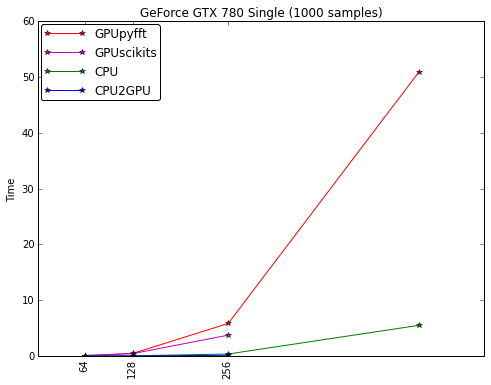
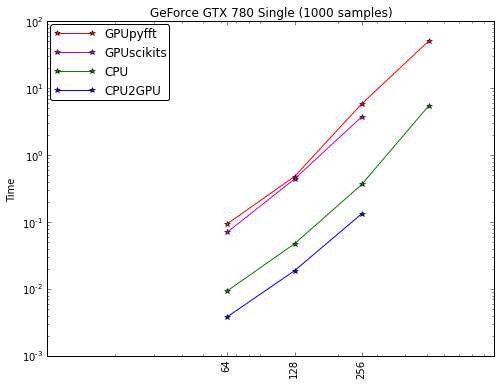
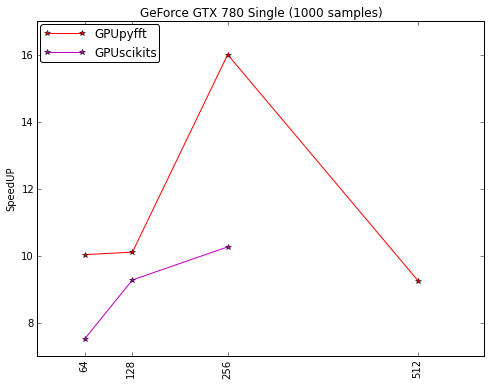

In [3]:
%%HTML
<img src="

<img src="

<img src="

In [ ]:
%%HTML



A_GPU.gpudata.free()

## scikit.cuda

# pyCula

### QUTIP

In [30]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy, pycuda, pycula,reikna, skcuda

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software,Version
Python,2.7.6 64bit [GCC 4.8.2]
IPython,4.0.1
OS,Linux 3.13.0 39 generic x86_64 with Ubuntu 14.04 trusty
numpy,1.10.4
scipy,0.14.0
matplotlib,1.4.3
sympy,0.7.5
pycuda,2015.1.3
pycula,0.95a1
reikna,0.6.4


In [25]:
#### Single
print timeGPU1 #pyfft
print timeGPU2 # scikits
print timeGPU3 # reikna

[0.09469574737548829, 0.4815624694824219, 5.82943701171875]
[0.07104179382324219, 0.4426275634765625, 3.61258544921875]
[0.19916575622558594, 0.7242471923828125, 11.666988281250001]
